# Introduction

The Project is to build a model to improve the Zestimate residual error. 

   $ logerror=log(Zestimate)−log(SalePrice) $ 

“Zestimates” are Zillow's estimated home values. The model is to predict the difference between the Zillow's estimated home value, Zestimate, and the actual sale price. 

## Data

We have 4 files. We merge properties_2016.csv and train_2016.csv to make a training data which has 90275 data points(houses). For a test data, we merge properties_2017.csv and test_2017.csv. The test data has 77613 data points.  

   **properties_2016.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, 
                           California) data in 2016.

   **train_2016.csv**: all the transactions before October 15, 2016, plus some of the transactions after October 
                      15,2016. It contains parcel ID ,  transaction date and calculated log error . 

   **properties_2017.csv**: a full list of real estate properties in three counties (Los Angeles, Orange and Ventura,
                           California) data in 2017.

   **test_2017.csv**: all the transactions from Jan 1, 2017 to Sep 25, 2017. It can be used as a test dataset.



In [270]:
#import a necessary module

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns

# read files

path_properties_2016 ='/Users/kimjisun/Documents/SpringBoard/capstone1_work/zillow/properties_2016.csv'
df_properties_2016 = pd.read_csv(path_properties_2016, low_memory=False)

path_train_2016 ='/Users/kimjisun/Documents/SpringBoard/capstone1_work/zillow/train_2016.csv'
df_train_2016 = pd.read_csv(path_train_2016 , parse_dates=["transactiondate"], low_memory=False)

path_properties_2017 ='/Users/kimjisun/Documents/SpringBoard/capstone1_work/zillow/properties_2017.csv'
df_properties_2017 = pd.read_csv(path_properties_2017, low_memory=False)

path_test_2017 ='/Users/kimjisun/Documents/SpringBoard/capstone1_work/zillow/train_2017.csv'
df_test_2017 = pd.read_csv(path_test_2017 , parse_dates=["transactiondate"],low_memory=False)

In [271]:
# merge training and properties data for 2016 and 2017

df_train_2016 = pd.merge(df_train_2016, df_properties_2016, how='inner', on='parcelid')
df_test_2017 = pd.merge(df_test_2017, df_properties_2017, how='inner', on='parcelid')

In [272]:
# Shape of train data

df_train_2016.shape

(90275, 60)

In [273]:
# Shape of test data

df_test_2017.shape

(77613, 60)

In [274]:
df_train_2016.head().transpose()

0                    1  \
parcelid                                 11016594             14366692   
logerror                                   0.0276              -0.1684   
transactiondate               2016-01-01 00:00:00  2016-01-01 00:00:00   
airconditioningtypeid                           1                  NaN   
architecturalstyletypeid                      NaN                  NaN   
basementsqft                                  NaN                  NaN   
bathroomcnt                                     2                  3.5   
bedroomcnt                                      3                    4   
buildingclasstypeid                           NaN                  NaN   
buildingqualitytypeid                           4                  NaN   
calculatedbathnbr                               2                  3.5   
decktypeid                                    NaN                  NaN   
finishedfloor1squarefeet                      NaN                  NaN   
calculatedfinishedsquarefeet                 1684                 2263   
finishedsquarefeet12                         1684                 2263   
finishedsquarefeet13                          NaN                  NaN   
finishedsquarefeet15                          NaN                  NaN   
finishedsquarefeet50                          NaN                  NaN   
finishedsquarefeet6                           NaN                  NaN   
fips                                         6037                 6059   
fireplacecnt                                  NaN                  NaN   
fullbathcnt                                     2                    3   
garagecarcnt                                  NaN                    2   
garagetotalsqft                               NaN                  468   
hashottuborspa                                NaN                  NaN   
heatingorsystemtypeid                           2                  NaN   
latitude                               3.4281e+07          3.36681e+07   
longitude                            -1.18489e+08         -1.17678e+08   
lotsizesquarefeet                            7528                 3643   
poolcnt                                       NaN                  NaN   
poolsizesum                                   NaN                  NaN   
pooltypeid10                                  NaN                  NaN   
pooltypeid2                                   NaN                  NaN   
pooltypeid7                                   NaN                  NaN   
propertycountylandusecode                    0100                    1   
propertylandusetypeid                         261                  261   
propertyzoningdesc                           LARS                  NaN   
rawcensustractandblock                6.03711e+07          6.05905e+07   
regionidcity                                12447                32380   
regionidcounty                               3101                 1286   
regionidneighborhood                        31817                  NaN   
regionidzip                                 96370                96962   
roomcnt                                         0                    0   
storytypeid                                   NaN                  NaN   
threequarterbathnbr                           NaN                    1   
typeconstructiontypeid                        NaN                  NaN   
unitcnt                                         1                  NaN   
yardbuildingsqft17                            NaN                  NaN   
yardbuildingsqft26                            NaN                  NaN   
yearbuilt                                    1959                 2014   
numberofstories                               NaN                  NaN   
fireplaceflag                                 NaN                  NaN   
structuretaxvaluedollarcnt                 122754               346458   
taxvaluedollarcnt                          360170   

In [275]:
df_train_2016.describe().transpose()

count          mean           std  \
parcelid                      90275.0  1.298466e+07  2.504510e+06   
logerror                      90275.0  1.145722e-02  1.610788e-01   
airconditioningtypeid         28781.0  1.816372e+00  2.974168e+00   
architecturalstyletypeid        261.0  7.229885e+00  2.716196e+00   
basementsqft                     43.0  7.135814e+02  4.374342e+02   
bathroomcnt                   90275.0  2.279474e+00  1.004271e+00   
bedroomcnt                    90275.0  3.031869e+00  1.156436e+00   
buildingclasstypeid              16.0  4.000000e+00  0.000000e+00   
buildingqualitytypeid         57364.0  5.565407e+00  1.900602e+00   
calculatedbathnbr             89093.0  2.309216e+00  9.761725e-01   
decktypeid                      658.0  6.600000e+01  0.000000e+00   
finishedfloor1squarefeet       6856.0  1.347974e+03  6.523990e+02   
calculatedfinishedsquarefeet  89614.0  1.773186e+03  9.281624e+02   
finishedsquarefeet12          85596.0  1.745455e+03  9.099412e+02   
finishedsquarefeet13             33.0  1.404545e+03  1.101082e+02   
finishedsquarefeet15           3564.0  2.380090e+03  1.068207e+03   
finishedsquarefeet50           6856.0  1.355547e+03  6.737035e+02   
finishedsquarefeet6             421.0  2.302546e+03  1.346255e+03   
fips                          90275.0  6.048871e+03  2.066346e+01   
fireplacecnt                   9607.0  1.187884e+00  4.841727e-01   
fullbathcnt                   89093.0  2.241231e+00  9.631416e-01   
garagecarcnt                  29937.0  1.812005e+00  6.087606e-01   
garagetotalsqft               29937.0  3.455212e+02  2.670159e+02   
heatingorsystemtypeid         56080.0  3.926979e+00  3.684382e+00   
latitude                      90275.0  3.400541e+07  2.649654e+05   
longitude                     90275.0 -1.181989e+08  3.606032e+05   
lotsizesquarefeet             80125.0  2.911016e+04  1.217213e+05   
poolcnt                       17901.0  1.000000e+00  0.000000e+00   
poolsizesum                     969.0  5.198277e+02  1.550542e+02   
pooltypeid10                   1161.0  1.000000e+00  0.000000e+00   
pooltypeid2                    1204.0  1.000000e+00  0.000000e+00   
pooltypeid7                   16697.0  1.000000e+00  0.000000e+00   
propertylandusetypeid         90275.0  2.618322e+02  5.182901e+00   
rawcensustractandblock        90275.0  6.049179e+07  2.050549e+05   
regionidcity                  88472.0  3.376133e+04  4.667239e+04   
regionidcounty                90275.0  2.525421e+03  8.056948e+02   
regionidneighborhood          36012.0  1.906465e+05  1.662289e+05   
regionidzip                   90240.0  9.658613e+04  3.661339e+03   
roomcnt                       90275.0  1.478516e+00  2.819627e+00   
storytypeid                      43.0  7.000000e+00  0.000000e+00   
threequarterbathnbr           12009.0  1.008743e+00  1.008301e-01   
typeconstructiontypeid          299.0  6.010033e+00  4.372347e-01   
unitcnt                       58353.0  1.110414e+00  7.972353e-01   
yardbuildingsqft17             2646.0  3.101421e+02  2.167219e+02   
yardbuildingsqft26               95.0  3.116947e+02  3.463549e+02   
yearbuilt                     89519.0  1.968533e+03  2.376347e+01   
numberofstories               20570.0  1.440739e+00  5.444981e-01   
structuretaxvaluedollarcnt    89895.0  1.800934e+05  2.091299e+05   
taxvaluedollarcnt             90274.0  4.576726e+05  5.548844e+05   
assessmentyear                90275.0  2.015000e+03  0.000000e+00   
landtaxvaluedollarcnt         90274.0  2.783353e+05  4.004955e+05   
taxamount                     90269.0  5.983976e+03  6.838877e+03   
taxdelinquencyyear             1783.0  1.340269e+01  2.715966e+00   
censustractandblock           89670.0  6.049151e+13  2.046605e+11   

                                       min           25%           50%  \
parcelid                      1.071174e+07  1.155950e+07  1.254734e+07   
logerror                     -4.605000e+00 -2.530000e-02  6.000000e-03   
airconditionin

In [276]:
df_train_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 60 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15

# Data Wrangling

## Data Cleaning

I explored training data. 125 duplicated parcelid for 2016 data and 199 duplicated parcelid for 2017 data were found. However, it meant they were trasacted for more than twice for a year. so it didn't have any problem.



In [277]:
df_train_2016.shape
sum(df_train_2016.duplicated('parcelid'))

125

In [278]:
df_test_2017.shape
sum(df_test_2017.duplicated('parcelid'))

199

In [279]:
# Check if negative values in each column. Two columns, logerror and longitude, have negative values which are reasonable. 

df_train_2016.describe().loc["min",:][ df_train_2016.describe().loc["min",:] < 0 ]

logerror    -4.605000e+00
longitude   -1.194479e+08
Name: min, dtype: float64

In [280]:
# Check if columns with object type have unusual cells. 

# there are 5 columns with a object type

df_train_2016.loc[:, df_train_2016.dtypes == np.object].columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [281]:
# check 5 columns to see if they have unnual cells. 

df_train_2016["hashottuborspa"].unique() , df_train_2016["propertycountylandusecode"].unique() , df_train_2016["propertyzoningdesc"].unique(), df_train_2016["fireplaceflag"].unique(), df_train_2016["taxdelinquencyflag"].unique()

(array([nan, True], dtype=object),
 array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
        '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
        '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
        '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
        '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
        '1720', '1011', '1432', '0401', '0102', '012D', '73', '105',
        '0110', '100V', '0130', '8800', '0303', '0210', '1012', '1333',
        '0114', '01DD', '020G', '040A', '012E', '020M', '040V', '070D',
        '1200', '030G', '1722', '6050', '1421', '010', nan, '200', '0',
        '1420', '0131', '0301'], dtype=object),
 array(['LARS', nan, 'PSR6', ..., 'SHCG', 'COR2YY', 'LNR2RPD-R3'],
       dtype=object),
 array([nan, True], dtype=object),
 array([nan, 'Y'], dtype=object))

## Missing Values

Let's check how many missing value each column has. 

I found that 47 columns have missing values.

18 columns among them have more than 95% of missing values and 29 columns with more than 60% of missing values


In [282]:
df_2016_missing = df_train_2016.isnull().sum(axis=0).reset_index()
df_2016_missing.columns = ["col_name",'non_missing_values']


df_2016_missing = df_2016_missing[df_2016_missing.non_missing_values != 0]
df_2016_missing['missing_values'] =len(df_train_2016) - df_2016_missing['non_missing_values']
df_2016_missing['ratio'] =df_2016_missing['non_missing_values']/len(df_train_2016)

missing_values = df_2016_missing.sort_values(by='ratio', ascending=False )
missing_values.reset_index(drop=True,inplace=True)

In [283]:
len(missing_values[missing_values['ratio']>0.95]) 

18

In [284]:
len(missing_values[missing_values['ratio']>0.60])

29

In [285]:
missing_values[missing_values['ratio']>0.60].col_name

0          buildingclasstypeid
1         finishedsquarefeet13
2                 basementsqft
3                  storytypeid
4           yardbuildingsqft26
5                fireplaceflag
6     architecturalstyletypeid
7       typeconstructiontypeid
8          finishedsquarefeet6
9                   decktypeid
10                 poolsizesum
11                pooltypeid10
12                 pooltypeid2
13          taxdelinquencyflag
14          taxdelinquencyyear
15              hashottuborspa
16          yardbuildingsqft17
17        finishedsquarefeet15
18    finishedfloor1squarefeet
19        finishedsquarefeet50
20                fireplacecnt
21         threequarterbathnbr
22                 pooltypeid7
23                     poolcnt
24             numberofstories
25       airconditioningtypeid
26             garagetotalsqft
27                garagecarcnt
28        regionidneighborhood
Name: col_name, dtype: object

Let's explore columns which have missing values ; 

- **buildingclasstypeid** : The building framing type , 99.98% missing
- **finishedsquarefeet13** : Perimeter  living area  , 99.96% missing
- **basementsqft** : Finished living area below or partially below ground level , 99.95% missing
- **storytypeid** : Type of floors in a multi-story house , 99.95% missing
- **yardbuildingsqft26** : Storage shed/building in yard , 99.89% missing
- **fireplaceflag** :	 Is a fireplace present in this home 
- **architecturalstyletypeid** :	 Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
- **typeconstructiontypeid** :	 What type of construction material was used to construct the home
- **finishedsquarefeet6** :	Base unfinished and finished area
- **decktypeid** :	Type of deck (if any) present on parcel
- **poolsizesum** :	 Total square footage of all pools on property
- **pooltypeid10** :	 Spa or Hot Tub
- **pooltypeid2** :	 Pool with Spa/Hot Tub
- **taxdelinquencyflag** :	Property taxes for this parcel are past due as of 2015
- **taxdelinquencyyear** :	Year for which the unpaid propert taxes were due 
- **hashottuborspa** :	 Does the home have a hot tub or spa
- **yardbuildingsqft17** :	Patio in  yard
- **finishedsquarefeet15** :	Total area
- **finishedfloor1squarefeet** :	 Size of the finished living area on the first (entry) floor of the home
- **finishedsquarefeet50** :	 Size of the finished living area on the first (entry) floor of the home
- **fireplacecnt** :	 Number of fireplaces in a home (if any)
- **threequarterbathnbr** :	 Number of 3/4 bathrooms in house (shower + sink + toilet)
- **pooltypeid7** :	 Pool without hot tub
- **poolcnt** :	 Number of pools on the lot (if any)
- **numberofstories** :	 Number of stories or levels the home has
- **airconditioningtypeid** :	 Type of cooling system present in the home (if any)
- **garagetotalsqft** :	 Total number of square feet of all garages on lot including an attached garage
- **garagecarcnt** :	 Total number of garages on the lot including an attached garage
- **regionidneighborhood** :	Neighborhood in which the property is located
- **heatingorsystemtypeid** :	 Type of home heating system
- **buildingqualitytypeid** :	 Overall assessment of condition of the building from best (lowest) to worst (highest)
- **propertyzoningdesc** :	 Description of the allowed land uses (zoning) for that property
- **unitcnt** :	 Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
- **lotsizesquarefeet** :	 Area of the lot in square feet
- **finishedsquarefeet12** :	Finished living area
- **regionidcity** :	 City in which the property is located (if any)
- **fullbathcnt** :	 Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
- **calculatedbathnbr** :	 Number of bathrooms in home including fractional bathroom
- **yearbuilt** :	 The Year the principal residence was built 
- **calculatedfinishedsquarefeet** :	 Calculated total finished living area of the home 
- **censustractandblock** :	 Census tract and block ID combined - also contains blockgroup assignment by extension
- **structuretaxvaluedollarcnt** :	The assessed value of the built structure on the parcel
- **regionidzip** :	 Zip code in which the property is located
- **taxamount** :	The total property tax assessed for that assessment year
- **taxvaluedollarcnt** :	The total tax assessed value of the parcel
- **landtaxvaluedollarcnt** :	The assessed value of the land area of the parcel
- **propertycountylandusecode** :	 County land use code i.e. it's zoning at the county level

In [286]:
df_train_2016[['buildingclasstypeid', 'finishedsquarefeet13','basementsqft','storytypeid','yardbuildingsqft26','fireplaceflag','architecturalstyletypeid','typeconstructiontypeid','finishedsquarefeet6','decktypeid','poolsizesum','pooltypeid10','pooltypeid2','taxdelinquencyflag','taxdelinquencyyear','hashottuborspa','yardbuildingsqft17','finishedsquarefeet15','finishedfloor1squarefeet','finishedsquarefeet50','fireplacecnt','threequarterbathnbr','pooltypeid7','poolcnt','numberofstories','airconditioningtypeid','garagetotalsqft','garagecarcnt','regionidneighborhood','heatingorsystemtypeid','buildingqualitytypeid','propertyzoningdesc','unitcnt','lotsizesquarefeet','finishedsquarefeet12','regionidcity','fullbathcnt','calculatedbathnbr','yearbuilt','calculatedfinishedsquarefeet','censustractandblock','structuretaxvaluedollarcnt','regionidzip','taxamount','taxvaluedollarcnt','landtaxvaluedollarcnt','propertycountylandusecode']].describe().transpose()

count          mean           std  \
buildingclasstypeid              16.0  4.000000e+00  0.000000e+00   
finishedsquarefeet13             33.0  1.404545e+03  1.101082e+02   
basementsqft                     43.0  7.135814e+02  4.374342e+02   
storytypeid                      43.0  7.000000e+00  0.000000e+00   
yardbuildingsqft26               95.0  3.116947e+02  3.463549e+02   
architecturalstyletypeid        261.0  7.229885e+00  2.716196e+00   
typeconstructiontypeid          299.0  6.010033e+00  4.372347e-01   
finishedsquarefeet6             421.0  2.302546e+03  1.346255e+03   
decktypeid                      658.0  6.600000e+01  0.000000e+00   
poolsizesum                     969.0  5.198277e+02  1.550542e+02   
pooltypeid10                   1161.0  1.000000e+00  0.000000e+00   
pooltypeid2                    1204.0  1.000000e+00  0.000000e+00   
taxdelinquencyyear             1783.0  1.340269e+01  2.715966e+00   
yardbuildingsqft17             2646.0  3.101421e+02  2.167219e+02   
finishedsquarefeet15           3564.0  2.380090e+03  1.068207e+03   
finishedfloor1squarefeet       6856.0  1.347974e+03  6.523990e+02   
finishedsquarefeet50           6856.0  1.355547e+03  6.737035e+02   
fireplacecnt                   9607.0  1.187884e+00  4.841727e-01   
threequarterbathnbr           12009.0  1.008743e+00  1.008301e-01   
pooltypeid7                   16697.0  1.000000e+00  0.000000e+00   
poolcnt                       17901.0  1.000000e+00  0.000000e+00   
numberofstories               20570.0  1.440739e+00  5.444981e-01   
airconditioningtypeid         28781.0  1.816372e+00  2.974168e+00   
garagetotalsqft               29937.0  3.455212e+02  2.670159e+02   
garagecarcnt                  29937.0  1.812005e+00  6.087606e-01   
regionidneighborhood          36012.0  1.906465e+05  1.662289e+05   
heatingorsystemtypeid         56080.0  3.926979e+00  3.684382e+00   
buildingqualitytypeid         57364.0  5.565407e+00  1.900602e+00   
unitcnt                       58353.0  1.110414e+00  7.972353e-01   
lotsizesquarefeet             80125.0  2.911016e+04  1.217213e+05   
finishedsquarefeet12          85596.0  1.745455e+03  9.099412e+02   
regionidcity                  88472.0  3.376133e+04  4.667239e+04   
fullbathcnt                   89093.0  2.241231e+00  9.631416e-01   
calculatedbathnbr             89093.0  2.309216e+00  9.761725e-01   
yearbuilt                     89519.0  1.968533e+03  2.376347e+01   
calculatedfinishedsquarefeet  89614.0  1.773186e+03  9.281624e+02   
censustractandblock           89670.0  6.049151e+13  2.046605e+11   
structuretaxvaluedollarcnt    89895.0  1.800934e+05  2.091299e+05   
regionidzip                   90240.0  9.658613e+04  3.661339e+03   
taxamount                     90269.0  5.983976e+03  6.838877e+03   
taxvaluedollarcnt             90274.0  4.576726e+05  5.548844e+05   
landtaxvaluedollarcnt         90274.0  2.783353e+05  4.004955e+05   

                                       min           25%           50%  \
buildingclasstypeid           4.000000e+00  4.000000e+00  4.000000e+00   
finishedsquarefeet13          1.056000e+03  1.392000e+03  1.440000e+03   
basementsqft                  1.000000e+02  4.075000e+02  6.160000e+02   
storytypeid                   7.000000e+00  7.000000e+00  7.000000e+00   
yardbuildingsqft26            1.800000e+01  1.000000e+02  1.590000e+02   
architecturalstyletypeid      2.000000e+00  7.000000e+00  7.000000e+00   
typeconstructiontypeid        4.000000e+00  6.000000e+00  6.000000e+00   
finishedsquarefeet6           2.570000e+02  1.112000e+03  2.028000e+03   
decktypeid                    6.600000e+01  6.600000e+01  6.600000e+01   
poolsizesum                   2.800000e+01  4.200000e+02  5.000000e+02   
pooltypeid10                  1.000000e+00  1.000000e+00  1.000000e+00   
pooltypeid2                   1.000000e+00  1.000000e+00  1.000000e+00   
taxdelinquencyyear            6.000000e+00  1.300000e+01  1.400000e+01   
yardbuildingsqft17          

In [287]:
def visualize_feature(df, feature, val_type = "categ", bins = 1 ):
    
    # val_type = 'categ' for categorical values and 'cts' for continuous values
    if val_type == "categ":
        #Group mean and count of logerror for categorical values
        group = df.groupby(feature).logerror.agg(['mean', 'count','max','min'])
        
    else:
        #Group mean and count of logerror for continuous values
        group = df.groupby(pd.cut(df[feature], bins)).logerror.agg(['mean', 'count','max','min'])
            
        
    # mean and count of logerror for missingn value
    missing = df[df[feature].isnull()].logerror.agg(['mean', 'count']) 
    
    missing_mean = pd.DataFrame(missing.iloc[0], columns=['mean'],index = ['missing'])
    missing_count = pd.DataFrame(missing.iloc[1], columns=['count'],index = ['missing'])
    
    
    # Create dataframe for groupe mean of logerror
    frames_mean = [missing_mean ,pd.DataFrame(group.loc[:, 'mean'])]
    frames_count = [missing_count ,pd.DataFrame(group.loc[:, 'count'])]

    #test = [missing_count,mi, pd.DataFrame(group.loc[:, ['mean','count']])]
    #pd.merge(frames_mean, frames_count, on =[''])
    #test = [pd.DataFrame(missing), pd.DataFrame(group)]
    #print(pd.concat(test))
    #print(missing)
    #print(group)

    print(pd.concat(frames_mean))
    print(pd.concat(frames_count))
    print(pd.DataFrame(group))
    #print(pd.concat(pd.DataFrame(frames_count)))
    #print( pd.concat([frames_mean, frames_count], axis=1) )
    
    
    
    # Draw plot
    pd.concat(frames_mean).plot(kind='bar') 
    plt.show() 
    
    pd.concat(frames_count).plot(kind='bar') 
    plt.show() 
    



**1) buildingclasstypeid**

the building framing type such as steel frame, wood frame or concrete/brick.  
number of non-missing value : 16 out of 90275  
ratio of missing value :0.999823

Only 16 cells out of 90275 cells have the same value that is '4' and rest of them have all missing values. The '4' means that buildings have wood or wood and steel frames. It is not reasonable to replace missing values with other statics such as mean or median etc since most of them are missing. So I will delete the column. 

In [288]:
df_train_2016['buildingclasstypeid'].unique() 

array([nan,  4.])

In [289]:

dict_column= {"Drop":[],"Fill_0":[],"Fill_mean":[]}

dict_column["Drop"].append('buildingclasstypeid')


**2) finishedsquarefeet13**

perimeter living area has 33 cells 
Number of non-missing value : 33 out of 90275  
Ratio of missing value : 0.999634

Every building has different sizes of living area so it is hard to decide what value to fill out for missing values. So I will delete the column as well. 

In [290]:
df_train_2016["finishedsquarefeet13"].unique() 

array([  nan, 1392., 1440., 1536., 1344., 1566., 1464., 1152., 1584.,
       1248., 1416., 1056.])

In [291]:
dict_column["Drop"].append('finishedsquarefeet13')


**3) basementsqft**

Finished living area below or partially below ground level.
number of non-missing value :  43 out of 90275  
ratio of missing value : 0.999524

There fore missing value might mean that it has not finished living room below ground leve. So I will filled missing value with 0.  


In [292]:
df_train_2016["basementsqft"].unique() 

array([  nan,  814.,  330.,  168.,  671., 1555., 1528.,  771.,  700.,
        831., 1048., 1312.,  690.,  564.,  198.,  676.,  184.,  540.,
        260.,  557.,  312.,  913., 1350.,  802.,  162.,  616., 1551.,
        485.,  238.,  493.,  760.,  515.,  196.,  585.,  234.,  510.,
        579.,  100.,  608., 1210.])

                      mean
missing           0.011433
(98.545, 245.5]  -0.024350
(245.5, 391.0]    0.116933
(391.0, 536.5]    0.011725
(536.5, 682.0]    0.061089
(682.0, 827.5]    0.116757
(827.5, 973.0]    0.009700
(973.0, 1118.5]  -0.079000
(1118.5, 1264.0]  0.100700
(1264.0, 1409.5]  0.006633
(1409.5, 1555.0]  0.214400
                    count
missing           90232.0
(98.545, 245.5]       8.0
(245.5, 391.0]        3.0
(391.0, 536.5]        4.0
(536.5, 682.0]        9.0
(682.0, 827.5]        7.0
(827.5, 973.0]        2.0
(973.0, 1118.5]       1.0
(1118.5, 1264.0]      1.0
(1264.0, 1409.5]      3.0
(1409.5, 1555.0]      5.0
                      mean  count     max     min
basementsqft                                     
(98.545, 245.5]  -0.024350      8  0.0723 -0.2549
(245.5, 391.0]    0.116933      3  0.2311  0.0354
(391.0, 536.5]    0.011725      4  0.0383 -0.0182
(536.5, 682.0]    0.061089      9  0.2367  0.0000
(682.0, 827.5]    0.116757      7  0.6941 -0.0576
(827.5, 973.0]

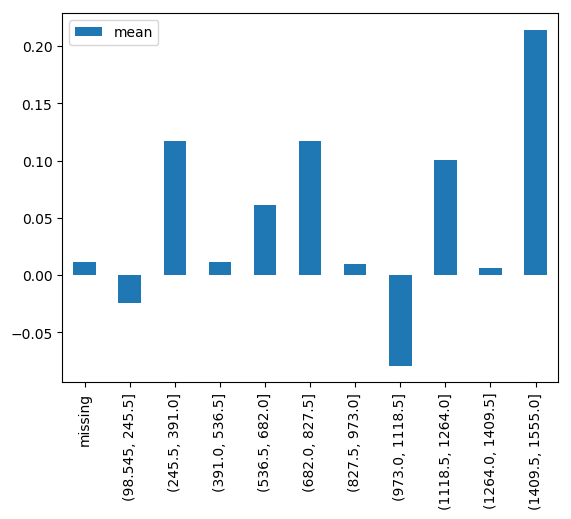

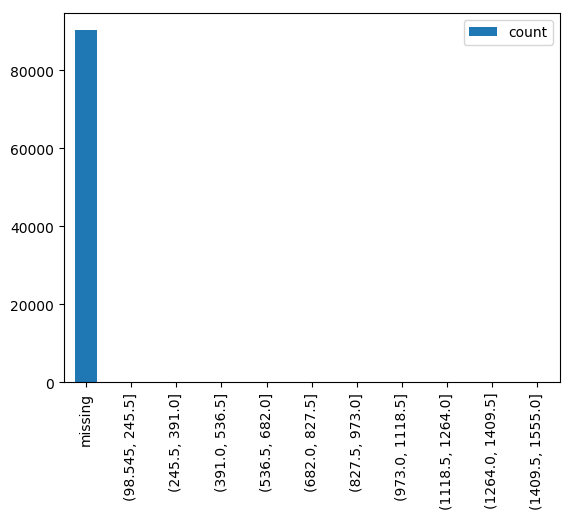

In [293]:
visualize_feature(df_train_2016,'basementsqft','cts',10)

In [294]:
dict_column['Fill_0'].append('basementsqft')

**4) storytypeid**

Type of floors in a multi-story house. 
number of non-missing value : 43 out of 90275  
ratio of missing value :0.999524


It has 43 cells which are not missing and all have the same value of 7. Values range from 1 to 35. Every building has floor , so it should always have the value. Therefore, there is not any meaning for missing values. so I would delete the column

In [295]:
df_train_2016["storytypeid"].unique() 

array([nan,  7.])

             mean
missing  0.011433
7.0      0.062860
           count
missing  90232.0
7.0         43.0
                mean  count     max     min
storytypeid                                
7.0          0.06286     43  0.7669 -0.2549


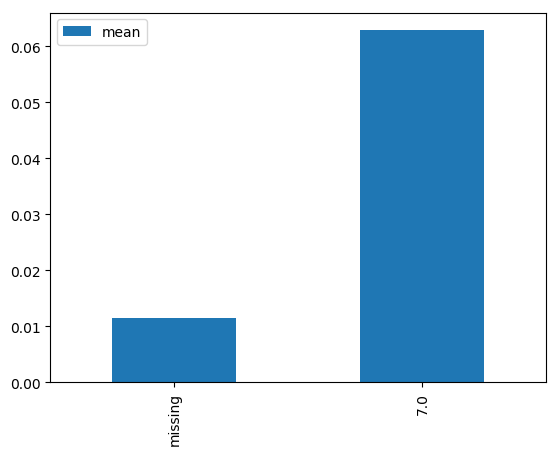

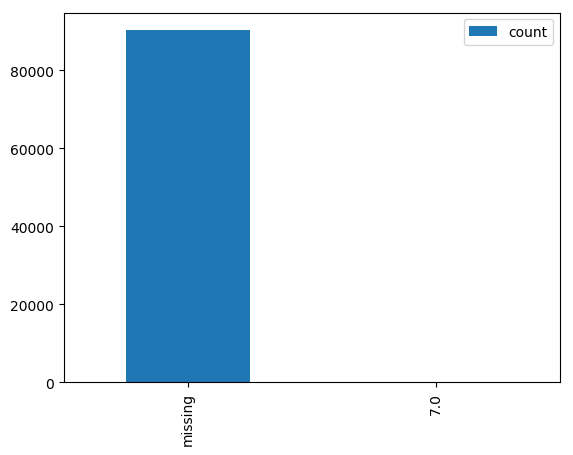

In [296]:
visualize_feature(df_train_2016,'storytypeid')

In [297]:
dict_column['Drop'].append('storytypeid')

**5) yardbuildingsqft26**

Storage shed/building in yard.  
number of non-missing value : 95 out of 90275  
ratio of missing value :0.998948

Missing value might mean that it has no storage in yard. So I will fill missing values with 0. 


In [298]:
df_train_2016["yardbuildingsqft26"].unique() 

array([  nan, 1200.,  126.,  322.,  120.,  235.,  125., 1197.,  204.,
        156.,   62.,   18.,   55.,  168.,   56.,   54.,  100.,   36.,
        110.,  144.,  264.,  180.,  119.,  252.,  477.,  150.,  268.,
        230.,  231.,  308.,   60.,   34.,  136.,  864.,  846.,   88.,
        159., 1366.,   37.,   78.,  642.,  627.,  960., 1000., 1182.,
        400.,  276.,  290.,  943.,  192.,  480.,  288.,  108.,   49.,
        525.,  408.,  133.,   96.,   72.,  504.,  310.,  160.,   41.,
        104.,   33.,   90.,   48., 1050.,  200., 1100.,  240., 1248.,
        648.,  550.])

In [299]:
dict_column['Fill_0'].append("yardbuildingsqft26")

**6) fireplaceflag**

Is a fireplace present in this home   

number of non-missing value : 222 out of 90275 
ratio of missing value :0.997541

Not all home doesn't have a fireplace present. so fill missing value with False. 

There are only .25% of home with a fireplace.

             mean
missing  0.011448
True     0.015267
           count
missing  90053.0
True       222.0
                   mean  count    max    min
fireplaceflag                               
True           0.015267    222  1.477 -0.417


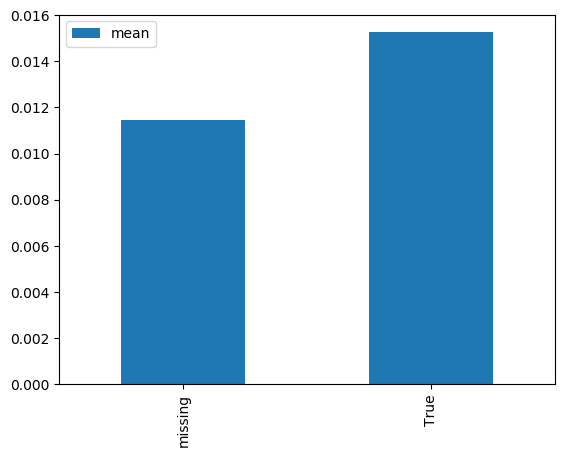

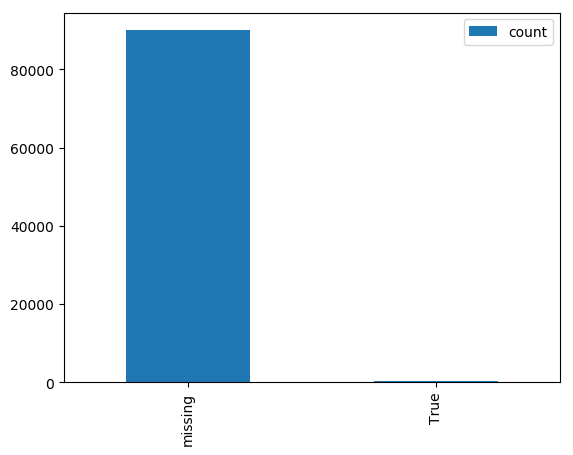

In [300]:
visualize_feature(df_train_2016,'fireplaceflag')

In [301]:
df_train_2016["fireplaceflag"].fillna('False',inplace = True)

**7) architecturalstyletypeid**      

Architectural style of the home (i.e. ranch, colonial, split-level, etc…)  

Number of non-missing value : 261 out of 90275 
Ratio of missing value :0.997109

Every home should have the value for architectural style. It is missing for random and it is 99.7% missing. So delete the column

In [302]:
df_train_2016["architecturalstyletypeid"].unique() 

array([nan,  7.,  8.,  2., 10.,  3., 21.])

             mean
missing  0.011442
2.0      0.012255
3.0      0.046225
7.0      0.016414
8.0      0.015919
10.0     0.063900
21.0     0.014475
           count
missing  90014.0
2.0         11.0
3.0          4.0
7.0        221.0
8.0         16.0
10.0         1.0
21.0         8.0
                              mean  count     max     min
architecturalstyletypeid                                 
2.0                       0.012255     11  0.2086 -0.0747
3.0                       0.046225      4  0.1354 -0.0131
7.0                       0.016414    221  1.4770 -0.4170
8.0                       0.015919     16  0.2829 -0.2182
10.0                      0.063900      1  0.0639  0.0639
21.0                      0.014475      8  0.1115 -0.0834


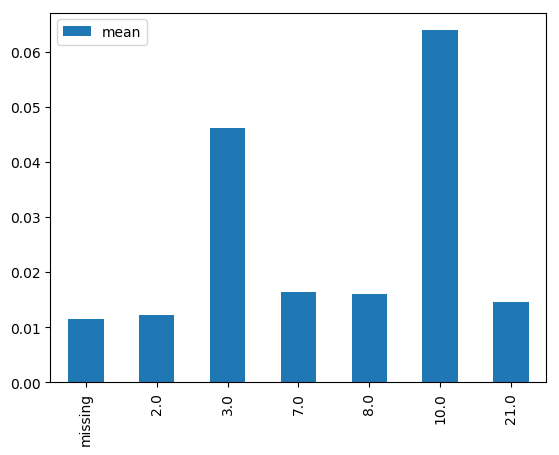

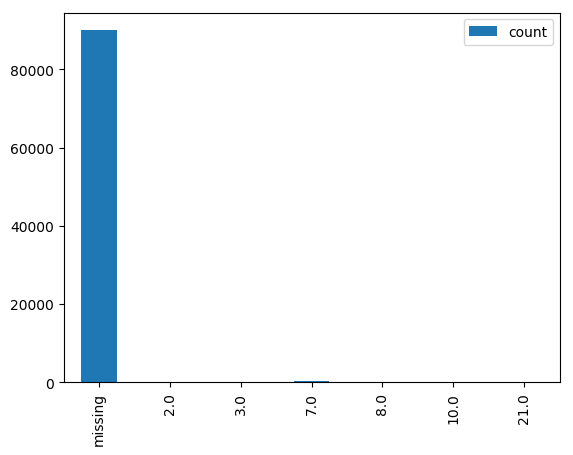

In [303]:
visualize_feature(df_train_2016,'architecturalstyletypeid')

In [304]:
dict_column['Drop'].append("architecturalstyletypeid")

**8) typeconstructiontypeid**      

What type of construction material was used to construct the home  

number of non-missing value : 299 out of 90275
ratio of missing value :0.996688

Every house should have type of construction material. It is missing for random and it is 99.7% missing. so delete the column.

In [305]:
df_train_2016["typeconstructiontypeid"].unique() 

array([nan,  6., 13.,  4.])

             mean
missing  0.011440
4.0      0.043900
6.0      0.016518
13.0    -0.015100
           count
missing  89976.0
4.0          2.0
6.0        296.0
13.0         1.0
                            mean  count     max     min
typeconstructiontypeid                                 
4.0                     0.043900      2  0.0573  0.0305
6.0                     0.016518    296  1.4770 -0.4170
13.0                   -0.015100      1 -0.0151 -0.0151


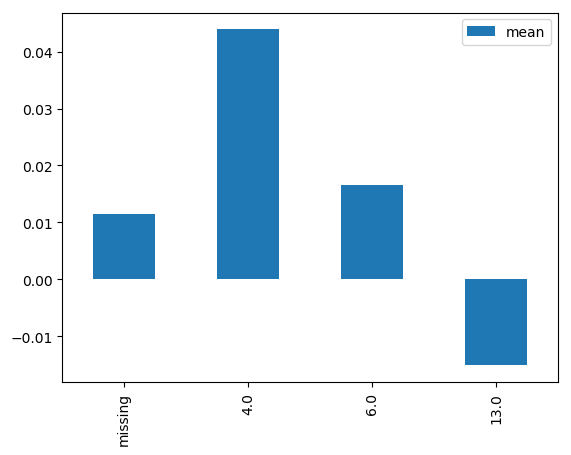

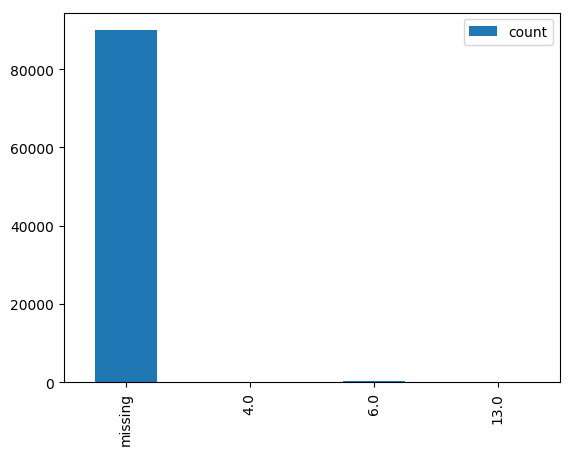

In [306]:
visualize_feature(df_train_2016,'typeconstructiontypeid')

In [307]:
dict_column['Drop'].append("typeconstructiontypeid")

**9) finishedsquarefeet6**     

Base unfinished and finished area  

Number of non-missing value : 421 out of 90275 
Ratio of missing value :0.995336

Every house should have type of construction material. It is missing for random and it is 99.5% missing. so delete the column.

In [308]:
df_train_2016["finishedsquarefeet6"].describe() 

count     421.000000
mean     2302.546318
std      1346.255242
min       257.000000
25%      1112.000000
50%      2028.000000
75%      3431.000000
max      7224.000000
Name: finishedsquarefeet6, dtype: float64

                      mean
missing           0.011608
(250.033, 953.7] -0.031430
(953.7, 1650.4]  -0.026863
(1650.4, 2347.1] -0.014005
(2347.1, 3043.8] -0.038061
(3043.8, 3740.5]  0.016096
(3740.5, 4437.2] -0.054747
(4437.2, 5133.9] -0.003565
(5133.9, 5830.6] -0.083640
(5830.6, 6527.3]  0.433467
(6527.3, 7224.0] -0.084500
                    count
missing           89854.0
(250.033, 953.7]     77.0
(953.7, 1650.4]      89.0
(1650.4, 2347.1]     81.0
(2347.1, 3043.8]     46.0
(3043.8, 3740.5]     52.0
(3740.5, 4437.2]     47.0
(4437.2, 5133.9]     20.0
(5133.9, 5830.6]      5.0
(5830.6, 6527.3]      3.0
(6527.3, 7224.0]      1.0
                         mean  count     max     min
finishedsquarefeet6                                 
(250.033, 953.7]    -0.031430     77  0.6355 -0.7154
(953.7, 1650.4]     -0.026863     89  1.4380 -0.7032
(1650.4, 2347.1]    -0.014005     81  0.4886 -1.0790
(2347.1, 3043.8]    -0.038061     46  1.5070 -0.6675
(3043.8, 3740.5]     0.016096     52  0.8838 -

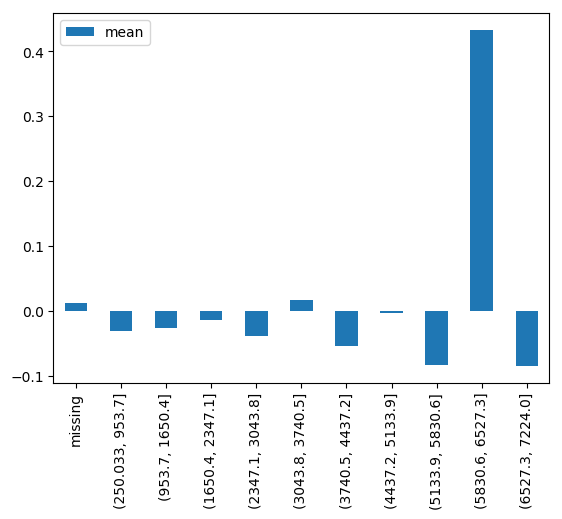

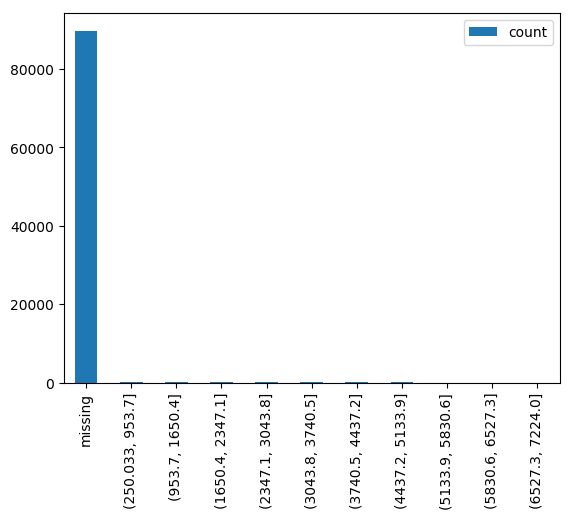

In [309]:
visualize_feature(df_train_2016, "finishedsquarefeet6", "cts", 10 )

In [310]:
dict_column['Drop'].append("finishedsquarefeet6")

**10) 'decktypeid'**     

Type of deck (if any) present on parcel  

Number of non-missing value : 658 out of 90275 
Ratio of missing value :0.992711

Not all home has deck present. However, the cells which do not have missing values have the unique value, 66. Every houses should have the their own unique type of deck. so delete the column as it is missing ramdomly.  

In [311]:
df_train_2016["decktypeid"].unique() 

array([nan, 66.])

             mean
missing  0.011469
66.0     0.009902
           count
missing  89617.0
66.0       658.0
                mean  count    max    min
decktypeid                               
66.0        0.009902    658  1.734 -2.303


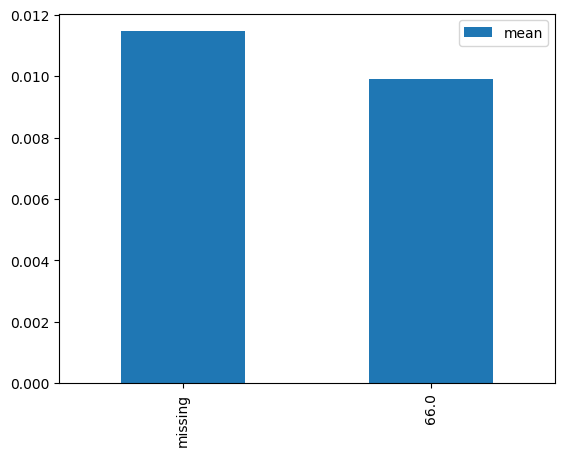

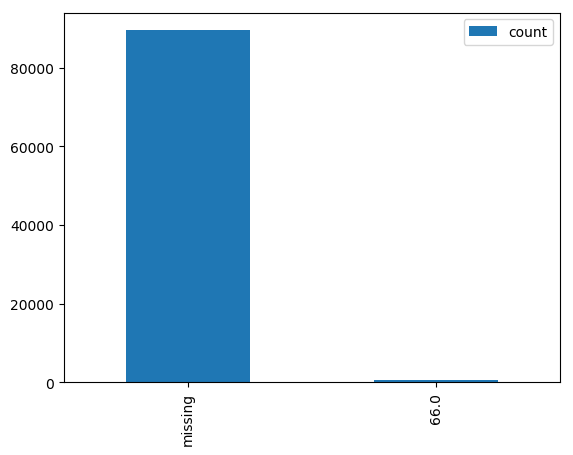

In [312]:
visualize_feature(df_train_2016, "decktypeid")

In [313]:
dict_column['Drop'].append("decktypeid")

**11) 'poolsizesum'**      

Total square footage of all pools on property  

Number of non-missing value : 969 out of 90275 
Ratio of missing value :0.989266

Not all home has pool. So missing value can possibly be home without a pool. The next column "pooltypeid10" which means spa or hot tub has non-missing value of 1161. However column "poolsizesum" which means the size of pool has non-missing value 969. The number of pools which are spa or hot tub,1161, should be less than the number of the size of pool, which is 969 in this case. Therefore, it is missing randomly. Delete the column as it is missing 99%. 

In [314]:
df_train_2016.poolsizesum.describe()

count     969.000000
mean      519.827657
std       155.054210
min        28.000000
25%       420.000000
50%       500.000000
75%       600.000000
max      1750.000000
Name: poolsizesum, dtype: float64

                      mean
missing           0.011490
(26.278, 200.2]   0.010675
(200.2, 372.4]    0.004673
(372.4, 544.6]    0.007620
(544.6, 716.8]    0.011735
(716.8, 889.0]    0.012569
(889.0, 1061.2]   0.005018
(1061.2, 1233.4] -0.139100
(1233.4, 1405.6]       NaN
(1405.6, 1577.8]       NaN
(1577.8, 1750.0] -0.013300
                    count
missing           89306.0
(26.278, 200.2]       8.0
(200.2, 372.4]       96.0
(372.4, 544.6]      532.0
(544.6, 716.8]      228.0
(716.8, 889.0]       90.0
(889.0, 1061.2]      11.0
(1061.2, 1233.4]      2.0
(1233.4, 1405.6]      0.0
(1405.6, 1577.8]      0.0
(1577.8, 1750.0]      2.0
                      mean  count     max     min
poolsizesum                                      
(26.278, 200.2]   0.010675      8  0.1596 -0.1744
(200.2, 372.4]    0.004673     96  0.2784 -0.2510
(372.4, 544.6]    0.007620    532  0.5388 -0.2357
(544.6, 716.8]    0.011735    228  1.1510 -0.5798
(716.8, 889.0]    0.012569     90  0.2484 -0.3813
(889.0, 1061.2

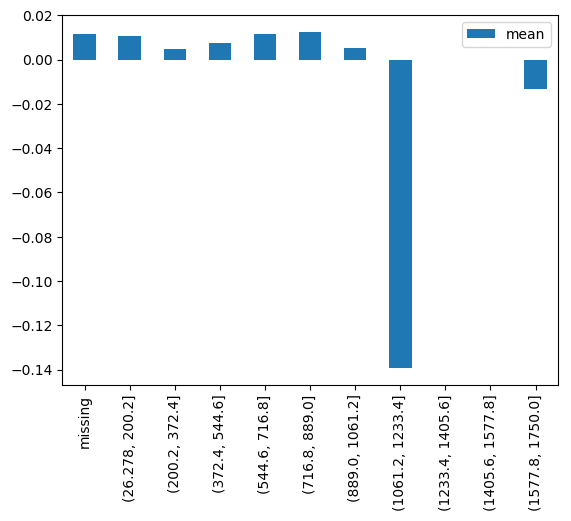

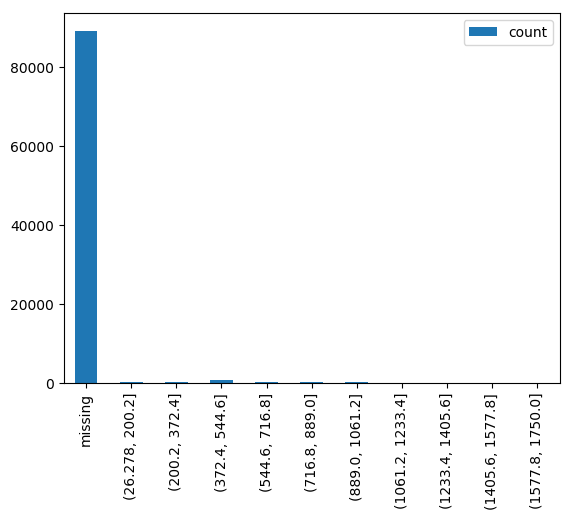

In [315]:
visualize_feature(df_train_2016, "poolsizesum","cts",10)

In [316]:
dict_column['Drop'].append("poolsizesum")

**12) 'pooltypeid10'**      

Spa or Hot Tub  

number of non-missing value : 1161 out of 90275
ratio of missing value :0.987139

Not every home can have pool. Missing values here possibly means home without a pool. However, values are biary, 0 or 1, spa or hot-tub. We can not figure out 0 means home without a pool or missing value. so delete the column



In [317]:
df_train_2016["pooltypeid10"].describe() 

count    1161.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid10, dtype: float64

In [318]:
dict_column['Drop'].append("pooltypeid10")

**13) 'pooltypeid2'**      

Pool with Spa/Hot Tub  

Number of non-missing value : 1204 out of 90275  
Ratio of missing value :0.986663

Delete the column for the same reason as the previous column,pooltypeid10. 

In [319]:
df_train_2016["pooltypeid2"].describe() 

count    1204.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: pooltypeid2, dtype: float64

In [320]:
dict_column['Drop'].append("pooltypeid2")

**14) 'taxdelinquencyflag'**     

Property taxes for this parcel are past due as of 2015  

number of non-missing value : 1783 out of 90275  
ratio of missing value :0.980249

Values which are not all "Y", therefore missing values are possibly "No" which means property taxes are not past due. So I filled missing value with "N". 

Property taxes are not past due for the majority of houses. 
        

In [321]:
df_train_2016["taxdelinquencyflag"].describe() 

count     1783
unique       1
top          Y
freq      1783
Name: taxdelinquencyflag, dtype: object

             mean
missing  0.011024
Y        0.032945
           count
missing  88492.0
Y         1783.0
                        mean  count    max    min
taxdelinquencyflag                               
Y                   0.032945   1783  1.403 -1.605


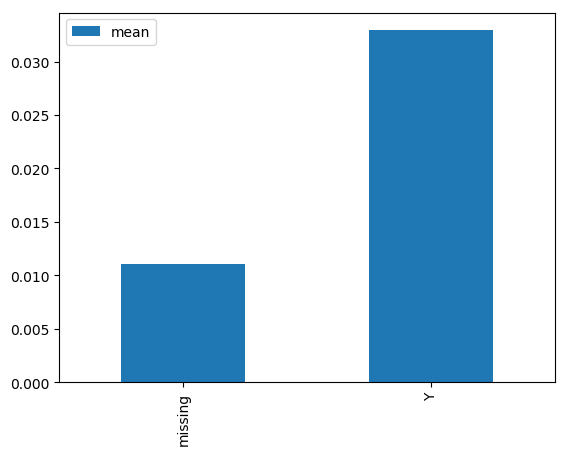

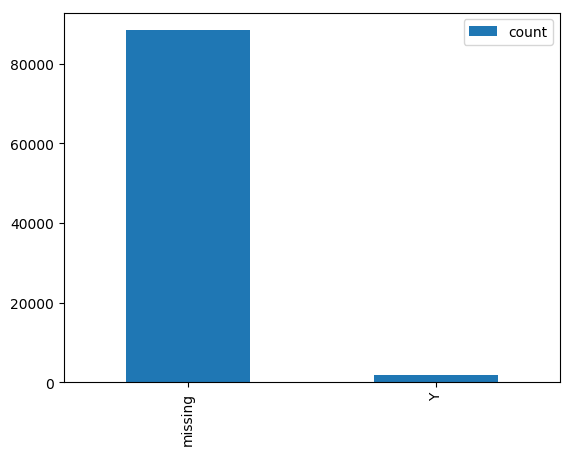

In [322]:
visualize_feature(df_train_2016, "taxdelinquencyflag" )

In [323]:
df_train_2016["taxdelinquencyflag"].fillna('N', inplace =True)

**15) 'taxdelinquencyyear'**     

Year for which the unpaid propert taxes were due   

number of non-missing value : 1783 out of 90275  
ratio of missing value :0.980249

The column'taxdelinquencyyear' is related to the previous column 'taxdelinquencyflag' which represents whether Property taxes for this parcel are past due or not and the missing values are 1783 for for both columns. Therefore it is not missing radomly.  Therefore fill missing values with 0

There is one outlier which is 99 and other values are all less than 16. The cell with 99 might mean the home have not paid property tax for a long time. It has high logerror , 0.453000.

Let's visualize the date which is less than 15.


In [324]:
df_train_2016["taxdelinquencyyear"].describe() 

count    1783.000000
mean       13.402692
std         2.715966
min         6.000000
25%        13.000000
50%        14.000000
75%        15.000000
max        99.000000
Name: taxdelinquencyyear, dtype: float64

                   mean
missing        0.011024
(5.907, 15.3]  0.032709
(15.3, 24.6]        NaN
(24.6, 33.9]        NaN
(33.9, 43.2]        NaN
(43.2, 52.5]        NaN
(52.5, 61.8]        NaN
(61.8, 71.1]        NaN
(71.1, 80.4]        NaN
(80.4, 89.7]        NaN
(89.7, 99.0]   0.453000
                 count
missing        88492.0
(5.907, 15.3]   1782.0
(15.3, 24.6]       0.0
(24.6, 33.9]       0.0
(33.9, 43.2]       0.0
(43.2, 52.5]       0.0
(52.5, 61.8]       0.0
(61.8, 71.1]       0.0
(71.1, 80.4]       0.0
(80.4, 89.7]       0.0
(89.7, 99.0]       1.0
                        mean  count    max    min
taxdelinquencyyear                               
(5.907, 15.3]       0.032709   1782  1.403 -1.605
(15.3, 24.6]             NaN      0    NaN    NaN
(24.6, 33.9]             NaN      0    NaN    NaN
(33.9, 43.2]             NaN      0    NaN    NaN
(43.2, 52.5]             NaN      0    NaN    NaN
(52.5, 61.8]             NaN      0    NaN    NaN
(61.8, 71.1]             NaN      0 

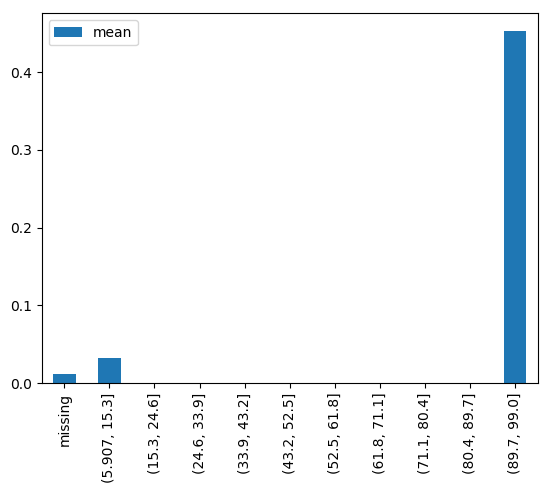

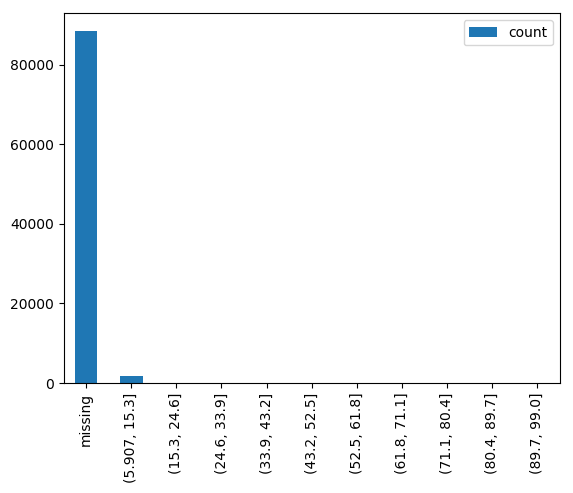

In [325]:
visualize_feature(df_train_2016, "taxdelinquencyyear", "cts", 10 )

In [326]:
df_train_2016[df_train_2016["taxdelinquencyyear"]==99].transpose()

67993
parcelid                                 12647809
logerror                                    0.453
transactiondate               2016-08-19 00:00:00
airconditioningtypeid                         NaN
architecturalstyletypeid                      NaN
basementsqft                                  NaN
bathroomcnt                                     1
bedroomcnt                                      2
buildingclasstypeid                           NaN
buildingqualitytypeid                           7
calculatedbathnbr                               1
decktypeid                                    NaN
finishedfloor1squarefeet                      NaN
calculatedfinishedsquarefeet                  810
finishedsquarefeet12                          810
finishedsquarefeet13                          NaN
finishedsquarefeet15                          NaN
finishedsquarefeet50                          NaN
finishedsquarefeet6                           NaN
fips                                         6037
fireplacecnt                                  NaN
fullbathcnt                                     1
garagecarcnt                                  NaN
garagetotalsqft                               NaN
hashottuborspa                                NaN
heatingorsystemtypeid                           7
latitude                              3.40612e+07
longitude                            -1.18258e+08
lotsizesquarefeet                            6358
poolcnt                                       NaN
poolsizesum                                   NaN
pooltypeid10                                  NaN
pooltypeid2                                   NaN
pooltypeid7                                   NaN
propertycountylandusecode                    0100
propertylandusetypeid                         261
propertyzoningdesc                           LAR1
rawcensustractandblock                6.03721e+07
regionidcity                                12447
regionidcounty                               3101
regionidneighborhood                        54300
regionidzip                                 96222
roomcnt                                         0
storytypeid                                   NaN
threequarterbathnbr                           NaN
typeconstructiontypeid                        NaN
unitcnt                                         1
yardbuildingsqft17                            NaN
yardbuildingsqft26                            NaN
yearbuilt                                    1947
numberofstories                               NaN
fireplaceflag                               False
structuretaxvaluedollarcnt                 158953
taxvaluedollarcnt                          407754
assessmentyear                               2015
landtaxvaluedollarcnt                      248801
taxamount                                 4968.05
taxdelinquencyflag                              Y
taxdelinquencyyear                             99
censustractandblock                    6.0373e+13

                  mean
missing            NaN
(5.991, 6.9]  0.011167
(6.9, 7.8]    0.015187
(7.8, 8.7]    0.117717
(8.7, 9.6]    0.083190
(9.6, 10.5]   0.048737
(10.5, 11.4]  0.051198
(11.4, 12.3]  0.051968
(12.3, 13.2]  0.028111
(13.2, 14.1]  0.026696
(14.1, 15.0]  0.020667
              count
missing         0.0
(5.991, 6.9]    3.0
(6.9, 7.8]      8.0
(7.8, 8.7]     24.0
(8.7, 9.6]     63.0
(9.6, 10.5]    89.0
(10.5, 11.4]   85.0
(11.4, 12.3]  154.0
(12.3, 13.2]  210.0
(13.2, 14.1]  628.0
(14.1, 15.0]  518.0
                        mean  count     max     min
taxdelinquencyyear                                 
(5.991, 6.9]        0.011167      3  0.2311 -0.3313
(6.9, 7.8]          0.015187      8  0.2311 -0.0587
(7.8, 8.7]          0.117717     24  0.5883 -0.0866
(8.7, 9.6]          0.083190     63  1.1340 -0.3567
(9.6, 10.5]         0.048737     89  1.4030 -1.6050
(10.5, 11.4]        0.051198     85  0.9685 -0.3930
(11.4, 12.3]        0.051968    154  1.1690 -0.4829
(12.3, 13.2]    

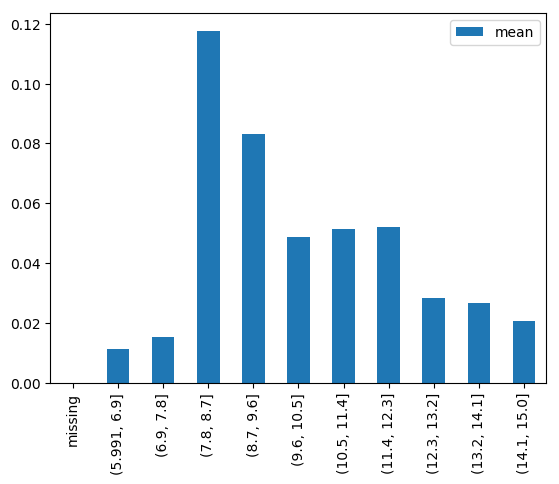

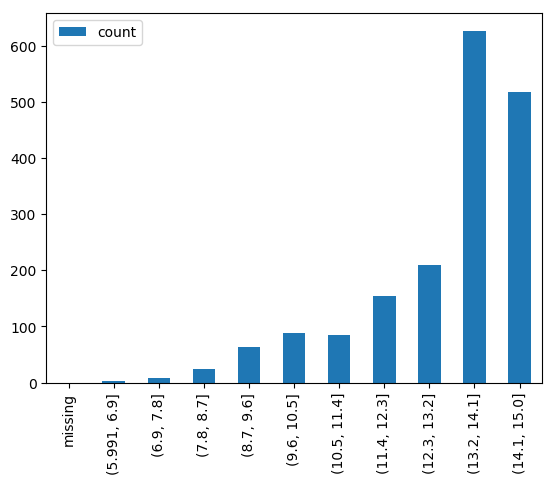

In [327]:
visualize_feature(df_train_2016[df_train_2016.taxdelinquencyyear < 16], "taxdelinquencyyear", "cts", 10 )

In [328]:
dict_column['Fill_0'].append("taxdelinquencyyear")

**16) 'hashottuborspa'**      

Does the home have a hot tub or spa  

number of non-missing value : 2365  
ratio of missing value :0.973802

Values which are not all "True", therefore missing values are possibly "False" which means property taxes are not past due. So I filled missing value with "False"

In [329]:
df_train_2016["hashottuborspa"].describe() 

count     2365
unique       1
top       True
freq      2365
Name: hashottuborspa, dtype: object

             mean
missing  0.011594
True     0.006371
           count
missing  87910.0
True      2365.0
                    mean  count    max    min
hashottuborspa                               
True            0.006371   2365  3.289 -2.976


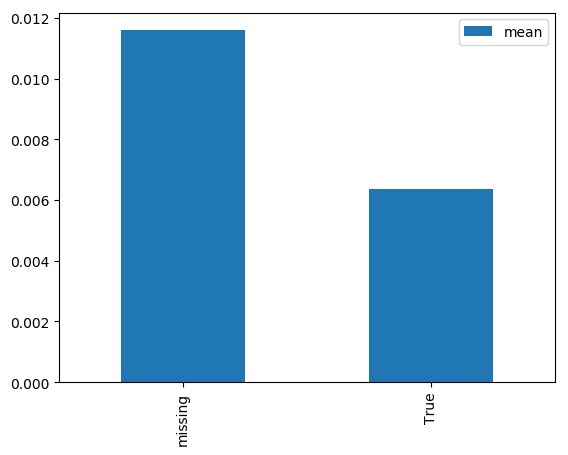

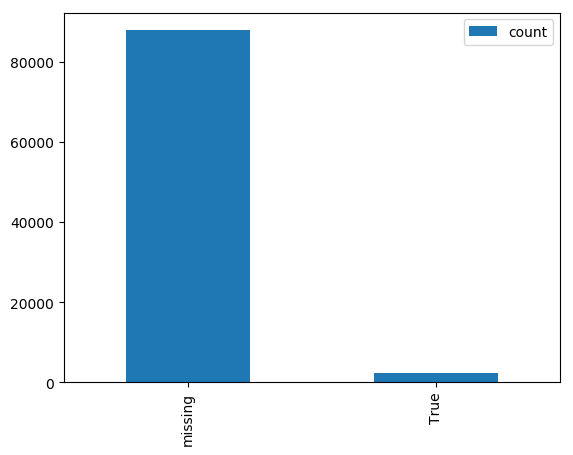

In [330]:
visualize_feature(df_train_2016, "hashottuborspa")

In [331]:
df_train_2016["hashottuborspa"].fillna("False",inplace = True)

**17) 'yardbuildingsqft17'**     

Patio in  yard  

number of missing value : 2646  
ratio of missing value :0.97069

Not every place has a patio. So fill missing values with '0'. 

In [332]:
df_train_2016["yardbuildingsqft17"].describe() 

count    2646.000000
mean      310.142101
std       216.721869
min        25.000000
25%       180.000000
50%       259.500000
75%       384.000000
max      2678.000000
Name: yardbuildingsqft17, dtype: float64

                      mean
missing           0.011285
(22.347, 290.3]   0.017876
(290.3, 555.6]    0.018842
(555.6, 820.9]    0.009970
(820.9, 1086.2]  -0.002061
(1086.2, 1351.5]  0.045009
(1351.5, 1616.8] -0.020912
(1616.8, 1882.1] -0.043533
(1882.1, 2147.4]  0.010900
(2147.4, 2412.7]       NaN
(2412.7, 2678.0] -0.003500
                    count
missing           87629.0
(22.347, 290.3]    1519.0
(290.3, 555.6]      865.0
(555.6, 820.9]      183.0
(820.9, 1086.2]      54.0
(1086.2, 1351.5]     11.0
(1351.5, 1616.8]      8.0
(1616.8, 1882.1]      3.0
(1882.1, 2147.4]      1.0
(2147.4, 2412.7]      0.0
(2412.7, 2678.0]      2.0
                        mean  count     max     min
yardbuildingsqft17                                 
(22.347, 290.3]     0.017876   1519  2.4500 -4.6050
(290.3, 555.6]      0.018842    865  2.4890 -0.5960
(555.6, 820.9]      0.009970    183  0.8608 -0.4780
(820.9, 1086.2]    -0.002061     54  0.2086 -0.1791
(1086.2, 1351.5]    0.045009     11  0.6881 -0.2383


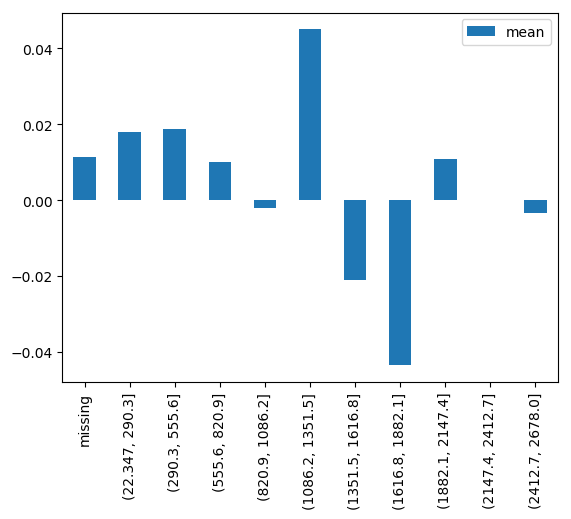

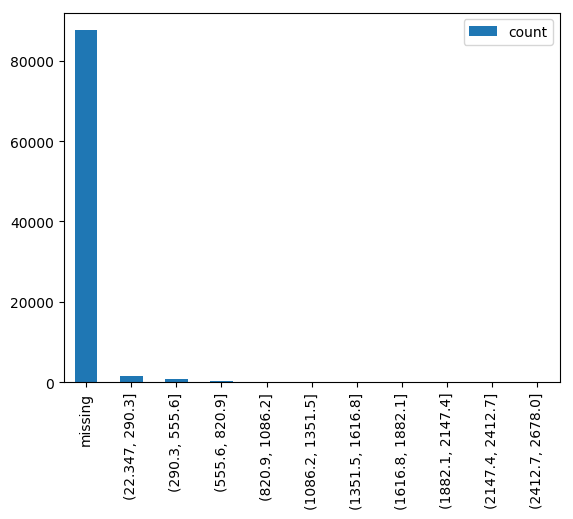

In [333]:
visualize_feature(df_train_2016, "yardbuildingsqft17", "cts", 10 )

In [334]:
dict_column['Fill_0'].append("yardbuildingsqft17")

**18) 'finishedsquarefeet15'**     

Total area  

number of missing value : 3564  
ratio of missing value :0.960521

Every place should have total area, so they are missing randomly. Value are missing for 96% so delete the column. 

In [335]:
df_train_2016["finishedsquarefeet15"].describe() 

count     3564.000000
mean      2380.090067
std       1068.207182
min        560.000000
25%       1648.000000
50%       2104.500000
75%       2862.000000
max      22741.000000
Name: finishedsquarefeet15, dtype: float64

                        mean
missing             0.011542
(537.819, 2778.1]   0.008719
(2778.1, 4996.2]    0.007630
(4996.2, 7214.3]    0.033382
(7214.3, 9432.4]    0.303880
(9432.4, 11650.5]        NaN
(11650.5, 13868.6]       NaN
(13868.6, 16086.7]       NaN
(16086.7, 18304.8]       NaN
(18304.8, 20522.9]       NaN
(20522.9, 22741.0] -0.019200
                      count
missing             86711.0
(537.819, 2778.1]    2610.0
(2778.1, 4996.2]      872.0
(4996.2, 7214.3]       76.0
(7214.3, 9432.4]        5.0
(9432.4, 11650.5]       0.0
(11650.5, 13868.6]      0.0
(13868.6, 16086.7]      0.0
(16086.7, 18304.8]      0.0
(18304.8, 20522.9]      0.0
(20522.9, 22741.0]      1.0
                          mean  count     max     min
finishedsquarefeet15                                 
(537.819, 2778.1]     0.008719   2610  2.9260 -1.6770
(2778.1, 4996.2]      0.007630    872  3.1150 -2.6880
(4996.2, 7214.3]      0.033382     76  1.5470 -1.2040
(7214.3, 9432.4]      0.303880      5  0.5636 

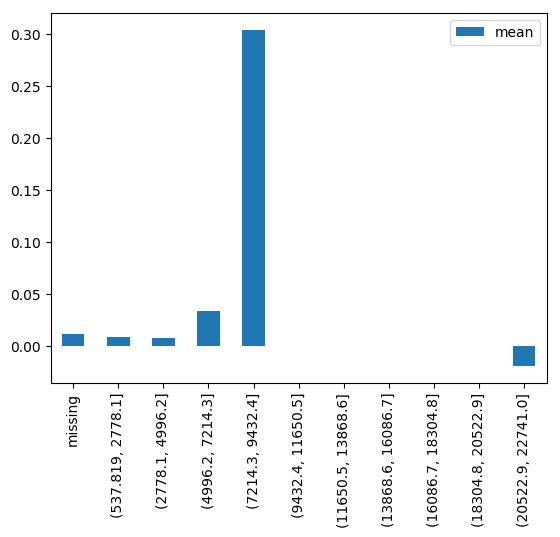

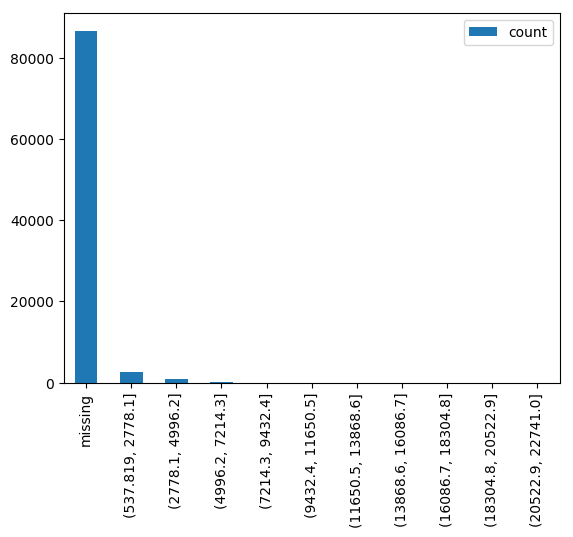

In [336]:
visualize_feature(df_train_2016, "finishedsquarefeet15", "cts", 10 )

In [337]:
dict_column['Drop'].append("finishedsquarefeet15")

**19) 'finishedfloor1squarefeet'**      

Size of the finished living area on the first (entry) floor of the home  

number of missing value : 6856  
ratio of missing value :0.924054

Most home has living room area on the first floor. Ratio of missing values is 92%. so delete the column.



In [338]:
df_train_2016["finishedfloor1squarefeet"].describe() 

count    6856.000000
mean     1347.974037
std       652.399026
min        44.000000
25%       938.000000
50%      1244.000000
75%      1614.000000
max      7625.000000
Name: finishedfloor1squarefeet, dtype: float64

                      mean
missing           0.010970
(36.419, 802.1]   0.016071
(802.1, 1560.2]   0.015666
(1560.2, 2318.3]  0.020323
(2318.3, 3076.4]  0.016188
(3076.4, 3834.5]  0.021884
(3834.5, 4592.6]  0.044864
(4592.6, 5350.7]  0.219267
(5350.7, 6108.8]  0.124850
(6108.8, 6866.9] -0.060675
(6866.9, 7625.0]  0.127550
                    count
missing           83419.0
(36.419, 802.1]    1129.0
(802.1, 1560.2]    3810.0
(1560.2, 2318.3]   1473.0
(2318.3, 3076.4]    288.0
(3076.4, 3834.5]     97.0
(3834.5, 4592.6]     39.0
(4592.6, 5350.7]     12.0
(5350.7, 6108.8]      2.0
(6108.8, 6866.9]      4.0
(6866.9, 7625.0]      2.0
                              mean  count     max     min
finishedfloor1squarefeet                                 
(36.419, 802.1]           0.016071   1129  1.0380 -2.3030
(802.1, 1560.2]           0.015666   3810  2.3050 -4.6050
(1560.2, 2318.3]          0.020323   1473  3.0180 -0.5960
(2318.3, 3076.4]          0.016188    288  1.0160 -0.4780
(3076.4, 3834.5]

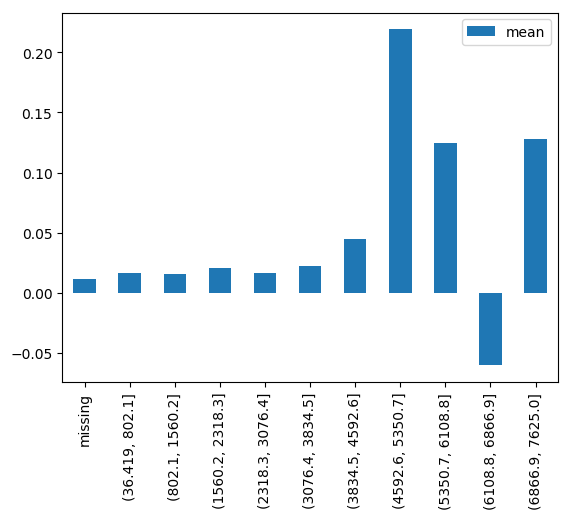

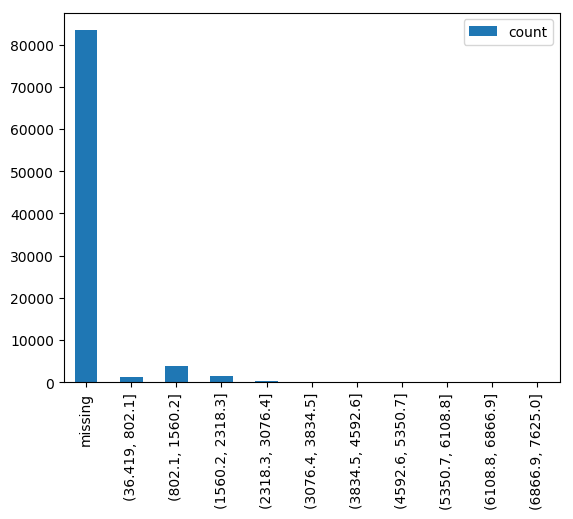

In [339]:
visualize_feature(df_train_2016, "finishedfloor1squarefeet", "cts",10  )

In [340]:
dict_column['Drop'].append("finishedfloor1squarefeet")

**20) 'finishedsquarefeet50'**      

Size of the finished living area on the first (entry) floor of the home  

number of non-missing value : 6856 out of 90275 
ratio of missing value :0.924054

The column "finishedsquarefeet50" is the repeat of the previous column "finishedfloor1squarefeet". Delete the column. 

In [341]:
df_train_2016["finishedsquarefeet50"].describe() 

count    6856.000000
mean     1355.546674
std       673.703488
min        44.000000
25%       938.000000
50%      1248.000000
75%      1619.000000
max      8352.000000
Name: finishedsquarefeet50, dtype: float64

                      mean
missing           0.010970
(35.692, 874.8]   0.015809
(874.8, 1705.6]   0.017429
(1705.6, 2536.4]  0.014608
(2536.4, 3367.2]  0.024533
(3367.2, 4198.0]  0.032536
(4198.0, 5028.8]  0.123815
(5028.8, 5859.6]  0.028463
(5859.6, 6690.4] -0.114175
(6690.4, 7521.2] -0.090700
(7521.2, 8352.0]  0.212600
                    count
missing           83419.0
(35.692, 874.8]    1448.0
(874.8, 1705.6]    3985.0
(1705.6, 2536.4]   1100.0
(2536.4, 3367.2]    207.0
(3367.2, 4198.0]     72.0
(4198.0, 5028.8]     26.0
(5028.8, 5859.6]      8.0
(5859.6, 6690.4]      4.0
(6690.4, 7521.2]      3.0
(7521.2, 8352.0]      3.0
                          mean  count     max     min
finishedsquarefeet50                                 
(35.692, 874.8]       0.015809   1448  1.0380 -2.3030
(874.8, 1705.6]       0.017429   3985  2.4890 -4.6050
(1705.6, 2536.4]      0.014608   1100  3.0180 -0.7052
(2536.4, 3367.2]      0.024533    207  1.0160 -0.3230
(3367.2, 4198.0]      0.032536     72  0

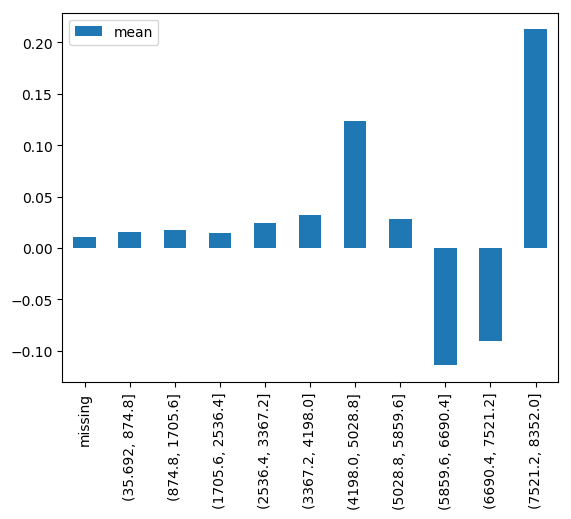

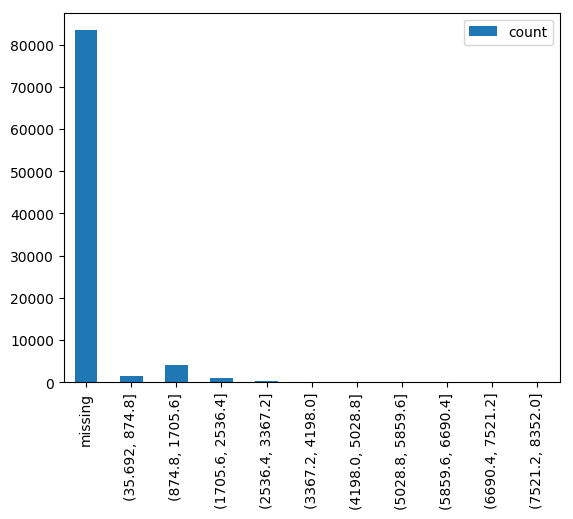

In [342]:
visualize_feature(df_train_2016, "finishedsquarefeet50", "cts", 10 )

In [343]:
dict_column['Drop'].append("finishedsquarefeet50")

**21) 'fireplacecnt'**      

Number of fireplaces in a home (if any)  
number of missing value : 9607  
ratio of missing value :0.893581

Not every home has fireplace. so fill missing values with 0. 



In [344]:
df_train_2016["fireplacecnt"].describe() 

count    9607.000000
mean        1.187884
std         0.484173
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: fireplacecnt, dtype: float64

                  mean
missing       0.011220
(0.996, 1.4]  0.011630
(1.4, 1.8]         NaN
(1.8, 2.2]    0.021573
(2.2, 2.6]         NaN
(2.6, 3.0]    0.028155
(3.0, 3.4]         NaN
(3.4, 3.8]         NaN
(3.8, 4.2]    0.060257
(4.2, 4.6]         NaN
(4.6, 5.0]    0.106000
                count
missing       80668.0
(0.996, 1.4]   8165.0
(1.4, 1.8]        0.0
(1.8, 2.2]     1106.0
(2.2, 2.6]        0.0
(2.6, 3.0]      312.0
(3.0, 3.4]        0.0
(3.4, 3.8]        0.0
(3.8, 4.2]       21.0
(4.2, 4.6]        0.0
(4.6, 5.0]        3.0
                  mean  count     max     min
fireplacecnt                                 
(0.996, 1.4]  0.011630   8165  3.2890 -4.6050
(1.4, 1.8]         NaN      0     NaN     NaN
(1.8, 2.2]    0.021573   1106  1.8470 -0.5586
(2.2, 2.6]         NaN      0     NaN     NaN
(2.6, 3.0]    0.028155    312  3.0180 -0.5960
(3.0, 3.4]         NaN      0     NaN     NaN
(3.4, 3.8]         NaN      0     NaN     NaN
(3.8, 4.2]    0.060257     21  0.2852 -0.3230


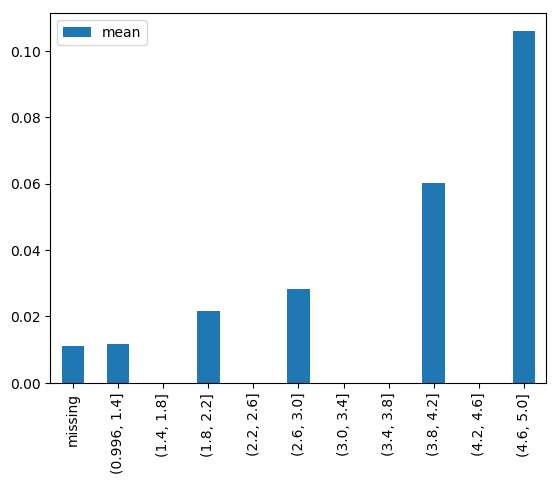

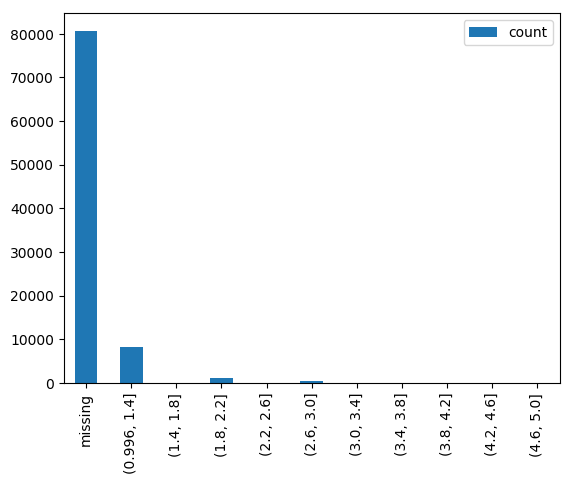

In [345]:
visualize_feature(df_train_2016, "fireplacecnt", "cts", 10 )

In [346]:
dict_column['Fill_0'].append("fireplacecnt")

**22) 'threequarterbathnbr'**      

Number of 3/4 bathrooms in house (shower + sink + toilet)  

number of non-missing value : 12009  
ratio of missing value :0.866973

Not all home has 3/4 bathrooms. so fill missing values with 0. 

In [347]:
df_train_2016["threequarterbathnbr"].describe() 

count    12009.000000
mean         1.008743
std          0.100830
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: threequarterbathnbr, dtype: float64

                  mean
missing       0.011181
(0.997, 1.3]  0.012815
(1.3, 1.6]         NaN
(1.6, 1.9]         NaN
(1.9, 2.2]    0.068297
(2.2, 2.5]         NaN
(2.5, 2.8]         NaN
(2.8, 3.1]    0.035783
(3.1, 3.4]         NaN
(3.4, 3.7]         NaN
(3.7, 4.0]    0.178100
                count
missing       78266.0
(0.997, 1.3]  11912.0
(1.3, 1.6]        0.0
(1.6, 1.9]        0.0
(1.9, 2.2]       90.0
(2.2, 2.5]        0.0
(2.5, 2.8]        0.0
(2.8, 3.1]        6.0
(3.1, 3.4]        0.0
(3.4, 3.7]        0.0
(3.7, 4.0]        1.0
                         mean  count     max     min
threequarterbathnbr                                 
(0.997, 1.3]         0.012815  11912  3.0180 -4.6050
(1.3, 1.6]                NaN      0     NaN     NaN
(1.6, 1.9]                NaN      0     NaN     NaN
(1.9, 2.2]           0.068297     90  3.2890 -0.6330
(2.2, 2.5]                NaN      0     NaN     NaN
(2.5, 2.8]                NaN      0     NaN     NaN
(2.8, 3.1]           0.035783      6

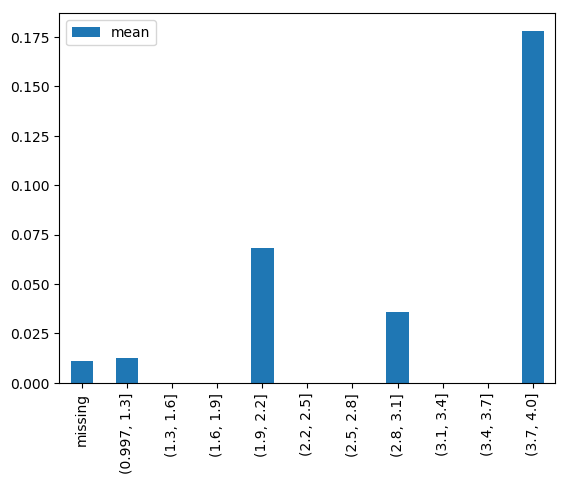

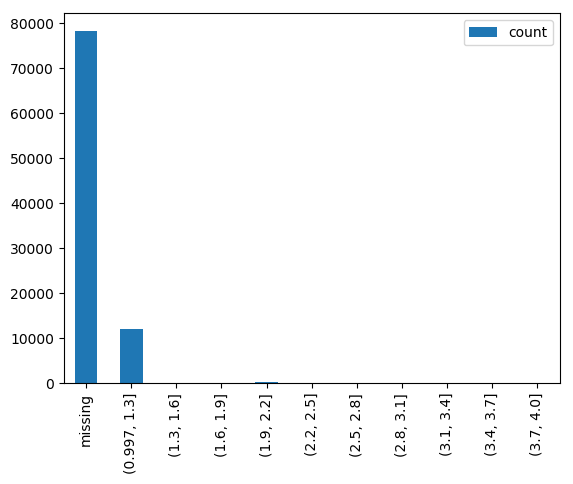

In [348]:
visualize_feature(df_train_2016, "threequarterbathnbr", "cts", 10 )

In [349]:
dict_column['Fill_0'].append("threequarterbathnbr")

**23) 'pooltypeid7'**      

Pool without hot tub  

number of non- missing value : 16697 out of 90275 
ratio of missing value :0.815043

Not all home has a pool, However, we cannot figure out missing value means whether home without a pool or pool without hot tub. so delete the colun

In [350]:
df_train_2016["pooltypeid7"].describe() 

count    16697.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: pooltypeid7, dtype: float64

             mean
missing  0.012077
1.0      0.008726
           count
missing  73578.0
1.0      16697.0
                 mean  count    max    min
pooltypeid7                               
1.0          0.008726  16697  3.968 -4.605


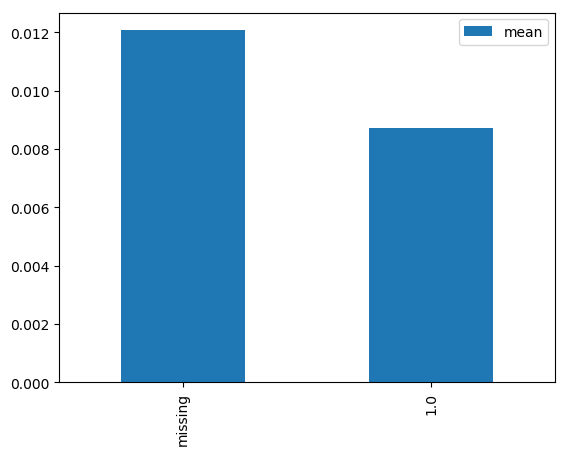

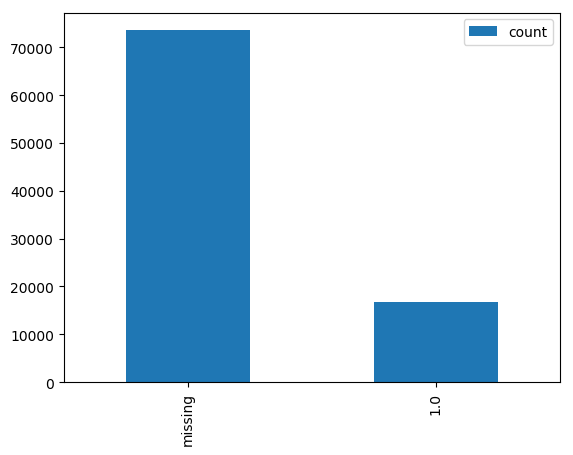

In [351]:
visualize_feature(df_train_2016, "pooltypeid7" )

In [352]:
dict_column['Drop'].append("pooltypeid7")

**24) 'poolcnt'**      

Number of pools on the lot (if any)  

number of non-missing value : 17901 out of 90275 
ratio of missing value :0.801706

Missing value can mean home with no pool. so fill missing values with 0. 

In [353]:
df_train_2016["poolcnt"].describe() 

count    17901.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: poolcnt, dtype: float64

             mean
missing  0.012177
1.0      0.008548
           count
missing  72374.0
1.0      17901.0
             mean  count    max    min
poolcnt                               
1.0      0.008548  17901  3.968 -4.605


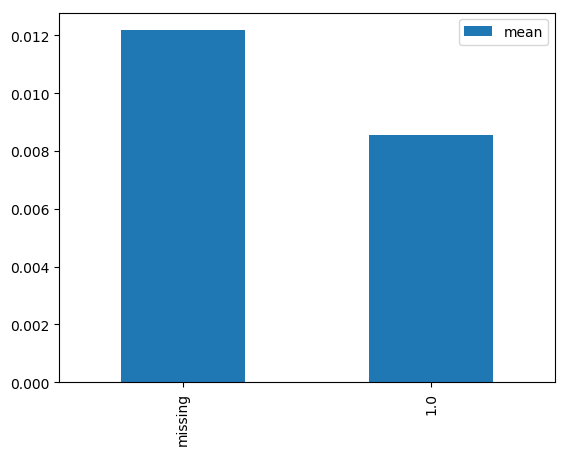

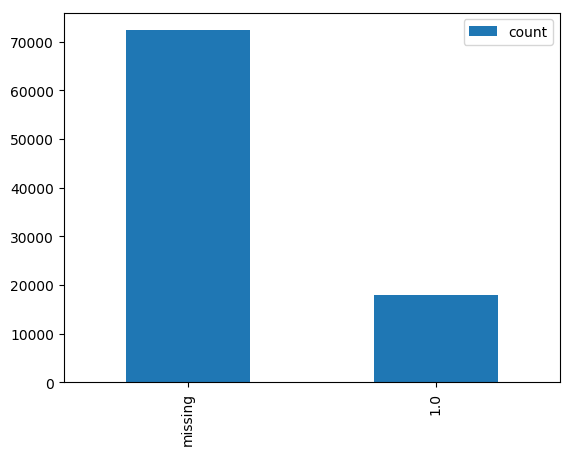

In [354]:
visualize_feature(df_train_2016, "poolcnt" )

In [355]:
dict_column['Fill_0'].append("poolcnt")

**25) 'numberofstories'**      

Number of stories or levels the home has  

number of missing value : 20570 out of 90275
ratio of non-missing value :0.772141

Every home has at least 1 level. Therefore it is missing randomly. so delete the column. 

In [356]:
df_train_2016["numberofstories"].describe() 

count    20570.000000
mean         1.440739
std          0.544498
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: numberofstories, dtype: float64

             mean
missing  0.011208
1.0      0.010724
2.0      0.014252
3.0      0.018598
4.0      0.052100
           count
missing  69705.0
1.0      12016.0
2.0       8044.0
3.0        508.0
4.0          2.0
                     mean  count     max    min
numberofstories                                
1.0              0.010724  12016  3.2890 -2.976
2.0              0.014252   8044  3.0180 -4.605
3.0              0.018598    508  1.2190 -2.207
4.0              0.052100      2  0.1062 -0.002


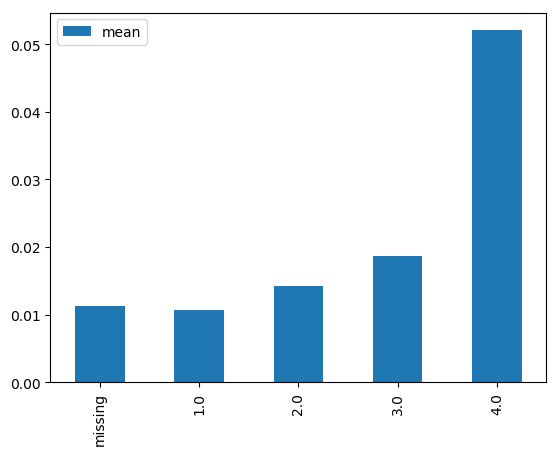

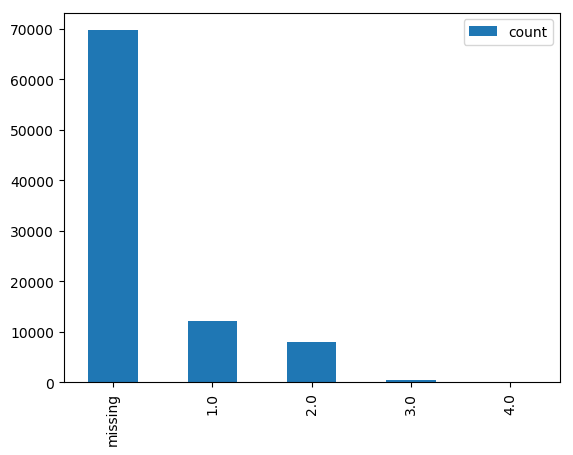

In [357]:
visualize_feature(df_train_2016, "numberofstories" )

In [358]:
dict_column['Drop'].append("numberofstories")

**26) 'airconditioningtypeid'**      

Type of cooling system present in the home (if any)  

number of missing value : 28781  
ratio of missing value :0.681185

Not all home can have a colling system. so fill missing values with 0. 

In [359]:
df_train_2016["airconditioningtypeid"].describe() 

count    28781.000000
mean         1.816372
std          2.974168
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         13.000000
Name: airconditioningtypeid, dtype: float64

             mean
missing  0.010701
1.0      0.012852
3.0      0.091700
5.0      0.015682
9.0      0.010000
11.0     0.026294
13.0     0.015466
           count
missing  61494.0
1.0      26668.0
3.0          1.0
5.0        215.0
9.0          1.0
11.0        63.0
13.0      1833.0
                           mean  count     max     min
airconditioningtypeid                                 
1.0                    0.012852  26668  4.7370 -3.1940
3.0                    0.091700      1  0.0917  0.0917
5.0                    0.015682    215  1.2210 -0.2370
9.0                    0.010000      1  0.0100  0.0100
11.0                   0.026294     63  0.2111 -0.0987
13.0                   0.015466   1833  3.2890 -2.6880


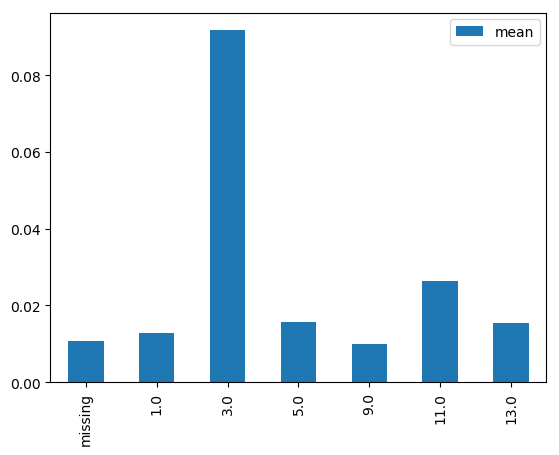

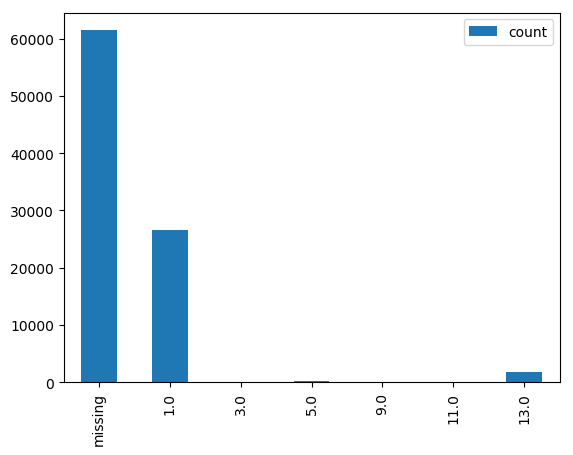

In [360]:
visualize_feature(df_train_2016, "airconditioningtypeid" )

In [361]:
dict_column['Fill_0'].append("airconditioningtypeid")

**27) 'garagetotalsqft'**      

Total number of square feet of all garages on lot including an attached garage  

number of non-missing value : 29937  
ratio of missing value :0.66838

Delete the column for the same reasong wit the next column "garagecarcnt". 

In [362]:
df_train_2016["garagetotalsqft"].describe() 

count    29937.000000
mean       345.521228
std        267.015918
min          0.000000
25%          0.000000
50%        433.000000
75%        484.000000
max       7339.000000
Name: garagetotalsqft, dtype: float64

                      mean
missing           0.011298
(-7.339, 733.9]   0.011190
(733.9, 1467.8]   0.034468
(1467.8, 2201.7]  0.005641
(2201.7, 2935.6] -0.059723
(2935.6, 3669.5]  0.082000
(3669.5, 4403.4]  0.171800
(4403.4, 5137.3]       NaN
(5137.3, 5871.2]       NaN
(5871.2, 6605.1]       NaN
(6605.1, 7339.0] -0.478000
                    count
missing           60338.0
(-7.339, 733.9]   29087.0
(733.9, 1467.8]     798.0
(1467.8, 2201.7]     32.0
(2201.7, 2935.6]     13.0
(2935.6, 3669.5]      4.0
(3669.5, 4403.4]      2.0
(4403.4, 5137.3]      0.0
(5137.3, 5871.2]      0.0
(5871.2, 6605.1]      0.0
(6605.1, 7339.0]      1.0
                      mean  count     max     min
garagetotalsqft                                  
(-7.339, 733.9]   0.011190  29087  3.0180 -4.6050
(733.9, 1467.8]   0.034468    798  3.2890 -0.6892
(1467.8, 2201.7]  0.005641     32  0.2151 -0.6539
(2201.7, 2935.6] -0.059723     13  0.1510 -0.5192
(2935.6, 3669.5]  0.082000      4  0.2949 -0.2033
(3669.5, 4403.

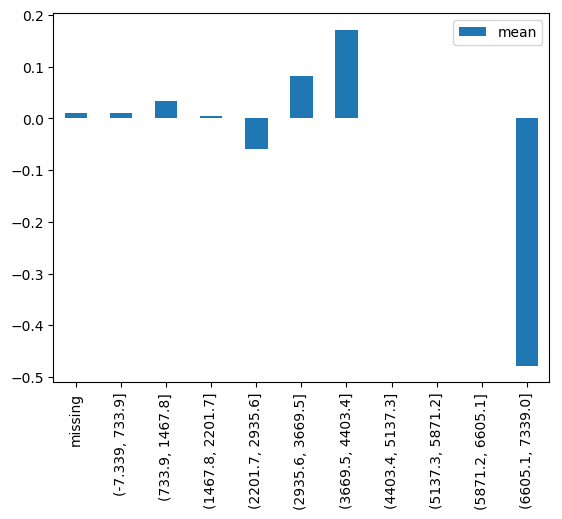

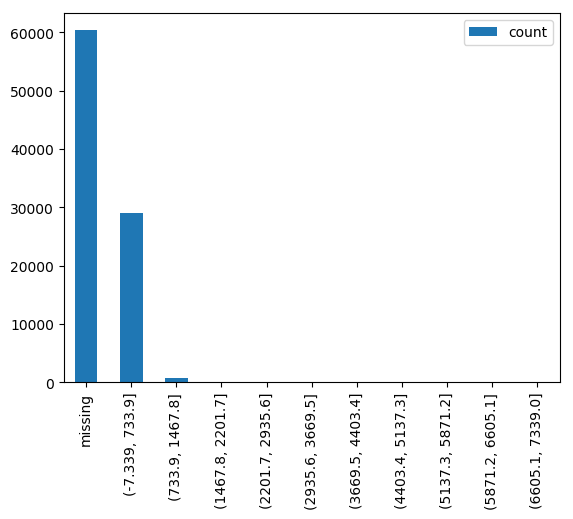

In [363]:
visualize_feature(df_train_2016, "garagetotalsqft", "cts", 10 )

In [364]:
dict_column['Drop'].append("garagetotalsqft")

**28) 'garagecarcnt'**      

Total number of garages on the lot including an attached garage  

number of missing value : 29937  
ratio of missing value :0.66838

Not every home has a garage. So we might fill missing value with 0 which means home without a garage. However, 290 cells have value of 0 . It means that not every home without a garage has missing value. So it is missing for random. so delete the column. 

In [365]:
df_train_2016["garagecarcnt"].describe() 

count    29937.000000
mean         1.812005
std          0.608761
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         24.000000
Name: garagecarcnt, dtype: float64

In [366]:
df_train_2016[df_train_2016["garagecarcnt"]==0]["garagecarcnt"].value_counts()

0.0    290
Name: garagecarcnt, dtype: int64

                   mean
missing        0.011298
(-0.024, 2.4]  0.011003
(2.4, 4.8]     0.033278
(4.8, 7.2]     0.052909
(7.2, 9.6]    -0.059723
(9.6, 12.0]    0.082000
(12.0, 14.4]   0.171800
(14.4, 16.8]        NaN
(16.8, 19.2]        NaN
(19.2, 21.6]        NaN
(21.6, 24.0]  -0.478000
                 count
missing        60338.0
(-0.024, 2.4]  28911.0
(2.4, 4.8]       925.0
(4.8, 7.2]        81.0
(7.2, 9.6]        13.0
(9.6, 12.0]        4.0
(12.0, 14.4]       2.0
(14.4, 16.8]       0.0
(16.8, 19.2]       0.0
(19.2, 21.6]       0.0
(21.6, 24.0]       1.0
                   mean  count     max     min
garagecarcnt                                  
(-0.024, 2.4]  0.011003  28911  3.0180 -4.6050
(2.4, 4.8]     0.033278    925  3.2890 -0.6892
(4.8, 7.2]     0.052909     81  1.7810 -0.6539
(7.2, 9.6]    -0.059723     13  0.1510 -0.5192
(9.6, 12.0]    0.082000      4  0.2949 -0.2033
(12.0, 14.4]   0.171800      2  0.4898 -0.1462
(14.4, 16.8]        NaN      0     NaN     NaN
(16.8, 19.2] 

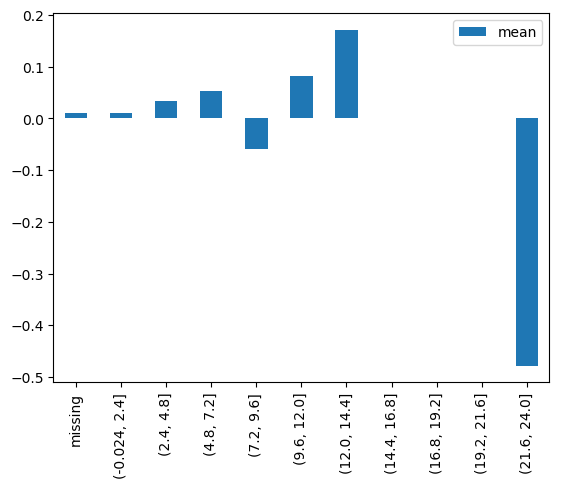

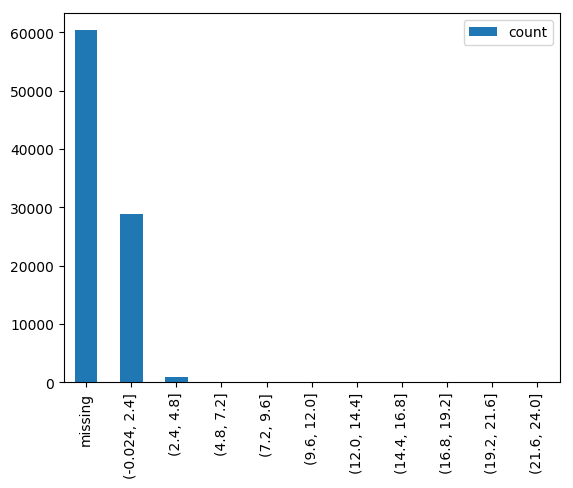

In [367]:
visualize_feature(df_train_2016, "garagecarcnt", "cts", 10 )

In [368]:
dict_column['Drop'].append("garagecarcnt")

**29) 'regionidneighborhood'**     

Neighborhood in which the property is located  

number of missing value : 36012  
ratio of missing value :0.601086

From the graph below, we can see that it is missing randomly. So delete the column. 

In [369]:
df_train_2016["regionidneighborhood"].describe() 

count     36012.000000
mean     190646.540237
std      166228.910572
min        6952.000000
25%       46736.000000
50%      118887.000000
75%      274800.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64

                          mean
missing               0.012266
(6194.785, 82673.5]   0.011667
(82673.5, 158395.0]   0.010146
(158395.0, 234116.5] -0.007008
(234116.5, 309838.0]  0.009461
(309838.0, 385559.5]  0.066699
(385559.5, 461281.0]  0.007180
(461281.0, 537002.5]       NaN
(537002.5, 612724.0]       NaN
(612724.0, 688445.5] -0.052934
(688445.5, 764167.0]  0.012605
                        count
missing               54263.0
(6194.785, 82673.5]   13079.0
(82673.5, 158395.0]    5434.0
(158395.0, 234116.5]     65.0
(234116.5, 309838.0]  13678.0
(309838.0, 385559.5]     68.0
(385559.5, 461281.0]   2291.0
(461281.0, 537002.5]      0.0
(537002.5, 612724.0]      0.0
(612724.0, 688445.5]    100.0
(688445.5, 764167.0]   1297.0
                          mean  count     max     min
regionidneighborhood                                 
(6194.785, 82673.5]   0.011667  13079  3.9680 -3.1940
(82673.5, 158395.0]   0.010146   5434  4.7370 -4.5100
(158395.0, 234116.5] -0.007008     65  0.1714 -0.408

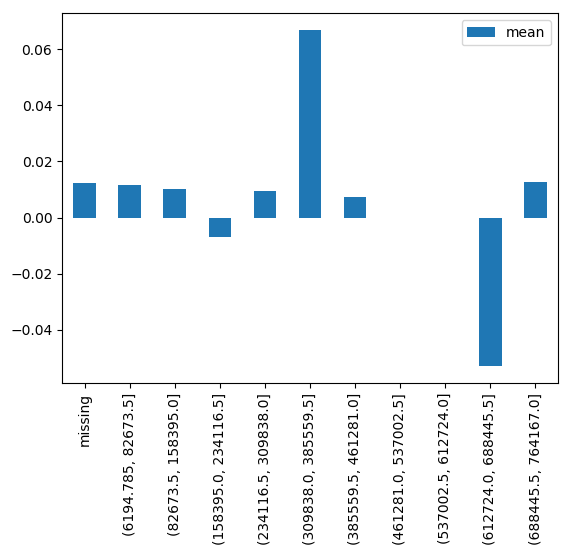

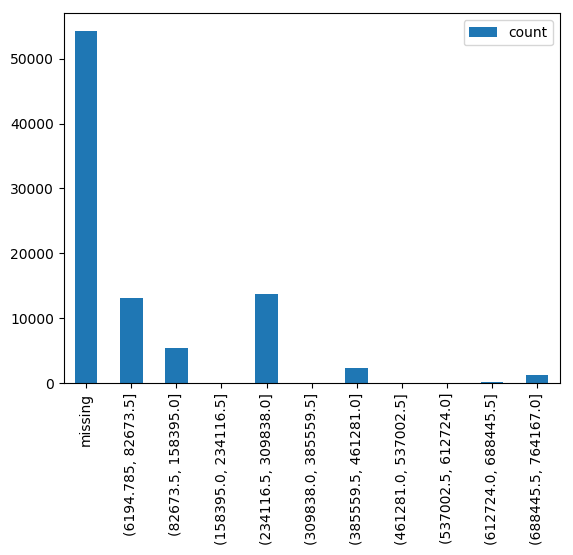

In [370]:
visualize_feature(df_train_2016, "regionidneighborhood", "cts", 10 )

In [371]:
dict_column['Drop'].append("regionidneighborhood")

**30) 'heatingorsystemtypeid'**      

Type of home heating system  

number of non-missing value : 56080 out of 90275  
ratio of missing value :0.378787

There is certainly no law that prohibits selling a home with no heater in California. Therefore missing value possibly means home without heating system. so filled missing values with 0. 

In [372]:
df_train_2016["heatingorsystemtypeid"].describe() 

count    56080.000000
mean         3.926979
std          3.684382
min          1.000000
25%          2.000000
50%          2.000000
75%          7.000000
max         24.000000
Name: heatingorsystemtypeid, dtype: float64

             mean
missing  0.012052
1.0      0.024577
2.0      0.013245
6.0      0.009798
7.0      0.007492
10.0    -0.029300
11.0    -0.015100
12.0    -0.013100
13.0    -0.000012
14.0    -0.004900
18.0     0.027436
20.0    -0.000681
24.0    -0.010977
           count
missing  34195.0
1.0         13.0
2.0      38303.0
6.0        970.0
7.0      15519.0
10.0         2.0
11.0         1.0
12.0         1.0
13.0        76.0
14.0         2.0
18.0        25.0
20.0        97.0
24.0      1071.0
                           mean  count     max     min
heatingorsystemtypeid                                 
1.0                    0.024577     13  0.1604 -0.0726
2.0                    0.013245  38303  4.7370 -3.1940
6.0                    0.009798    970  1.4770 -0.5192
7.0                    0.007492  15519  3.4430 -4.6050
10.0                  -0.029300      2 -0.0020 -0.0566
11.0                  -0.015100      1 -0.0151 -0.0151
12.0                  -0.013100      1 -0.0131 -0.0131
13.0           

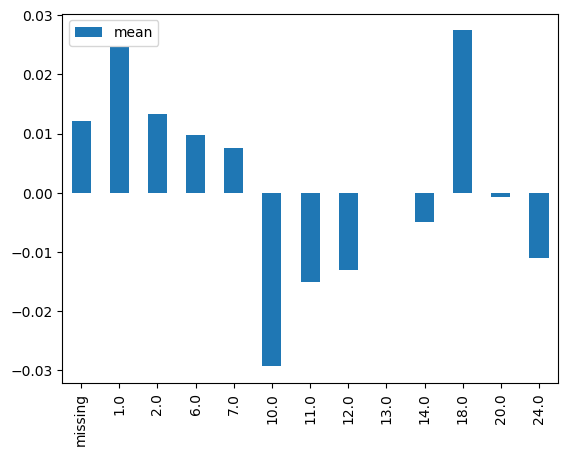

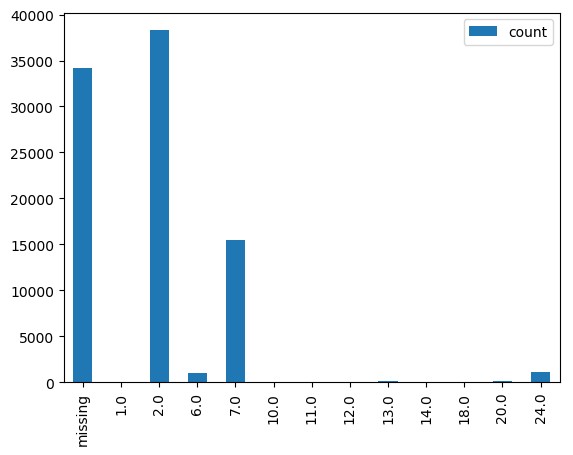

In [373]:
visualize_feature(df_train_2016, "heatingorsystemtypeid" )

In [374]:
dict_column['Fill_0'].append("heatingorsystemtypeid")

**31) 'buildingqualitytypeid'**      

Overall assessment of condition of the building from best (lowest) to worst (highest)  

number of non-missing value : 57364 out of 90275  
ratio of missing value :0.364564

Every home can have overall assessment of condition of the building. Therefore, fill missing values with mean 

In [375]:
df_train_2016["buildingqualitytypeid"].describe() 

count    57364.000000
mean         5.565407
std          1.900602
min          1.000000
25%          4.000000
50%          7.000000
75%          7.000000
max         12.000000
Name: buildingqualitytypeid, dtype: float64

                  mean
missing       0.011849
(0.989, 2.1]  0.013547
(2.1, 3.2]         NaN
(3.2, 4.3]    0.013469
(4.3, 5.4]         NaN
(5.4, 6.5]    0.063650
(6.5, 7.6]    0.008872
(7.6, 8.7]    0.406700
(8.7, 9.8]         NaN
(9.8, 10.9]   0.017232
(10.9, 12.0]  0.002373
                count
missing       32911.0
(0.989, 2.1]   2627.0
(2.1, 3.2]        0.0
(3.2, 4.3]    23839.0
(4.3, 5.4]        0.0
(5.4, 6.5]        2.0
(6.5, 7.6]    29310.0
(7.6, 8.7]        5.0
(8.7, 9.8]        0.0
(9.8, 10.9]    1461.0
(10.9, 12.0]    120.0
                           mean  count     max     min
buildingqualitytypeid                                 
(0.989, 2.1]           0.013547   2627  3.4030 -1.7090
(2.1, 3.2]                  NaN      0     NaN     NaN
(3.2, 4.3]             0.013469  23839  4.5200 -3.1940
(4.3, 5.4]                  NaN      0     NaN     NaN
(5.4, 6.5]             0.063650      2  0.1765 -0.0492
(6.5, 7.6]             0.008872  29310  3.4430 -4.6050
(7.6, 8.7]          

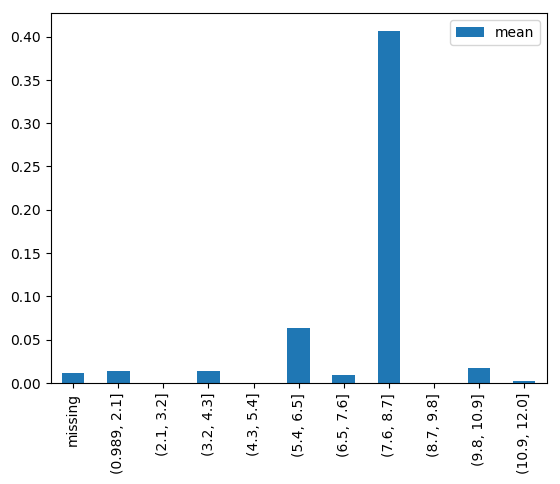

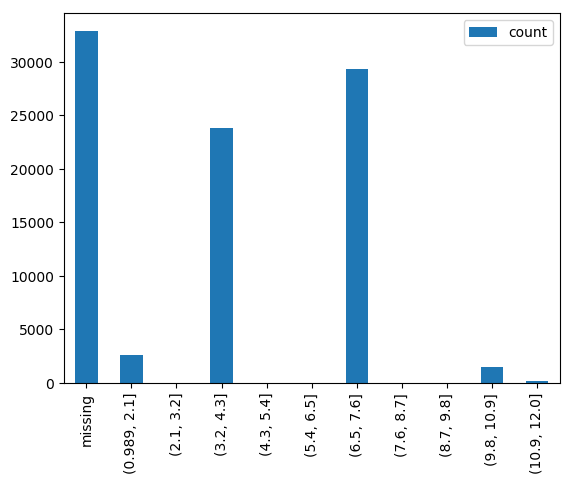

In [376]:
visualize_feature(df_train_2016, "buildingqualitytypeid", "cts",10  )

In [377]:
dict_column['Fill_mean'].append("buildingqualitytypeid")

**32) 'propertyzoningdesc'**      

Description of the allowed land uses (zoning) for that property  

number of non-missing value : 58313 out of 90275 
ratio of missing value :0.354052

The most frequent value is "LAR1" and has frequency of 7678. However, LAR1 is the only small fraction of data (8%) on the other hand missing values are 35% of data. For categorical columns, if the missing value is so high it is usually best to not fill it with a value and treat missing values as an another class in this column.

In [378]:
df_train_2016["propertyzoningdesc"].describe() 

count     58313
unique     1996
top        LAR1
freq       7678
Name: propertyzoningdesc, dtype: object

In [379]:
df_train_2016[df_train_2016["propertyzoningdesc"]=="LAR1"]["propertyzoningdesc"].value_counts()

LAR1    7678
Name: propertyzoningdesc, dtype: int64

                mean
missing     0.011937
1NR1*      -0.065925
1NR3*      -0.055633
AH RM-CD*   0.011588
AH RM-CD-F  0.008075
AH RS(3)10  0.029600
AH RS-(3)-  0.034200
AHA11*     -0.045680
AHA110000*  0.064900
AHA21*      0.047800
AHR110000*  0.008800
AHR120000* -0.031400
AHR17000*   0.004270
AHR17000-C  0.034200
AHR17500*   0.025490
AHR26250*   0.058490
AHR3*       0.009808
AHR3-R325U  0.017200
AHR335U*    0.025970
AHRA10000*  0.024500
AHRA20000* -0.013150
AHRA20000- -0.126700
AHRA2OOOO*  0.016900
AHRH-OA-FC  0.028050
AHRPD10*    0.033850
AHRPD10000  0.023593
AHRPD11.6U  0.055867
AHRPD15000 -0.024267
AHRPD1O*    0.060533
AHRPD51U*   0.060867
...              ...
WHR1YY     -0.004388
WHR2*      -0.019388
WHR2PP*     0.007100
WHR2YY      0.014661
WHR3        0.138000
WHR3*       0.069508
WHR4*      -0.001791
WHRAYY      0.006000
WHRE*       0.096273
WHRE20000*  0.027273
WHRZ*      -0.003000
WV RPD56*   0.046900
WVA21*      0.010900
WVR112000* -0.051020
WVR115000* -0.012367
WVR16000*  -0

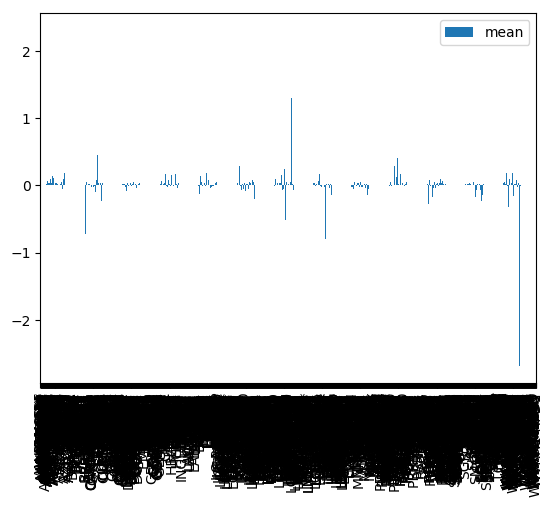

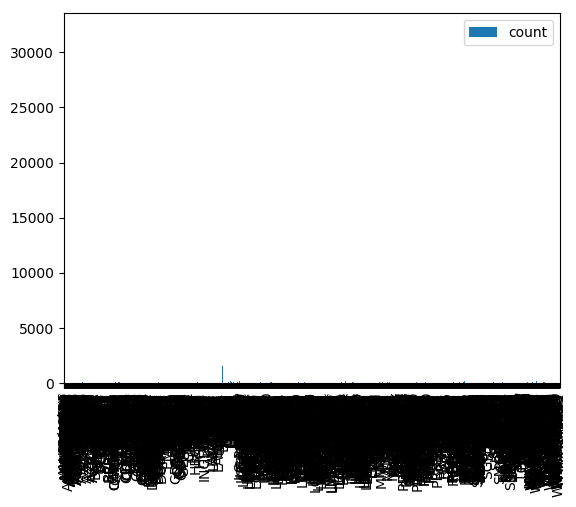

In [380]:
visualize_feature(df_train_2016, "propertyzoningdesc")

In [381]:
df_train_2016["propertyzoningdesc"].fillna("Missing",inplace = True)

**33) 'unitcnt'**      

Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)  

number of missing value : 58353  
ratio of missing value :0.353608

Most home has 1 unit, which is 54503, 93% among non-missing values. So fill missing values with 1. 

In [382]:
df_train_2016["unitcnt"].describe() 

count    58353.000000
mean         1.110414
std          0.797235
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        143.000000
Name: unitcnt, dtype: float64

In [383]:
df_train_2016["unitcnt"].unique() 

array([  1.,  nan,   2.,   4.,   3.,   6., 143.,  11.,   9.,   5.,  70.])

             mean
missing  0.011715
1.0      0.011616
2.0      0.010164
3.0     -0.002914
4.0      0.005813
5.0     -0.032500
6.0     -0.008000
9.0      0.014900
11.0    -0.013100
70.0     0.015900
143.0    0.036300
           count
missing  31922.0
1.0      54503.0
2.0       2354.0
3.0        619.0
4.0        871.0
5.0          1.0
6.0          1.0
9.0          1.0
11.0         1.0
70.0         1.0
143.0        1.0
             mean  count     max     min
unitcnt                                 
1.0      0.011616  54503  4.7370 -4.6050
2.0      0.010164   2354  2.9260 -1.6770
3.0     -0.002914    619  1.4690 -0.9467
4.0      0.005813    871  3.1150 -1.2040
5.0     -0.032500      1 -0.0325 -0.0325
6.0     -0.008000      1 -0.0080 -0.0080
9.0      0.014900      1  0.0149  0.0149
11.0    -0.013100      1 -0.0131 -0.0131
70.0     0.015900      1  0.0159  0.0159
143.0    0.036300      1  0.0363  0.0363


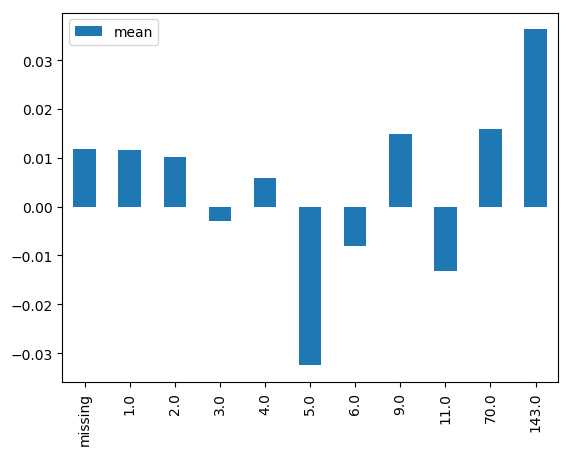

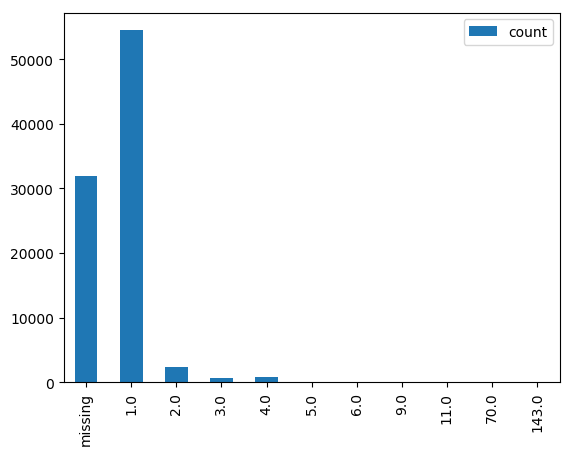

In [384]:
visualize_feature(df_train_2016, "unitcnt")

In [385]:
df_train_2016["unitcnt"].fillna(1,inplace = True)

**34) 'lotsizesquarefeet'**      

Area of the lot in square feet  

number of missing value : 80125  
ratio of missing value :0.112434

Every home has area of the lot in square feet. So fill it with mean. 

The average of area of the lot is 29110.16 square feet.

In [386]:
df_train_2016["lotsizesquarefeet"].describe() 

count    8.012500e+04
mean     2.911016e+04
std      1.217213e+05
min      1.670000e+02
25%      5.703000e+03
50%      7.200000e+03
75%      1.168600e+04
max      6.971010e+06
Name: lotsizesquarefeet, dtype: float64

                            mean
missing                 0.007159
(-6803.843, 697251.3]   0.011974
(697251.3, 1394335.6]   0.015951
(1394335.6, 2091419.9]  0.036851
(2091419.9, 2788504.2]  0.163800
(2788504.2, 3485588.5]       NaN
(3485588.5, 4182672.8] -0.015213
(4182672.8, 4879757.1]       NaN
(4879757.1, 5576841.4]       NaN
(5576841.4, 6273925.7]       NaN
(6273925.7, 6971010.0]  0.079763
                          count
missing                 10150.0
(-6803.843, 697251.3]   79797.0
(697251.3, 1394335.6]     269.0
(1394335.6, 2091419.9]     35.0
(2091419.9, 2788504.2]      1.0
(2788504.2, 3485588.5]      0.0
(3485588.5, 4182672.8]     15.0
(4182672.8, 4879757.1]      0.0
(4879757.1, 5576841.4]      0.0
(5576841.4, 6273925.7]      0.0
(6273925.7, 6971010.0]      8.0
                            mean  count     max     min
lotsizesquarefeet                                      
(-6803.843, 697251.3]   0.011974  79797  4.7370 -4.6050
(697251.3, 1394335.6]   0.015951    269  1.3160 -0.3

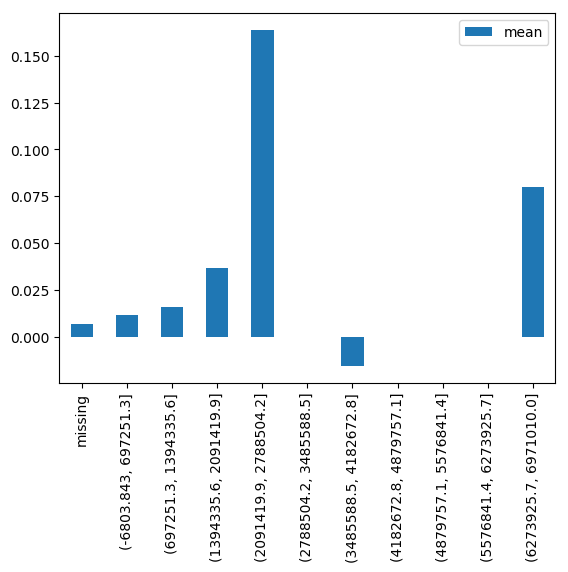

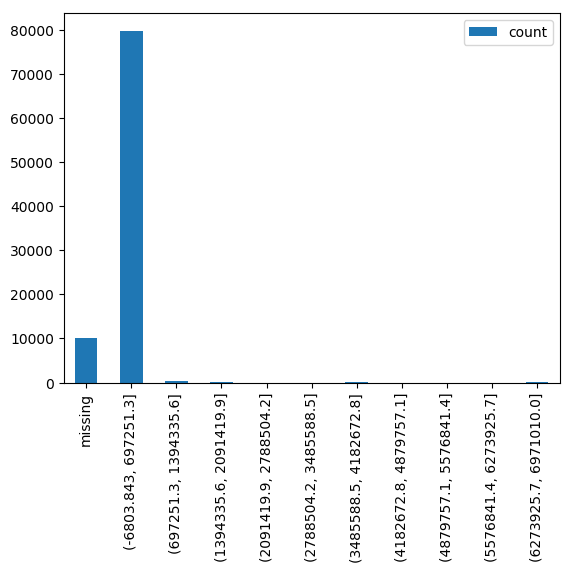

In [387]:
visualize_feature(df_train_2016, "lotsizesquarefeet", "cts",  10)

In [388]:
dict_column['Fill_mean'].append("lotsizesquarefeet")

**35) 'finishedsquarefeet12'**     

Finished living area  

number of missing value : 85596  
ratio of missing value :0.051831

Most home has finished living area. so fill missing values with mean value

In [389]:
df_train_2016["finishedsquarefeet12"].describe() 

count    85596.000000
mean      1745.454531
std        909.941166
min          2.000000
25%       1172.000000
50%       1518.000000
75%       2056.000000
max      20013.000000
Name: finishedsquarefeet12, dtype: float64

                        mean
missing             0.005279
(-18.011, 2003.1]   0.008721
(2003.1, 4004.2]    0.018718
(4004.2, 6005.3]    0.025066
(6005.3, 8006.4]    0.086716
(8006.4, 10007.5]   0.041449
(10007.5, 12008.6]  0.025035
(12008.6, 14009.7]  0.141537
(14009.7, 16010.8]  0.111950
(16010.8, 18011.9]  0.327900
(18011.9, 20013.0] -0.159750
                      count
missing              4679.0
(-18.011, 2003.1]   62754.0
(2003.1, 4004.2]    20628.0
(4004.2, 6005.3]     1812.0
(6005.3, 8006.4]      298.0
(8006.4, 10007.5]      69.0
(10007.5, 12008.6]     20.0
(12008.6, 14009.7]      8.0
(14009.7, 16010.8]      4.0
(16010.8, 18011.9]      1.0
(18011.9, 20013.0]      2.0
                          mean  count     max     min
finishedsquarefeet12                                 
(-18.011, 2003.1]     0.008721  62754  3.9680 -4.6050
(2003.1, 4004.2]      0.018718  20628  4.7370 -2.9760
(4004.2, 6005.3]      0.025066   1812  2.4500 -1.2590
(6005.3, 8006.4]      0.086716    298  3.2890 

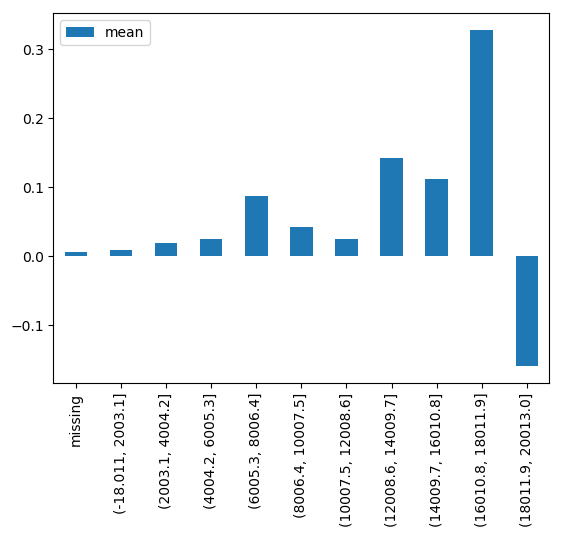

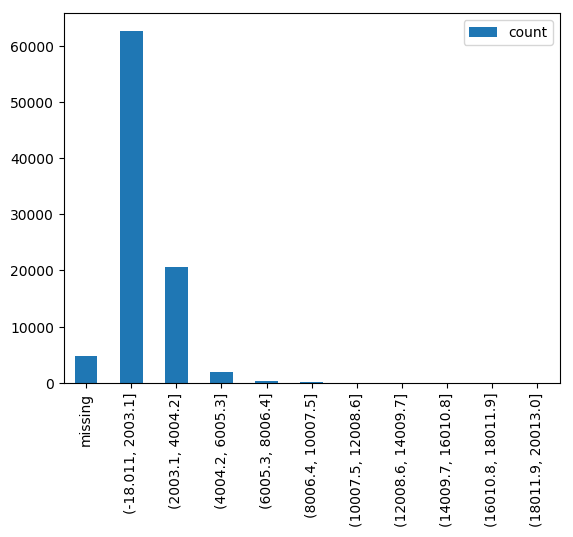

In [390]:
visualize_feature(df_train_2016, "finishedsquarefeet12", "cts", 10 )

In [391]:
dict_column['Fill_mean'].append("finishedsquarefeet12")

**36) 'regionidcity'**      

City in which the property is located (if any)  

number of non-missing value : 88472 out of 9
ratio of missing value :0.019972

the most frequent value is 12447 with 20559 of frequency. the second most frequent value is 46298 with 3000 of frequency. so fill missing values with the most frequent value, 12447. 

In [392]:
df_train_2016["regionidcity"].describe() 

count     88472.000000
mean      33761.332851
std       46672.393863
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64

In [393]:
df_train_2016["regionidcity"].value_counts()

12447.0     20559
46298.0      3000
52650.0      2132
54311.0      2128
5534.0       2035
40227.0      1949
16764.0      1800
25218.0      1586
34278.0      1383
27110.0      1266
12773.0      1222
47019.0      1187
13150.0      1120
47568.0      1097
45457.0      1052
24812.0      1037
33252.0      1034
34543.0       949
51239.0       932
54722.0       929
53571.0       923
25459.0       904
24832.0       891
32380.0       820
13693.0       815
37086.0       791
33612.0       772
20008.0       756
21412.0       729
15554.0       693
            ...  
114828.0       50
30399.0        49
113412.0       47
118875.0       40
16961.0        39
16389.0        36
272578.0       33
3491.0         30
32753.0        30
25468.0        27
38980.0        25
6822.0         24
13232.0        21
42091.0        20
114834.0       18
34037.0        16
25271.0        14
33312.0        14
25621.0        14
14906.0        13
31134.0        12
53162.0         9
32927.0         5
118880.0        4
10815.0   

                          mean
missing               0.015669
(3097.935, 42797.5]   0.011224
(42797.5, 82104.0]    0.012399
(82104.0, 121410.5]   0.006098
(121410.5, 160717.0]       NaN
(160717.0, 200023.5]       NaN
(200023.5, 239330.0]       NaN
(239330.0, 278636.5]  0.025373
(278636.5, 317943.0]       NaN
(317943.0, 357249.5]       NaN
(357249.5, 396556.0]  0.005808
                        count
missing                1803.0
(3097.935, 42797.5]   64572.0
(42797.5, 82104.0]    21467.0
(82104.0, 121410.5]    1200.0
(121410.5, 160717.0]      0.0
(160717.0, 200023.5]      0.0
(200023.5, 239330.0]      0.0
(239330.0, 278636.5]     33.0
(278636.5, 317943.0]      0.0
(317943.0, 357249.5]      0.0
(357249.5, 396556.0]   1200.0
                          mean  count     max     min
regionidcity                                         
(3097.935, 42797.5]   0.011224  64572  4.7370 -4.6050
(42797.5, 82104.0]    0.012399  21467  2.5520 -2.9760
(82104.0, 121410.5]   0.006098   1200  0.9696 -4.605

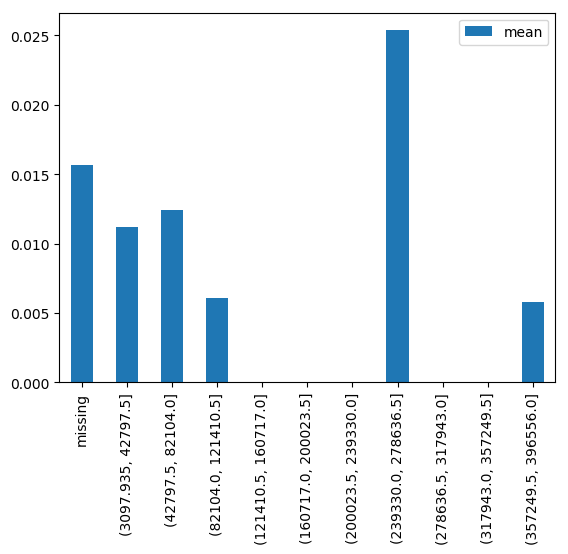

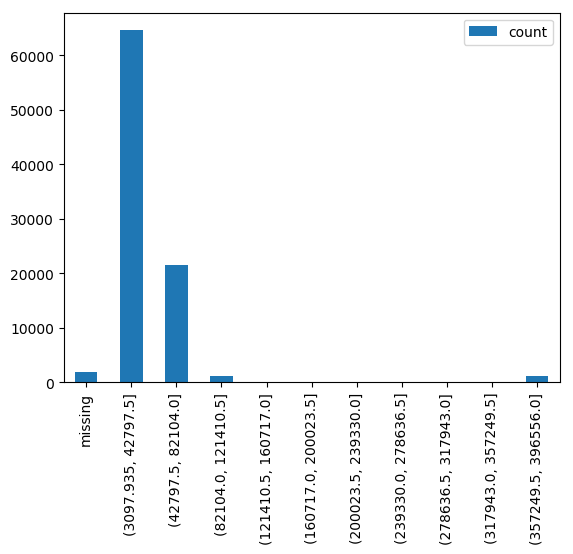

In [394]:
visualize_feature(df_train_2016, "regionidcity", "cts", 10 )

In [395]:
df_train_2016["regionidcity"].fillna(12447,inplace = True)

**37) 'fullbathcnt'**      

Number of full bathrooms (sink, shower + bathtub, and toilet) present in home  

number of non-missing value : 89093 out of  90275
ratio of missing value :0.013093

the most frequent value is 2 which occurs 44635. The second frequent value is 3 which has frequency of 21035. Mean is 2.2412. So fill missing values with 2. 

In [396]:
df_train_2016["fullbathcnt"].describe() 

count    89093.000000
mean         2.241231
std          0.963142
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: fullbathcnt, dtype: float64

In [397]:
df_train_2016["fullbathcnt"].unique()

array([ 2.,  3.,  4.,  1.,  5.,  8., nan,  9.,  7.,  6., 10., 12., 11.,
       20., 15.])

             mean
missing  0.009554
1.0      0.007092
2.0      0.009410
3.0      0.015119
4.0      0.020770
5.0      0.035621
6.0      0.021885
7.0      0.045909
8.0      0.051512
9.0     -0.016806
10.0     0.075454
11.0     0.066200
12.0    -0.457867
15.0    -0.371100
20.0    -0.032500
           count
missing   1182.0
1.0      16671.0
2.0      44635.0
3.0      21035.0
4.0       4541.0
5.0       1392.0
6.0        490.0
7.0        163.0
8.0        112.0
9.0         33.0
10.0        13.0
11.0         3.0
12.0         3.0
15.0         1.0
20.0         1.0
                 mean  count     max     min
fullbathcnt                                 
1.0          0.007092  16671  3.4430 -4.6050
2.0          0.009410  44635  3.9680 -4.6050
3.0          0.015119  21035  4.7370 -2.9760
4.0          0.020770   4541  3.2890 -2.3330
5.0          0.035621   1392  2.7620 -0.8164
6.0          0.021885    490  2.4500 -0.7550
7.0          0.045909    163  1.4230 -0.8440
8.0          0.051512    112  1.547

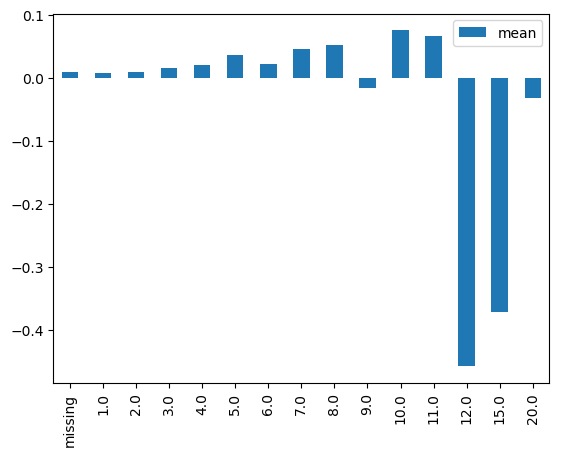

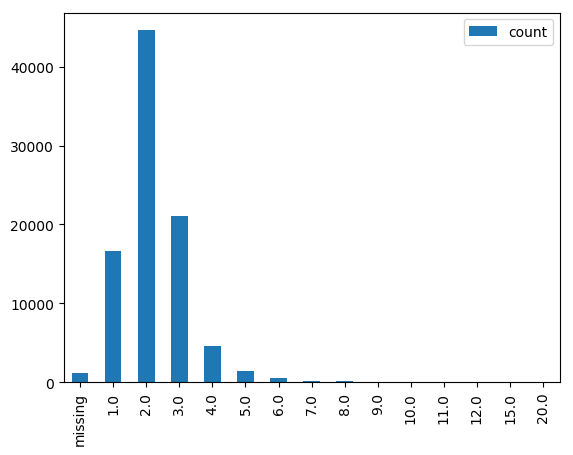

In [398]:
visualize_feature(df_train_2016, "fullbathcnt")

In [399]:
dict_column['Fill_0'].append("fullbathcnt")

**38) 'calculatedbathnbr'**      

Number of bathrooms in home including fractional bathroom  

number of non-missing value : 89093 out of 90275 
ratio of missing value :0.013093

the numbe of non-missing values are the same as the previous column "fullbathcnt". They both relate to btahroom.  so fill missing value with 2 like the previous column.

In [400]:
df_train_2016["calculatedbathnbr"].describe() 

count    89093.000000
mean         2.309216
std          0.976172
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: calculatedbathnbr, dtype: float64

             mean
missing  0.009554
1.0      0.007416
1.5      0.004112
2.0      0.009210
2.5      0.010128
3.0      0.014578
3.5      0.026498
4.0      0.018039
4.5      0.031845
5.0      0.037290
5.5      0.032696
6.0      0.018695
6.5      0.030885
7.0      0.047605
7.5      0.029100
8.0      0.050892
8.5     -0.020200
9.0      0.009989
10.0     0.068914
11.0     0.066200
12.0    -0.457867
15.0    -0.371100
20.0    -0.032500
           count
missing   1182.0
1.0      15035.0
1.5       1636.0
2.0      36534.0
2.5       8084.0
3.0      19946.0
3.5       1088.0
4.0       3743.0
4.5        793.0
5.0       1142.0
5.5        253.0
6.0        448.0
6.5         54.0
7.0        155.0
7.5          9.0
8.0        114.0
8.5          1.0
9.0         36.0
10.0        14.0
11.0         3.0
12.0         3.0
15.0         1.0
20.0         1.0
                       mean  count     max     min
calculatedbathnbr                                 
1.0                0.007416  15035  3.4430 -4.6050
1.5    

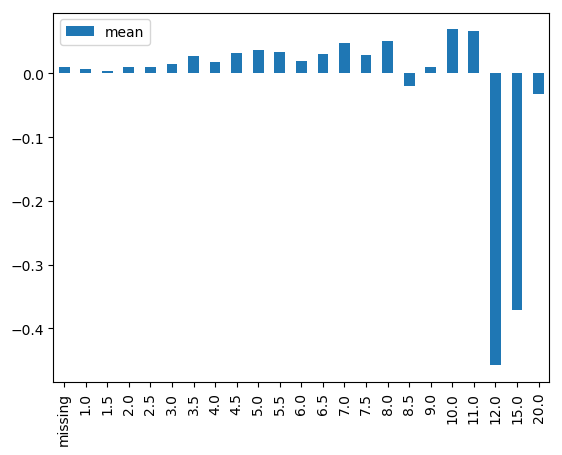

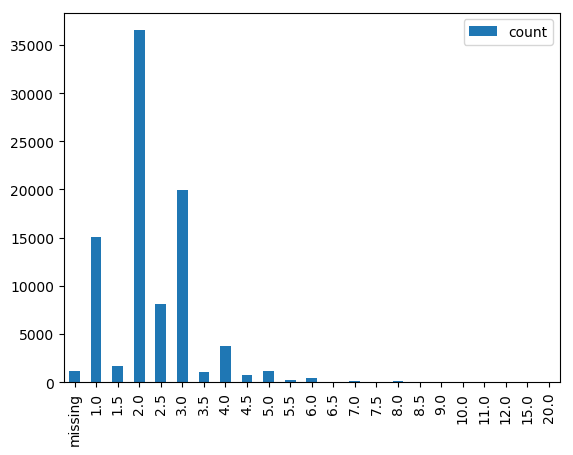

In [401]:
visualize_feature(df_train_2016, "calculatedbathnbr" )

In [402]:
df_train_2016["calculatedbathnbr"].fillna(2,inplace= True)

**39) 'yearbuilt'**      

The Year the principal residence was built   

number of missing value : 89519  
ratio of missing value :0.008374

50% of the data ranges from 1953 to 1987. so fill missing value with mean. 

In [403]:
df_train_2016["yearbuilt"].describe() 

count    89519.000000
mean      1968.532870
std         23.763475
min       1885.000000
25%       1953.000000
50%       1970.000000
75%       1987.000000
max       2015.000000
Name: yearbuilt, dtype: float64

In [404]:
dict_column['Fill_mean'].append("yearbuilt")

                       mean
missing            0.007209
(1884.87, 1891.5]  0.038724
(1891.5, 1898.0]   0.005811
(1898.0, 1904.5]   0.000552
(1904.5, 1911.0]  -0.000110
(1911.0, 1917.5]   0.019859
(1917.5, 1924.0]   0.000852
(1924.0, 1930.5]   0.007469
(1930.5, 1937.0]   0.014287
(1937.0, 1943.5]   0.003149
(1943.5, 1950.0]   0.006590
(1950.0, 1956.5]   0.009388
(1956.5, 1963.0]   0.016298
(1963.0, 1969.5]   0.014050
(1969.5, 1976.0]   0.009140
(1976.0, 1982.5]   0.014650
(1982.5, 1989.0]   0.011232
(1989.0, 1995.5]   0.013457
(1995.5, 2002.0]   0.014984
(2002.0, 2008.5]   0.019738
(2008.5, 2015.0]   0.006054
                     count
missing              756.0
(1884.87, 1891.5]     29.0
(1891.5, 1898.0]      45.0
(1898.0, 1904.5]     147.0
(1904.5, 1911.0]     741.0
(1911.0, 1917.5]     696.0
(1917.5, 1924.0]    2982.0
(1924.0, 1930.5]    3007.0
(1930.5, 1937.0]    1305.0
(1937.0, 1943.5]    3041.0
(1943.5, 1950.0]    6947.0
(1950.0, 1956.5]   10512.0
(1956.5, 1963.0]    8369.0
(1963.

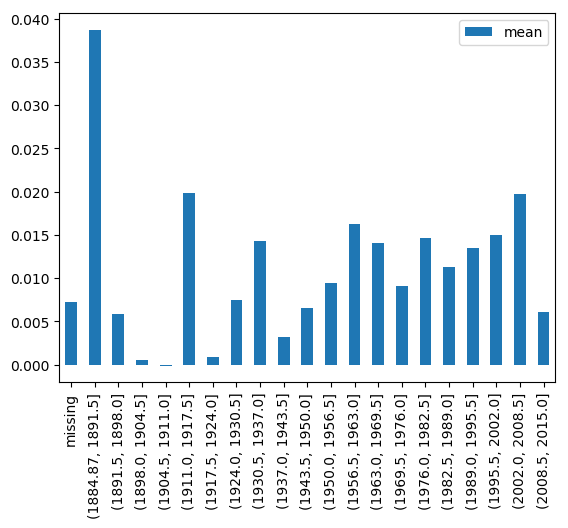

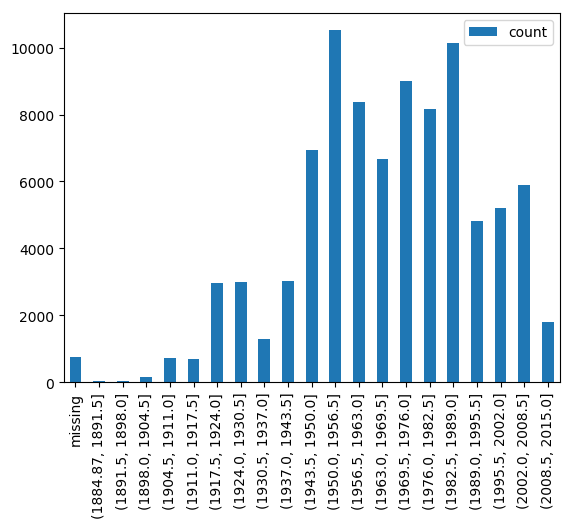

In [405]:
visualize_feature(df_train_2016, "yearbuilt",'cts',20)

**40) 'calculatedfinishedsquarefeet'**      

Calculated total finished living area of the home  

number of missing value : 89614  
ratio of missing value :0.007322

Most home has finished living area. So fill missing values with mean. 

In [406]:
df_train_2016["calculatedfinishedsquarefeet"].describe() 

count    89614.000000
mean      1773.185987
std        928.162393
min          2.000000
25%       1184.000000
50%       1540.000000
75%       2095.000000
max      22741.000000
Name: calculatedfinishedsquarefeet, dtype: float64

In [407]:
df_train_2016[df_train_2016["calculatedfinishedsquarefeet"]<= 10].calculatedfinishedsquarefeet

19326    2.0
Name: calculatedfinishedsquarefeet, dtype: float64

                           mean
missing               -0.002166
(-20.739, 2844.375]    0.009830
(2844.375, 5686.75]    0.023893
(5686.75, 8529.125]    0.069512
(8529.125, 11371.5]    0.040561
(11371.5, 14213.875]   0.100609
(14213.875, 17056.25]  0.155140
(17056.25, 19898.625]  0.051600
(19898.625, 22741.0]  -0.195150
                         count
missing                  661.0
(-20.739, 2844.375]    80329.0
(2844.375, 5686.75]     8724.0
(5686.75, 8529.125]      488.0
(8529.125, 11371.5]       54.0
(11371.5, 14213.875]      11.0
(14213.875, 17056.25]      5.0
(17056.25, 19898.625]      1.0
(19898.625, 22741.0]       2.0
                                  mean  count     max     min
calculatedfinishedsquarefeet                                 
(-20.739, 2844.375]           0.009830  80329  4.7370 -4.6050
(2844.375, 5686.75]           0.023893   8724  4.5200 -2.6880
(5686.75, 8529.125]           0.069512    488  3.2890 -1.2040
(8529.125, 11371.5]           0.040561     54  0.8809 -0.478

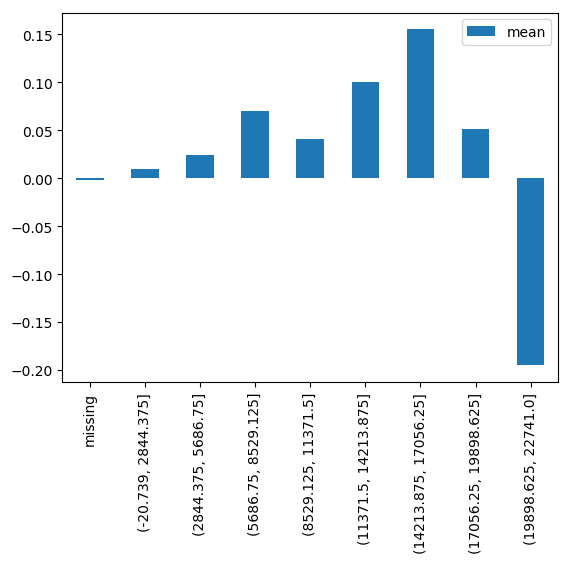

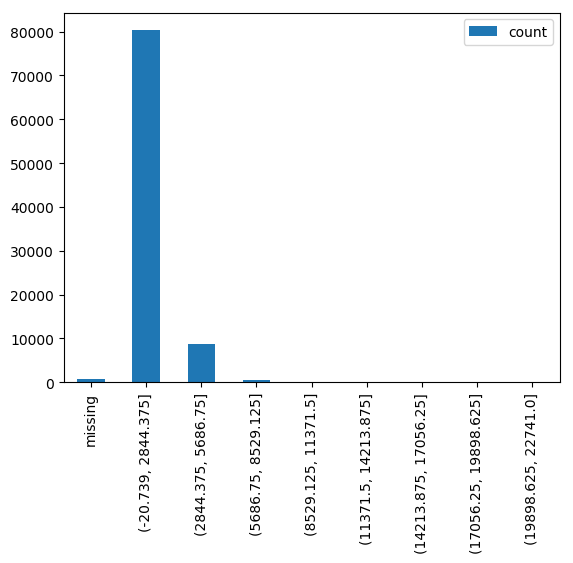

In [408]:
visualize_feature(df_train_2016, "calculatedfinishedsquarefeet", "cts", 8 )

In [409]:
dict_column['Fill_mean'].append("calculatedfinishedsquarefeet")

**41) 'censustractandblock'**      

Census tract and block ID combined - also contains blockgroup assignment by extension  

number of non-missing value : 89670 out of 90275  
ratio of missing value :0.006702

Fill missing value with the most frequent value.

In [410]:
df_train_2016["censustractandblock"].describe() 

count    8.967000e+04
mean     6.049151e+13
std      2.046605e+11
min      6.037101e+13
25%      6.037320e+13
50%      6.037615e+13
75%      6.059042e+13
max      6.111009e+13
Name: censustractandblock, dtype: float64

                                            mean
missing                                -0.021799
(60370272021100.984, 60444919091002.9]  0.011477
(60444919091002.9, 60518827081004.8]         NaN
(60518827081004.8, 60592735071006.7]    0.010306
(60592735071006.7, 60666643061008.6]         NaN
(60666643061008.6, 60740551051010.49]  -0.011517
(60740551051010.49, 60814459041012.4]        NaN
(60814459041012.4, 60888367031014.3]         NaN
(60888367031014.3, 60962275021016.2]         NaN
(60962275021016.2, 61036183011018.1]         NaN
(61036183011018.1, 61110091001020.0]    0.018093
                                          count
missing                                   605.0
(60370272021100.984, 60444919091002.9]  58208.0
(60444919091002.9, 60518827081004.8]        0.0
(60518827081004.8, 60592735071006.7]    24348.0
(60592735071006.7, 60666643061008.6]        0.0
(60666643061008.6, 60740551051010.49]       6.0
(60740551051010.49, 60814459041012.4]       0.0
(60814459041012.4, 608883670

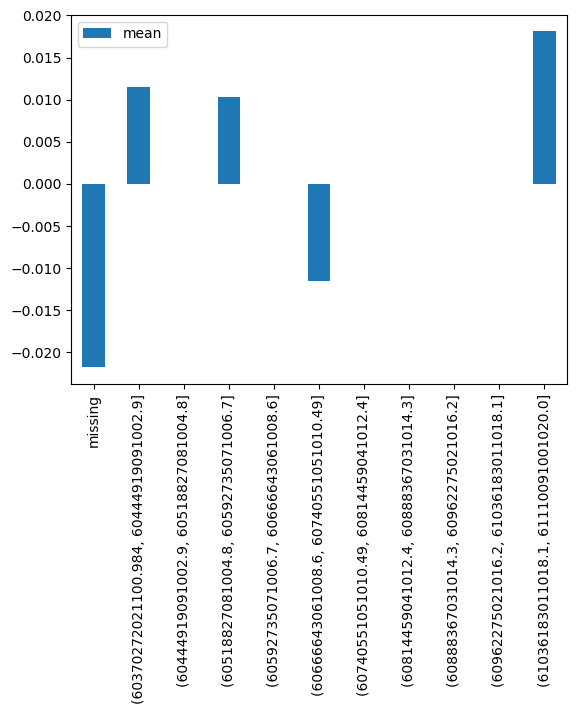

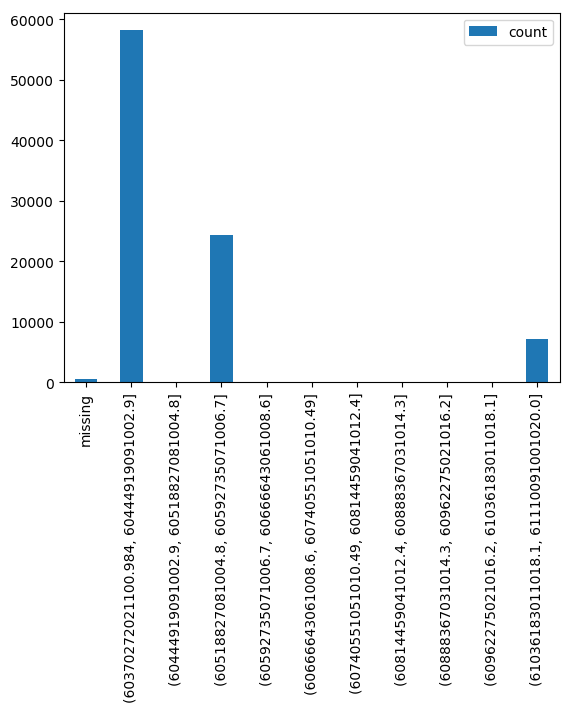

In [411]:
visualize_feature(df_train_2016, "censustractandblock", "cts", 10 )

In [412]:
df_train_2016["censustractandblock"].fillna(df_train_2016["censustractandblock"].max(),inplace = True)

**42) 'structuretaxvaluedollarcnt'**     

The assessed value of the built structure on the parcel  

number of non-missing value : 89895  
ratio of missing value :0.004209

It is the assessed value.So, fill missing values with mean. 

the number of cells less than 994900 is 89070, 98.6%.  

In [413]:
df_train_2016["structuretaxvaluedollarcnt"].describe() 

count    8.989500e+04
mean     1.800934e+05
std      2.091299e+05
min      1.000000e+02
25%      8.124500e+04
50%      1.320000e+05
75%      2.105345e+05
max      9.948100e+06
Name: structuretaxvaluedollarcnt, dtype: float64

                          mean
missing                    NaN
(-894.759, 99575.9]   0.012868
(99575.9, 199051.8]   0.008112
(199051.8, 298527.7]  0.010678
(298527.7, 398003.6]  0.015648
(398003.6, 497479.5]  0.017215
(497479.5, 596955.4]  0.019016
(596955.4, 696431.3]  0.033605
(696431.3, 795907.2]  0.018349
(795907.2, 895383.1]  0.031567
(895383.1, 994859.0]  0.022413
                        count
missing                   0.0
(-894.759, 99575.9]   30901.0
(99575.9, 199051.8]   34115.0
(199051.8, 298527.7]  13429.0
(298527.7, 398003.6]   5267.0
(398003.6, 497479.5]   2344.0
(497479.5, 596955.4]   1195.0
(596955.4, 696431.3]    763.0
(696431.3, 795907.2]    505.0
(795907.2, 895383.1]    304.0
(895383.1, 994859.0]    247.0
                                mean  count    max     min
structuretaxvaluedollarcnt                                
(-894.759, 99575.9]         0.012868  30901  3.443 -4.6050
(99575.9, 199051.8]         0.008112  34115  2.987 -4.5100
(199051.8, 298527.7]        0.01

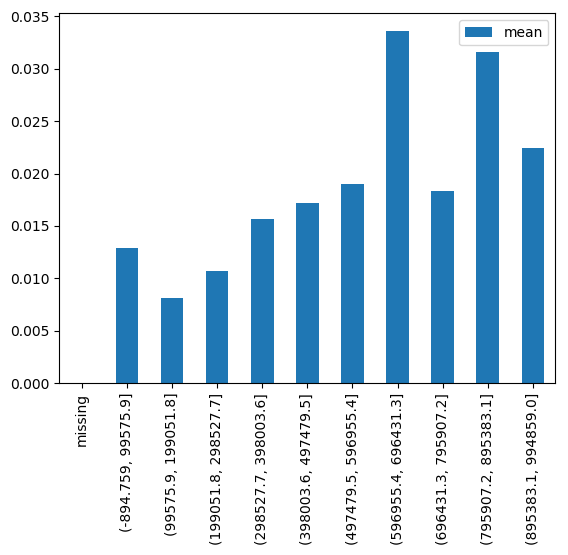

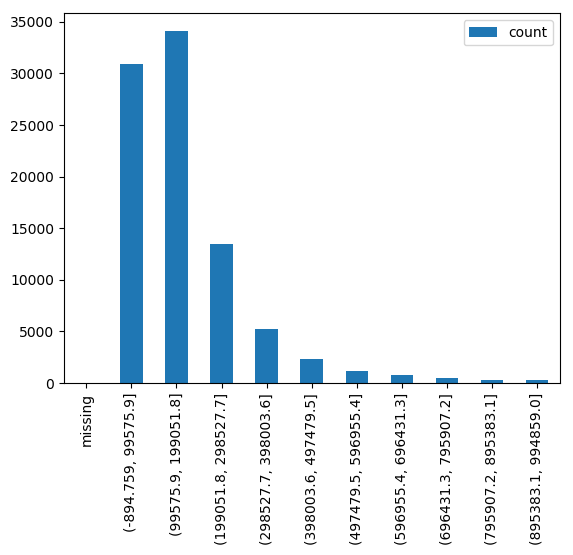

In [414]:
visualize_feature(df_train_2016[df_train_2016["structuretaxvaluedollarcnt"]<994900], "structuretaxvaluedollarcnt", "cts",10  )

In [415]:
dict_column['Fill_mean'].append("structuretaxvaluedollarcnt")

**43) 'regionidzip'**      

Zip code in which the property is located  

number of non-missing value : 90240 out of 90275 
ratio of missing value :0.000388

Every property has zip code. missing values are 35. Therefore, fill missing values with the most frequent value. 

In [416]:
df_train_2016["regionidzip"].describe() 

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

In [417]:
df_train_2016["regionidzip"].value_counts()



97319.0     912
96987.0     902
96974.0     824
97329.0     760
97318.0     726
97118.0     719
97328.0     704
96993.0     687
96996.0     640
96962.0     624
96193.0     593
96995.0     570
96368.0     560
97116.0     546
96385.0     521
96964.0     516
96998.0     513
96505.0     512
96954.0     511
96989.0     504
96373.0     500
97091.0     498
96186.0     494
96377.0     493
96364.0     476
96389.0     474
97078.0     474
97083.0     464
96351.0     456
96236.0     449
           ... 
96038.0      37
96986.0      35
96135.0      35
96323.0      33
96980.0      33
96207.0      32
97037.0      32
96119.0      30
96434.0      30
96021.0      29
96973.0      27
96951.0      26
97316.0      26
95998.0      21
97331.0      20
95991.0      18
97119.0      17
97324.0      16
399675.0     13
95995.0      12
96148.0      11
97108.0       6
96329.0       5
96002.0       4
96039.0       3
96500.0       2
96034.0       1
97111.0       1
96467.0       1
96226.0       1
Name: regionidzip, Lengt

              mean
missing   0.033360
95982.0  -0.064497
95983.0   0.042029
95984.0  -0.045426
95985.0  -0.024602
95986.0   0.010054
95987.0  -0.003515
95988.0  -0.041900
95989.0   0.003222
95991.0   0.005300
95992.0  -0.015486
95993.0  -0.018873
95994.0   0.012009
95995.0   0.011925
95996.0   0.027197
95997.0   0.007630
95998.0   0.007190
95999.0  -0.003548
96000.0   0.029596
96001.0   0.006003
96002.0  -0.081200
96003.0  -0.001914
96004.0   0.035039
96005.0   0.049155
96006.0   0.012389
96007.0   0.009004
96008.0   0.017586
96009.0  -0.013957
96010.0   0.025802
96012.0   0.010001
...            ...
97089.0   0.035032
97091.0   0.023237
97094.0   0.036133
97097.0   0.018348
97098.0   0.013200
97099.0   0.017594
97101.0   0.024423
97104.0   0.006381
97106.0   0.022168
97107.0   0.022576
97108.0   0.049650
97109.0   0.012066
97111.0   0.019800
97113.0   0.046528
97116.0   0.009697
97118.0   0.023271
97119.0  -0.006894
97298.0   0.039774
97316.0   0.061696
97317.0   0.000031
97318.0   0.

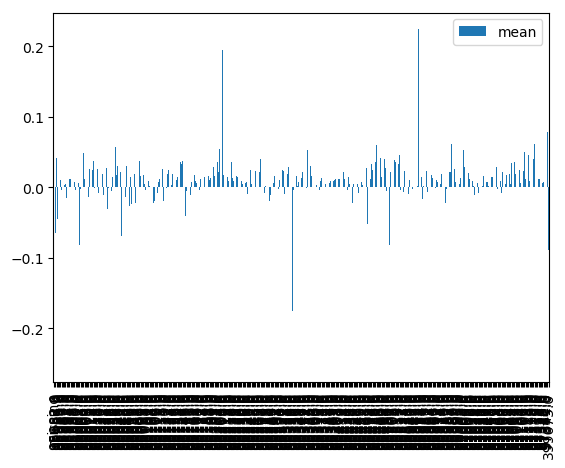

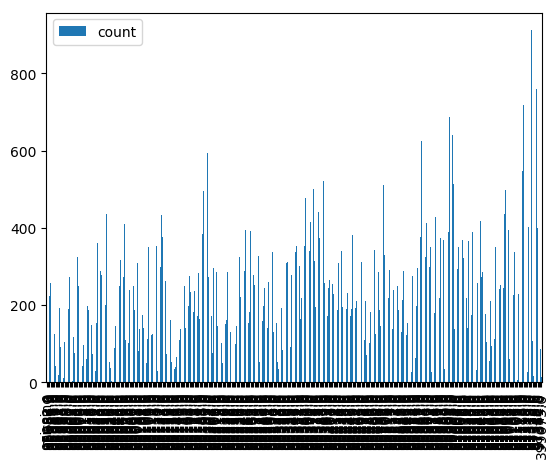

In [418]:
visualize_feature(df_train_2016, "regionidzip")

In [419]:
df_train_2016["regionidzip"].fillna(97319,inplace = True)

**44) 'taxamount'**     

The total property tax assessed for that assessment year  

number of missing value : 90269  
ratio of missing value :0.000066

Most home, 89445, 99% has the total property tax less than 32230. 

In [420]:
df_train_2016["taxamount"].describe() 

count     90269.000000
mean       5983.975927
std        6838.876956
min          49.080000
25%        2872.830000
50%        4542.750000
75%        6901.090000
max      321936.090000
Name: taxamount, dtype: float64

                              mean
missing                   0.009533
(-272.807, 32237.781]     0.011453
(32237.781, 64426.482]    0.006276
(64426.482, 96615.183]    0.053759
(96615.183, 128803.884]   0.023816
(128803.884, 160992.585]  0.024193
(160992.585, 193181.286]  0.015125
(193181.286, 225369.987]       NaN
(225369.987, 257558.688] -0.238300
(257558.688, 289747.389] -0.371100
(289747.389, 321936.09]   0.019633
                            count
missing                       6.0
(-272.807, 32237.781]     89445.0
(32237.781, 64426.482]      681.0
(64426.482, 96615.183]       94.0
(96615.183, 128803.884]      25.0
(128803.884, 160992.585]     15.0
(160992.585, 193181.286]      4.0
(193181.286, 225369.987]      0.0
(225369.987, 257558.688]      1.0
(257558.688, 289747.389]      1.0
(289747.389, 321936.09]       3.0
                              mean  count     max     min
taxamount                                                
(-272.807, 32237.781]     0.011453  89445  4.7370 -4.605

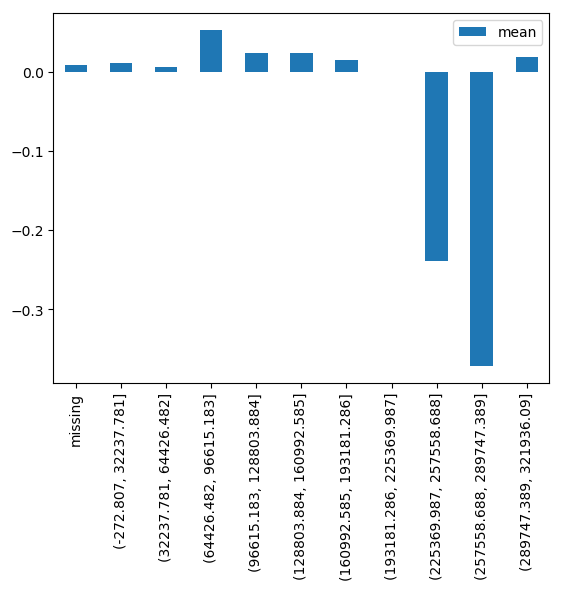

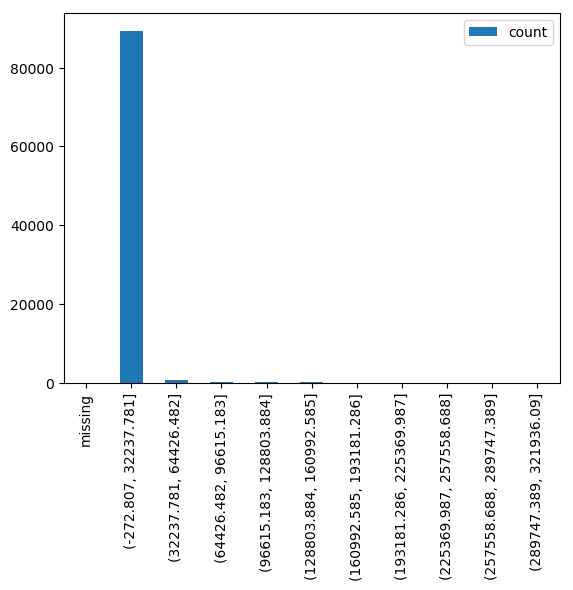

In [421]:
visualize_feature(df_train_2016, "taxamount", "cts", 10 )

                            mean
missing                      NaN
(16.907, 3266.374]      0.018196
(3266.374, 6483.668]    0.006914
(6483.668, 9700.962]    0.009307
(9700.962, 12918.256]   0.012574
(12918.256, 16135.55]   0.010990
(16135.55, 19352.844]   0.015387
(19352.844, 22570.138] -0.002318
(22570.138, 25787.432]  0.003251
(25787.432, 29004.726]  0.036884
(29004.726, 32222.02]   0.042379
                          count
missing                     0.0
(16.907, 3266.374]      27933.0
(3266.374, 6483.668]    36883.0
(6483.668, 9700.962]    14225.0
(9700.962, 12918.256]    5113.0
(12918.256, 16135.55]    2250.0
(16135.55, 19352.844]    1183.0
(19352.844, 22570.138]    808.0
(22570.138, 25787.432]    490.0
(25787.432, 29004.726]    343.0
(29004.726, 32222.02]     217.0
                            mean  count    max     min
taxamount                                             
(16.907, 3266.374]      0.018196  27933  3.160 -2.3650
(3266.374, 6483.668]    0.006914  36883  3.443 -4.6050


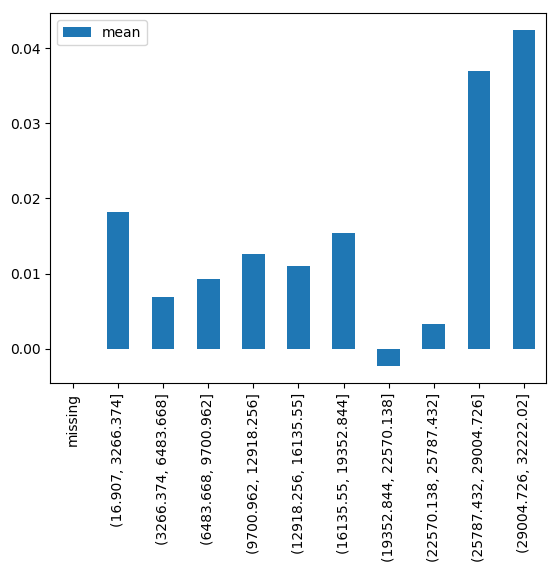

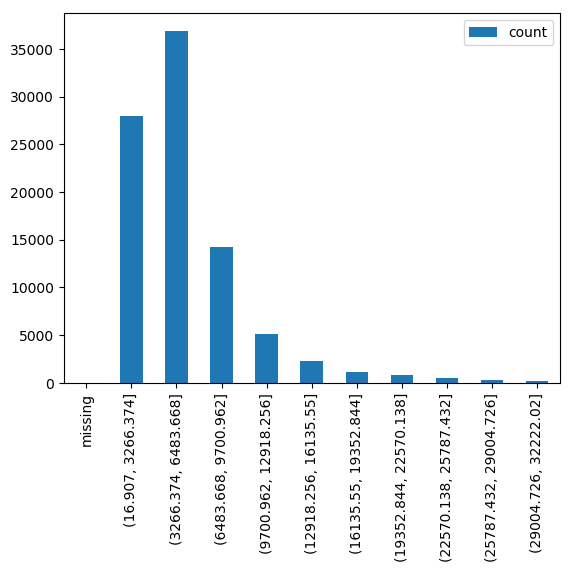

In [422]:
visualize_feature(df_train_2016[df_train_2016["taxamount"]<32230], "taxamount", "cts", 10 )

In [423]:
dict_column['Fill_mean'].append("taxamount")

**45) 'taxvaluedollarcnt'**     

The total tax assessed value of the parcel  

number of non-missing value : 90274 out of 90275 
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with mean. 

99.345% of home has the total tax assessed less than 2775019

In [424]:
df_train_2016["taxvaluedollarcnt"].describe() 

count    9.027400e+04
mean     4.576726e+05
std      5.548844e+05
min      2.200000e+01
25%      1.990232e+05
50%      3.428720e+05
75%      5.405890e+05
max      2.775000e+07
Name: taxvaluedollarcnt, dtype: float64

                              mean
missing                  -0.301100
(-27727.978, 2775019.8]   0.011338
(2775019.8, 5550017.6]    0.025250
(5550017.6, 8325015.4]    0.049502
(8325015.4, 11100013.2]  -0.003191
(11100013.2, 13875011.0]  0.026708
(13875011.0, 16650008.8]  0.171767
(16650008.8, 19425006.6]       NaN
(19425006.6, 22200004.4]       NaN
(22200004.4, 24975002.2] -0.371100
(24975002.2, 27750000.0]  0.019633
                            count
missing                       1.0
(-27727.978, 2775019.8]   89585.0
(2775019.8, 5550017.6]      562.0
(5550017.6, 8325015.4]       86.0
(8325015.4, 11100013.2]      22.0
(11100013.2, 13875011.0]     12.0
(13875011.0, 16650008.8]      3.0
(16650008.8, 19425006.6]      0.0
(19425006.6, 22200004.4]      0.0
(22200004.4, 24975002.2]      1.0
(24975002.2, 27750000.0]      3.0
                              mean  count     max     min
taxvaluedollarcnt                                        
(-27727.978, 2775019.8]   0.011338  89585  4.7370 -4.605

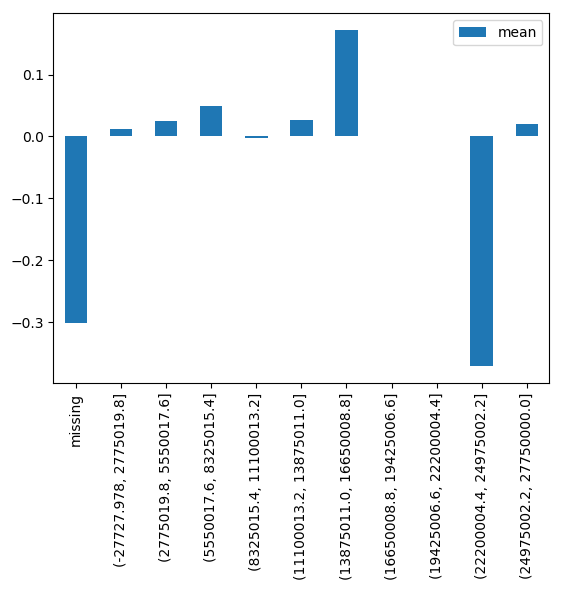

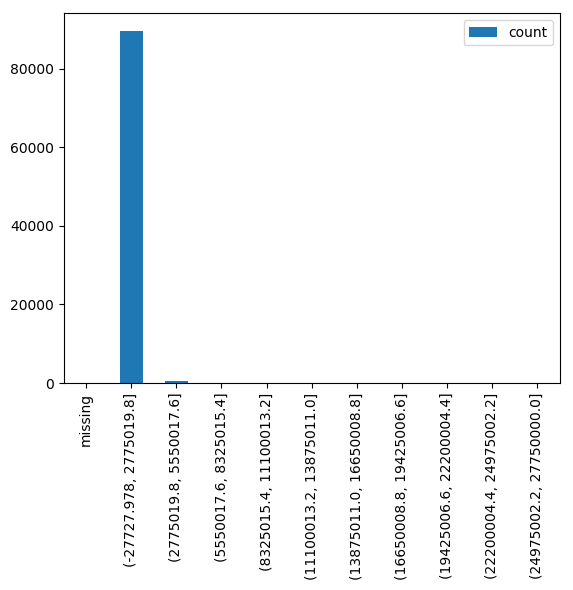

In [425]:
visualize_feature(df_train_2016, "taxvaluedollarcnt", "cts", 10 )

                            mean
missing                      NaN
(-2752.978, 277519.8]   0.013397
(277519.8, 555017.6]    0.008117
(555017.6, 832515.4]    0.011119
(832515.4, 1110013.2]   0.015843
(1110013.2, 1387511.0]  0.019296
(1387511.0, 1665008.8]  0.021615
(1665008.8, 1942506.6] -0.005658
(1942506.6, 2220004.4] -0.004951
(2220004.4, 2497502.2]  0.046062
(2497502.2, 2775000.0]  0.025856
                          count
missing                     0.0
(-2752.978, 277519.8]   35016.0
(277519.8, 555017.6]    33691.0
(555017.6, 832515.4]    12276.0
(832515.4, 1110013.2]    4159.0
(1110013.2, 1387511.0]   1878.0
(1387511.0, 1665008.8]   1038.0
(1665008.8, 1942506.6]    639.0
(1942506.6, 2220004.4]    416.0
(2220004.4, 2497502.2]    273.0
(2497502.2, 2775000.0]    199.0
                            mean  count    max     min
taxvaluedollarcnt                                     
(-2752.978, 277519.8]   0.013397  35016  3.160 -2.3650
(277519.8, 555017.6]    0.008117  33691  3.443 -4.6050


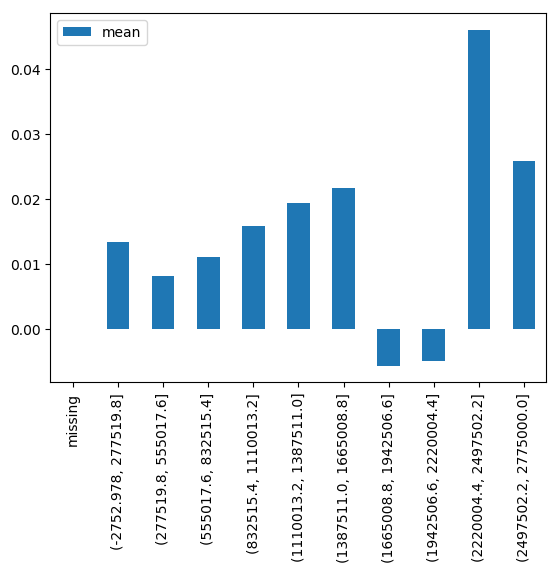

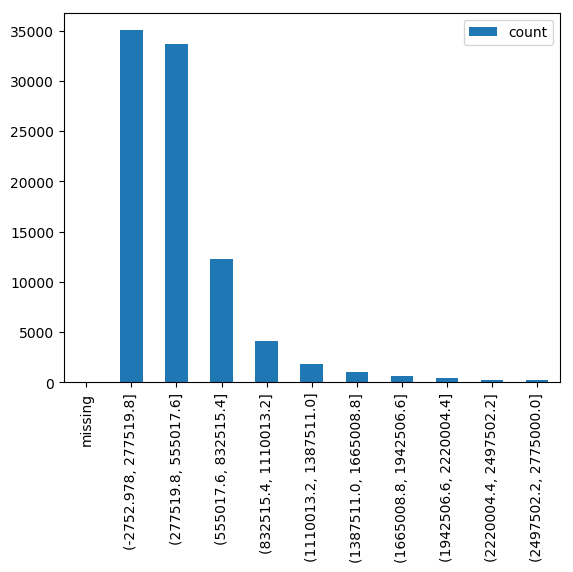

In [426]:
visualize_feature(df_train_2016[df_train_2016["taxvaluedollarcnt"]<2775019], "taxvaluedollarcnt", "cts", 10 )

In [427]:

dict_column['Fill_mean'].append("taxvaluedollarcnt")

**46) 'landtaxvaluedollarcnt'**     

The assessed value of the land area of the parcel  

number of non-missing value : 90274  
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with mean. 

Most home, 89896, 99.58%, has the assessed balue of the land area less than 2450019

In [428]:
df_train_2016["landtaxvaluedollarcnt"].describe() 

count    9.027400e+04
mean     2.783353e+05
std      4.004955e+05
min      2.200000e+01
25%      8.222800e+04
50%      1.929700e+05
75%      3.454195e+05
max      2.450000e+07
Name: landtaxvaluedollarcnt, dtype: float64

                              mean
missing                  -0.301100
(-24477.978, 2450019.8]   0.011454
(2450019.8, 4900017.6]    0.003145
(4900017.6, 7350015.4]    0.067857
(7350015.4, 9800013.2]    0.072143
(9800013.2, 12250011.0]  -0.001133
(12250011.0, 14700008.8]  0.065400
(14700008.8, 17150006.6] -0.371100
(17150006.6, 19600004.4] -0.022300
(19600004.4, 22050002.2]       NaN
(22050002.2, 24500000.0]  0.103500
                            count
missing                       1.0
(-24477.978, 2450019.8]   89896.0
(2450019.8, 4900017.6]      306.0
(4900017.6, 7350015.4]       46.0
(7350015.4, 9800013.2]       14.0
(9800013.2, 12250011.0]       6.0
(12250011.0, 14700008.8]      2.0
(14700008.8, 17150006.6]      1.0
(17150006.6, 19600004.4]      2.0
(19600004.4, 22050002.2]      0.0
(22050002.2, 24500000.0]      1.0
                              mean  count     max     min
landtaxvaluedollarcnt                                    
(-24477.978, 2450019.8]   0.011454  89896  4.7370 -4.605

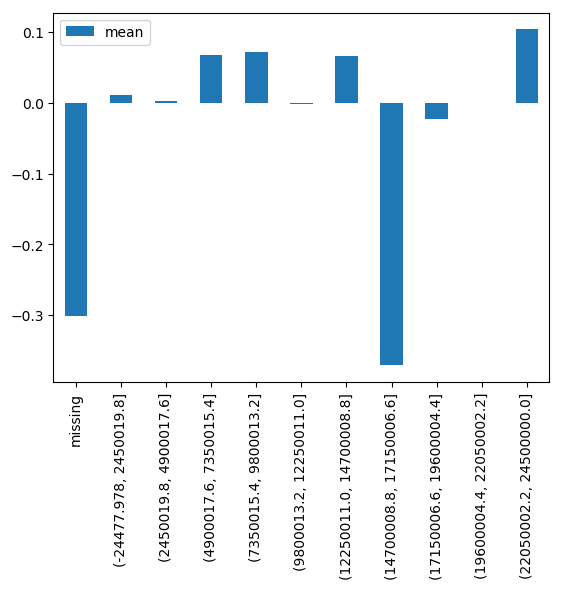

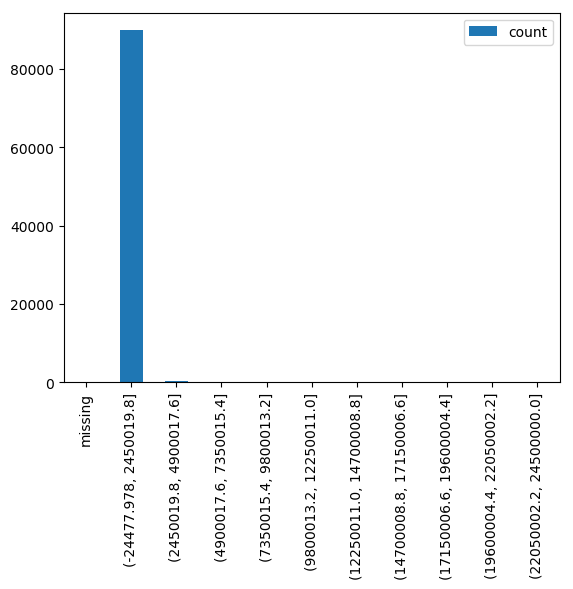

In [429]:
visualize_feature(df_train_2016, "landtaxvaluedollarcnt", "cts", 10 )

In [430]:
dict_column['Fill_mean'].append("landtaxvaluedollarcnt")

**47) 'propertycountylandusecode'**      

County land use code i.e. it's zoning at the county level  

number of missing value : 90274  
ratio of missing value :0.000011

The column has 1 missing value. so fill missing value with the most frequent value. 

In [431]:
df_train_2016["propertycountylandusecode"].describe() 

count     90274
unique       77
top        0100
freq      30846
Name: propertycountylandusecode, dtype: object

             mean
missing -0.005000
0        0.113300
010      0.025700
0100     0.012205
0101     0.005372
0102     0.085167
0103     0.018330
0104     0.010697
0108     0.011802
0109     0.296270
010C     0.011473
010D     0.012941
010E     0.015078
010F     0.041118
010G    -0.047361
010H     0.045622
010M     0.062476
010V    -0.020767
0110     0.030375
0111     0.065800
0114    -0.006000
012C     0.001474
012D     0.035075
012E     0.054743
0130     0.018800
0131    -0.023300
01DC     0.009622
01DD    -1.374000
01HC     0.034455
0200     0.012367
...           ...
1014    -0.030816
105     -0.001150
1110     0.027631
1111     0.014445
1112     0.029480
1116     0.166200
1117     0.050300
1128     0.013998
1129     0.018452
1200     1.301000
1210     0.001489
122      0.012161
1222    -0.036264
1310    -0.108725
1321     0.079886
1333     0.290400
135     -0.034040
1410     0.019877
1420     0.133700
1421     0.030050
1432    -0.095150
1720     0.241371
1722    -2.688000
200     -0

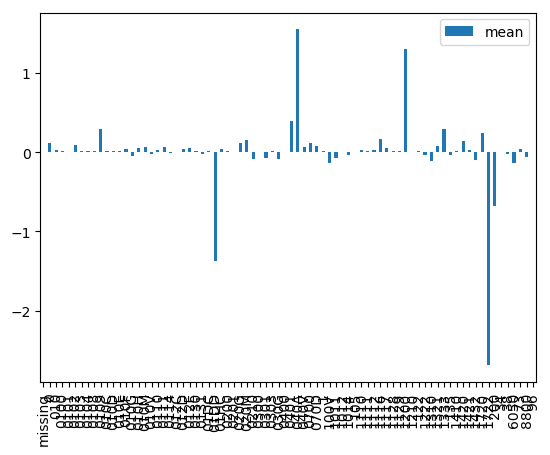

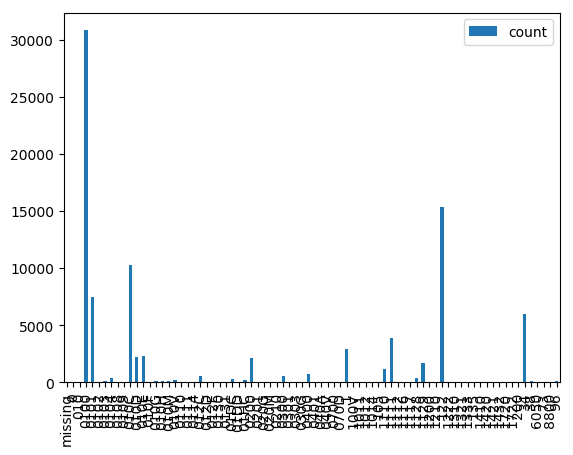

In [432]:
visualize_feature(df_train_2016, "propertycountylandusecode" )

In [433]:
df_train_2016["propertycountylandusecode"].fillna( '0100',inplace = True)

**There are additional 14 columns which do not have missing value. **

In [434]:
df_train_2016.dropna(axis=1).columns

Index(['parcelid', 'logerror', 'transactiondate', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'fips', 'hashottuborspa', 'latitude', 'longitude',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'fireplaceflag',
       'assessmentyear', 'taxdelinquencyflag', 'censustractandblock'],
      dtype='object')

**48) 'bedroomcnt'**      

Number of bedrooms in home 

- most of property,39%, has 3 bedrooms. 
- 86% of property has 2~4 bedrooms. 
- It looks like property with many bedrooms have large mean of logerror. However, it is not true because mean out of fewer size of values tends to have larger mean.   


In [435]:
df_train_2016["bedroomcnt" ].describe()

count    90275.000000
mean         3.031869
std          1.156436
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         16.000000
Name: bedroomcnt, dtype: float64

             mean
missing       NaN
0.0      0.010944
1.0      0.011159
2.0      0.005349
3.0      0.010568
4.0      0.015527
5.0      0.024326
6.0      0.021985
7.0      0.052069
8.0      0.018215
9.0      0.021235
10.0    -0.030040
11.0    -0.025492
12.0     0.024905
13.0    -0.046000
14.0    -0.138400
15.0    -0.169600
16.0     0.102375
           count
missing      0.0
0.0       1421.0
1.0       3897.0
2.0      22357.0
3.0      35447.0
4.0      20279.0
5.0       5077.0
6.0       1120.0
7.0        234.0
8.0        274.0
9.0         91.0
10.0        35.0
11.0        12.0
12.0        22.0
13.0         1.0
14.0         3.0
15.0         1.0
16.0         4.0
                mean  count     max     min
bedroomcnt                                 
0.0         0.010944   1421  2.5600 -2.6880
1.0         0.011159   3897  2.9530 -1.2980
2.0         0.005349  22357  4.7370 -3.1940
3.0         0.010568  35447  3.4430 -4.6050
4.0         0.015527  20279  4.5200 -2.3540
5.0         0.024326   5077

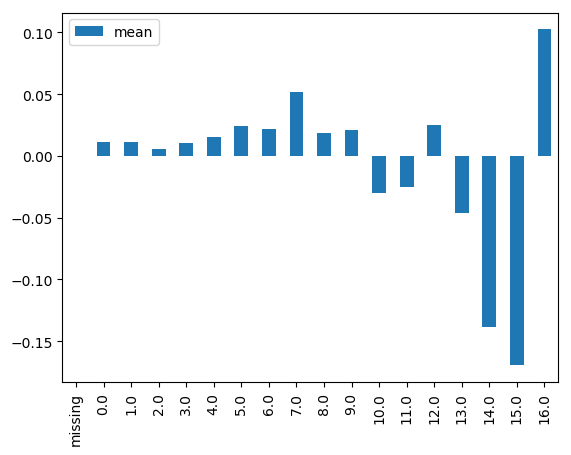

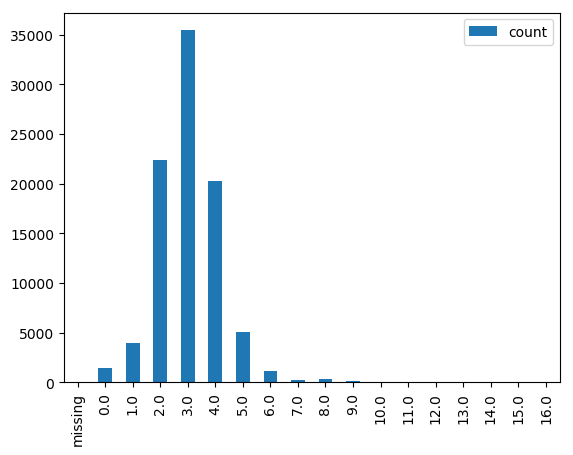

In [436]:
visualize_feature(df_train_2016, "bedroomcnt" )

**49) 'bathroomcnt'**      

Number of bathrooms in home including fractional bathrooms

- Mean of the number of bathroom is 2.27 and 96.64% of home has less than 4 bathrooms. 

In [437]:
df_train_2016["bathroomcnt"].describe() 

count    90275.000000
mean         2.279474
std          1.004271
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: bathroomcnt, dtype: float64

                  mean
missing            NaN
(-0.02, 2.0]  0.008580
(2.0, 4.0]    0.014254
(4.0, 6.0]    0.031986
(6.0, 8.0]    0.045512
(8.0, 10.0]   0.025573
(10.0, 12.0] -0.195833
(12.0, 14.0]       NaN
(14.0, 16.0] -0.371100
(16.0, 18.0]       NaN
(18.0, 20.0] -0.032500
                count
missing           0.0
(-0.02, 2.0]  54375.0
(2.0, 4.0]    32871.0
(4.0, 6.0]     2638.0
(6.0, 8.0]      332.0
(8.0, 10.0]      51.0
(10.0, 12.0]      6.0
(12.0, 14.0]      0.0
(14.0, 16.0]      1.0
(16.0, 18.0]      0.0
(18.0, 20.0]      1.0
                  mean  count     max     min
bathroomcnt                                  
(-0.02, 2.0]  0.008580  54375  3.9680 -4.6050
(2.0, 4.0]    0.014254  32871  4.7370 -4.6050
(4.0, 6.0]    0.031986   2638  3.2890 -0.8164
(6.0, 8.0]    0.045512    332  1.5470 -0.8604
(8.0, 10.0]   0.025573     51  0.4898 -0.4780
(10.0, 12.0] -0.195833      6  0.2593 -1.2040
(12.0, 14.0]       NaN      0     NaN     NaN
(14.0, 16.0] -0.371100      1 -0.3711 -0.3711


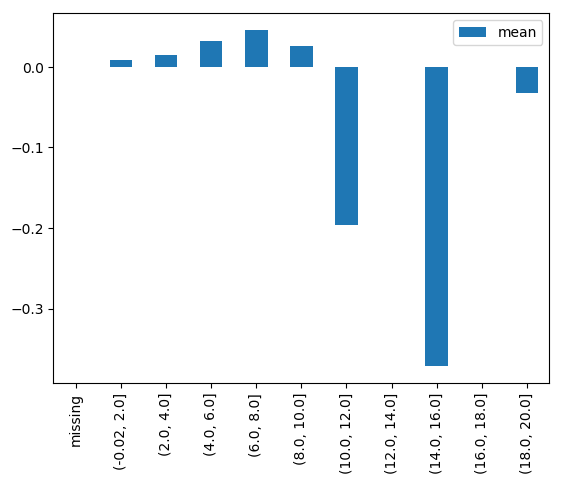

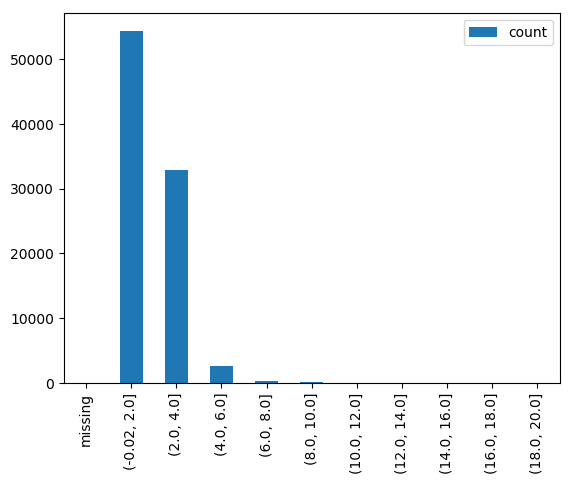

In [438]:
visualize_feature(df_train_2016, "bathroomcnt", "cts", 10 )

**50) 'parcelid'**    Unique identifier for parcels (lots) 

Every home has its unique identifier. 

In [439]:
df_train_2016["parcelid"].describe() 

count    9.027500e+04
mean     1.298466e+07
std      2.504510e+06
min      1.071174e+07
25%      1.155950e+07
50%      1.254734e+07
75%      1.422755e+07
max      1.629608e+08
Name: parcelid, dtype: float64

**51) 'propertylandusetypeid'**      

Type of land use the property is zoned for

- 261, is the most frequent value which is 67.17%, 266 is the second most frequent value which is 25.27%. 

In [440]:
df_train_2016["propertylandusetypeid"].describe() 

count    90275.000000
mean       261.832179
std          5.182901
min         31.000000
25%        261.000000
50%        261.000000
75%        266.000000
max        275.000000
Name: propertylandusetypeid, dtype: float64

             mean
missing       NaN
31.0    -0.034371
47.0     1.301000
246.0    0.009442
247.0   -0.004608
248.0    0.005385
260.0    0.004606
261.0    0.012080
263.0    0.104256
264.0    0.047591
265.0    0.013998
266.0    0.010381
267.0    0.041118
269.0    0.009400
275.0    0.050300
           count
missing      0.0
31.0        17.0
47.0         1.0
246.0     2376.0
247.0      629.0
248.0      879.0
260.0       62.0
261.0    60637.0
263.0       84.0
264.0       11.0
265.0      356.0
266.0    22815.0
267.0       28.0
269.0     2334.0
275.0       46.0
                           mean  count     max     min
propertylandusetypeid                                 
31.0                  -0.034371     17  1.0700 -2.6880
47.0                   1.301000      1  1.3010  1.3010
246.0                  0.009442   2376  2.9260 -1.6770
247.0                 -0.004608    629  1.4690 -0.9755
248.0                  0.005385    879  3.1150 -1.2040
260.0                  0.004606     62  0.6549 -0.6714


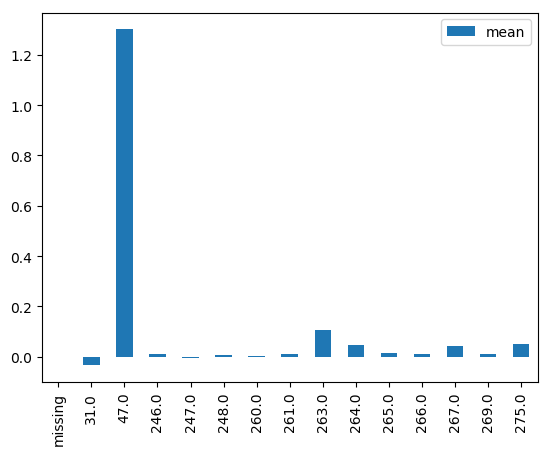

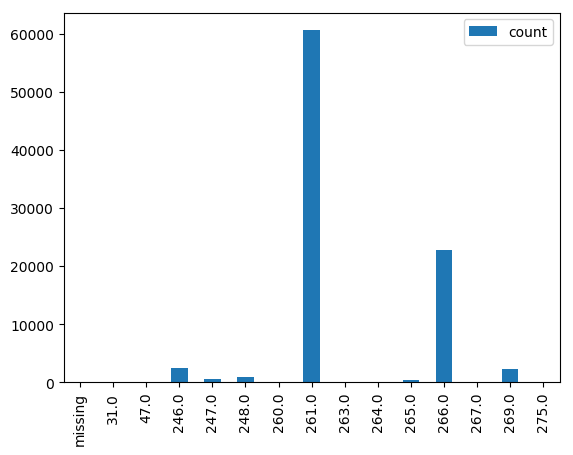

In [441]:
visualize_feature(df_train_2016, "propertylandusetypeid" )

**52) 'longitude'**      Longitude of the middle of the parcel multiplied by 10e6

In [442]:
df_train_2016["longitude"].describe() 

count    9.027500e+04
mean    -1.181989e+08
std      3.606032e+05
min     -1.194479e+08
25%     -1.184117e+08
50%     -1.181734e+08
75%     -1.179216e+08
max     -1.175549e+08
Name: longitude, dtype: float64

In [443]:
visualize_feature(df_train_2016, "longitude")

                mean
missing          NaN
-119447865.0  0.0090
-119447353.0  0.0257
-119447010.0  1.8720
-119446994.0 -0.0121
-119446093.0  0.1604
-119445901.0  0.0816
-119414285.0  0.2287
-119387480.0  0.1630
-119382958.0  0.0305
-119382197.0 -0.0910
-119381076.0 -0.0408
-119370475.0 -0.2345
-119362718.0 -0.0899
-119355215.0  0.0010
-119315009.0  0.0000
-119313790.0  0.0129
-119311000.0  0.0198
-119310527.0  0.0488
-119310294.0  0.0971
-119309813.0  0.6371
-119309726.0  0.0862
-119309298.0  0.0620
-119308461.0  0.0917
-119308392.0  0.1062
-119308245.0  0.2624
-119307974.0  0.0440
-119307160.0  0.1714
-119306117.0  0.0592
-119305943.0  0.0431
...              ...
-117563558.0  0.0247
-117563245.0 -0.1132
-117563183.0  0.0000
-117563151.0 -0.0141
-117562891.0 -0.0161
-117562748.0  0.0658
-117562736.0  0.0247
-117562677.0  0.0040
-117562238.0 -0.1708
-117561822.0  0.0030
-117561782.0  0.0040
-117561750.0  0.0469
-117561336.0  0.1124
-117561144.0 -0.0070
-117561112.0 -0.0050
-117561084.0 

KeyboardInterrupt: 

**53) 'latitude'**      

Latitude of the middle of the parcel multiplied by 10e6

In [444]:
df_train_2016["latitude"].describe() 

count    9.027500e+04
mean     3.400541e+07
std      2.649654e+05
min      3.333930e+07
25%      3.381154e+07
50%      3.402150e+07
75%      3.417274e+07
max      3.481601e+07
Name: latitude, dtype: float64

                                mean
missing                          NaN
(33337818.286, 33486966.4]  0.013265
(33486966.4, 33634637.8]    0.008682
(33634637.8, 33782309.2]    0.013008
(33782309.2, 33929980.6]    0.008989
(33929980.6, 34077652.0]    0.009100
(34077652.0, 34225323.4]    0.013908
(34225323.4, 34372994.8]    0.016383
(34372994.8, 34520666.2]    0.010269
(34520666.2, 34668337.6]    0.010407
(34668337.6, 34816009.0]    0.007125
                              count
missing                         0.0
(33337818.286, 33486966.4]   1283.0
(33486966.4, 33634637.8]     6294.0
(33634637.8, 33782309.2]    11910.0
(33782309.2, 33929980.6]    17058.0
(33929980.6, 34077652.0]    16426.0
(34077652.0, 34225323.4]    22007.0
(34225323.4, 34372994.8]     7556.0
(34372994.8, 34520666.2]     3612.0
(34520666.2, 34668337.6]     2603.0
(34668337.6, 34816009.0]     1526.0
                                mean  count    max     min
latitude                                                  
(33337

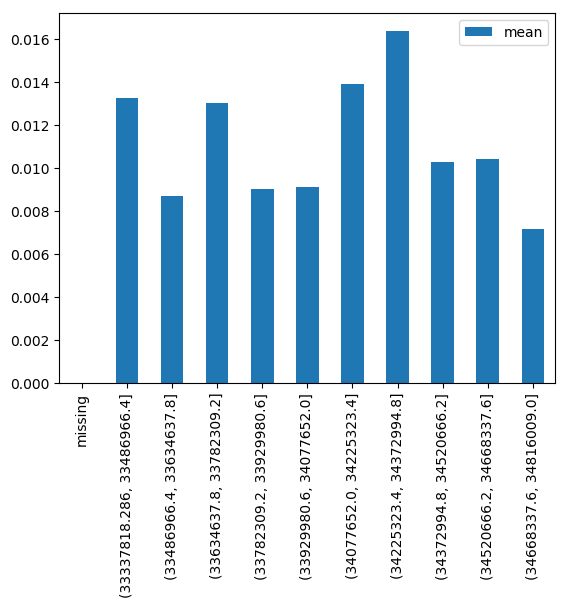

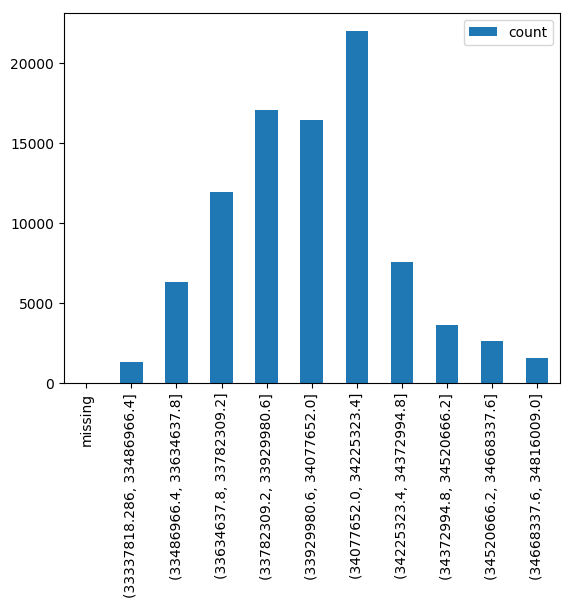

In [445]:
visualize_feature(df_train_2016, "latitude", "cts", 10 )

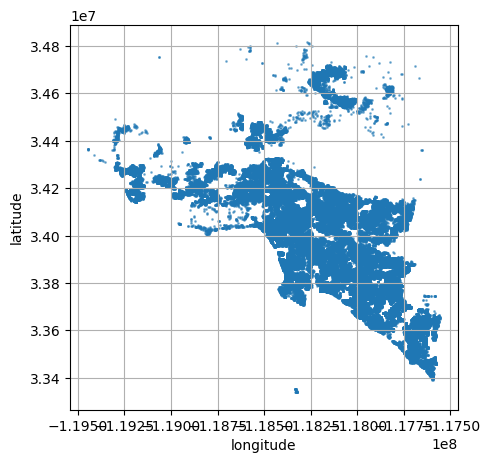

In [551]:
y= df_train_2016['latitude']
x= df_train_2016['longitude']
s=1
plt.figure(figsize=(5,5))

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.grid(True)
plt.scatter(x, y, alpha=0.5,s=s)
plt.show()

**54) 'fips'**      

Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details

In [446]:
df_train_2016["fips"].describe() 

count    90275.000000
mean      6048.870551
std         20.663461
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64

             mean
missing       NaN
6037.0   0.011191
6059.0   0.010392
6111.0   0.017255
           count
missing      0.0
6037.0   58574.0
6059.0   24505.0
6111.0    7196.0
            mean  count    max    min
fips                                 
6037.0  0.011191  58574  4.737 -4.605
6059.0  0.010392  24505  3.289 -2.976
6111.0  0.017255   7196  3.018 -4.605


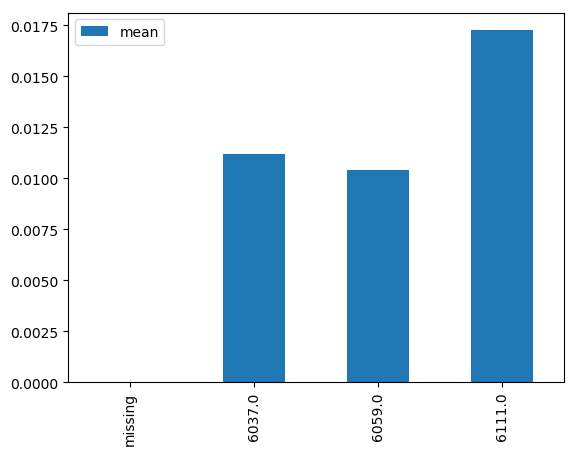

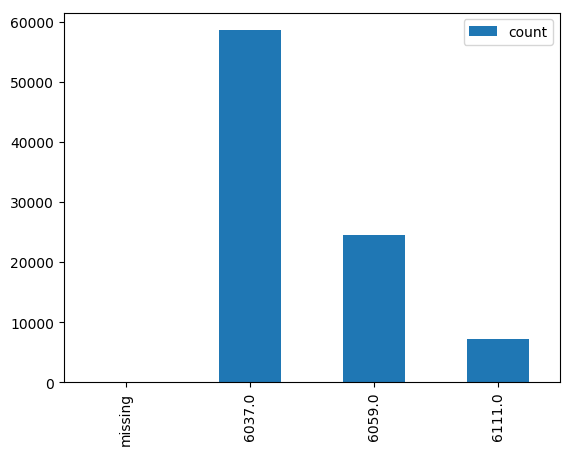

In [447]:
visualize_feature(df_train_2016, "fips" )

**55) 'rawcensustractandblock'**      

Census tract and block ID combined - also contains blockgroup assignment by extension

In [448]:
df_train_2016["rawcensustractandblock"].describe() 

count    9.027500e+04
mean     6.049179e+07
std      2.050549e+05
min      6.037101e+07
25%      6.037320e+07
50%      6.037620e+07
75%      6.059042e+07
max      6.111009e+07
Name: rawcensustractandblock, dtype: float64

                                  mean
missing                            NaN
(60370272.021, 60444919.091]  0.011191
(60444919.091, 60518827.081]       NaN
(60518827.081, 60592735.071]  0.010392
(60592735.071, 60666643.061]       NaN
(60666643.061, 60740551.051]       NaN
(60740551.051, 60814459.041]       NaN
(60814459.041, 60888367.031]       NaN
(60888367.031, 60962275.021]       NaN
(60962275.021, 61036183.011]       NaN
(61036183.011, 61110091.001]  0.017255
                                count
missing                           0.0
(60370272.021, 60444919.091]  58574.0
(60444919.091, 60518827.081]      0.0
(60518827.081, 60592735.071]  24505.0
(60592735.071, 60666643.061]      0.0
(60666643.061, 60740551.051]      0.0
(60740551.051, 60814459.041]      0.0
(60814459.041, 60888367.031]      0.0
(60888367.031, 60962275.021]      0.0
(60962275.021, 61036183.011]      0.0
(61036183.011, 61110091.001]   7196.0
                                  mean  count    max    min
rawcensustractan

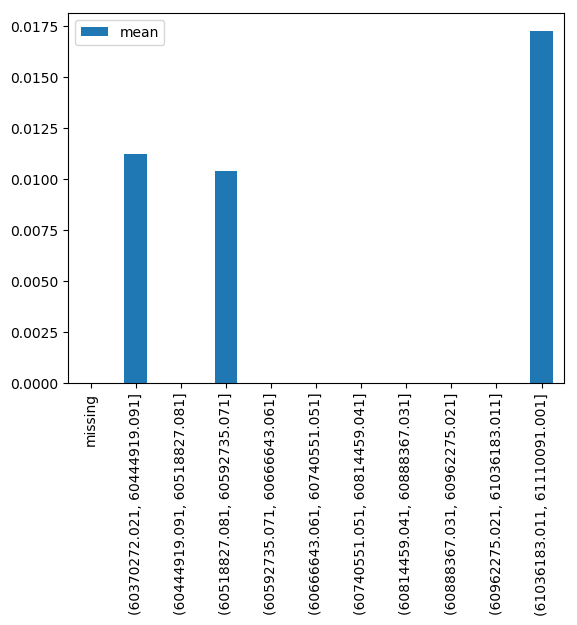

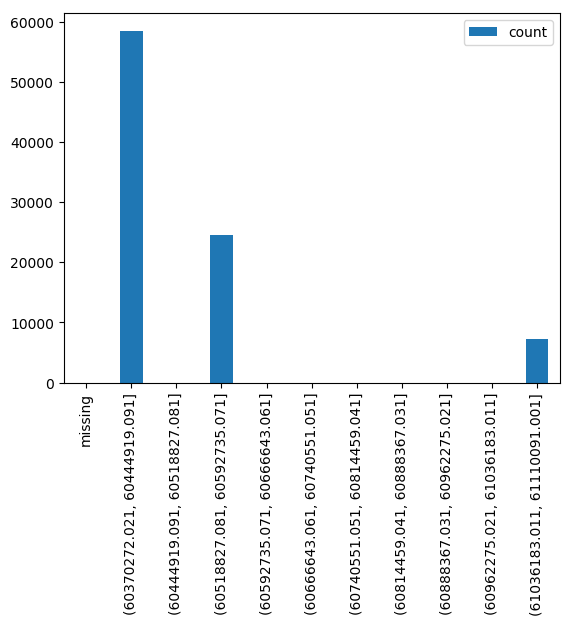

In [449]:
visualize_feature(df_train_2016, "rawcensustractandblock", "cts", 10 )

**56) 'regionidcounty'**     County in which the property is located

In [450]:
df_train_2016["regionidcounty"].describe() 

count    90275.000000
mean      2525.420770
std        805.694842
min       1286.000000
25%       1286.000000
50%       3101.000000
75%       3101.000000
max       3101.000000
Name: regionidcounty, dtype: float64

                        mean
missing                  NaN
(1284.185, 1467.5]  0.010392
(1467.5, 1649.0]         NaN
(1649.0, 1830.5]         NaN
(1830.5, 2012.0]         NaN
(2012.0, 2193.5]    0.017255
(2193.5, 2375.0]         NaN
(2375.0, 2556.5]         NaN
(2556.5, 2738.0]         NaN
(2738.0, 2919.5]         NaN
(2919.5, 3101.0]    0.011191
                      count
missing                 0.0
(1284.185, 1467.5]  24505.0
(1467.5, 1649.0]        0.0
(1649.0, 1830.5]        0.0
(1830.5, 2012.0]        0.0
(2012.0, 2193.5]     7196.0
(2193.5, 2375.0]        0.0
(2375.0, 2556.5]        0.0
(2556.5, 2738.0]        0.0
(2738.0, 2919.5]        0.0
(2919.5, 3101.0]    58574.0
                        mean  count    max    min
regionidcounty                                   
(1284.185, 1467.5]  0.010392  24505  3.289 -2.976
(1467.5, 1649.0]         NaN      0    NaN    NaN
(1649.0, 1830.5]         NaN      0    NaN    NaN
(1830.5, 2012.0]         NaN      0    NaN    NaN
(2012.0, 2193.5]

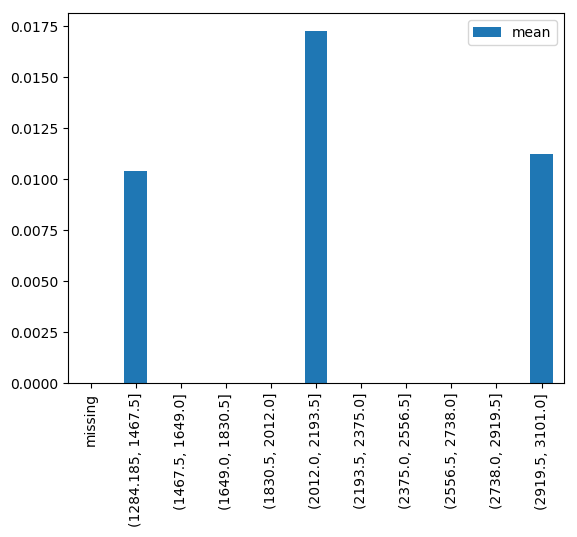

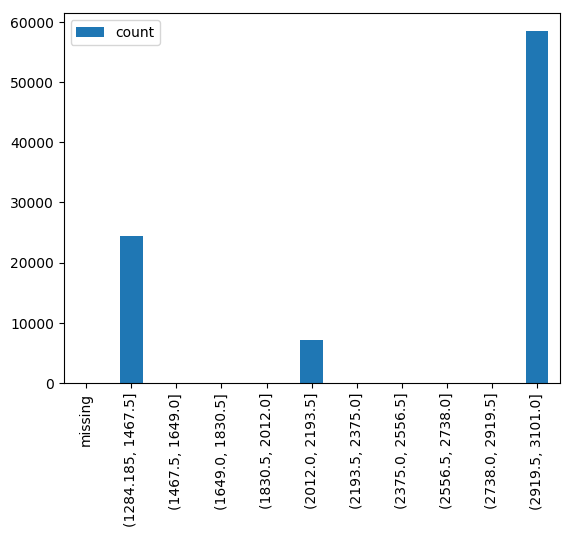

In [451]:
visualize_feature(df_train_2016, "regionidcounty", "cts", 10 )

**57) 'roomcnt'**      Total number of rooms in the principal residence

In [452]:
df_train_2016["roomcnt"].describe() 

count    90275.000000
mean         1.478516
std          2.819627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: roomcnt, dtype: float64

                   mean
missing             NaN
(-0.018, 1.8]  0.011183
(1.8, 3.6]     0.029758
(3.6, 5.4]     0.007976
(5.4, 7.2]     0.011313
(7.2, 9.0]     0.015875
(9.0, 10.8]    0.021691
(10.8, 12.6]   0.053190
(12.6, 14.4]   0.178507
(14.4, 16.2]   0.063000
(16.2, 18.0]  -0.016100
                 count
missing            0.0
(-0.018, 1.8]  69703.0
(1.8, 3.6]       281.0
(3.6, 5.4]      5159.0
(5.4, 7.2]      9840.0
(7.2, 9.0]      4766.0
(9.0, 10.8]      364.0
(10.8, 12.6]     144.0
(12.6, 14.4]      15.0
(14.4, 16.2]       2.0
(16.2, 18.0]       1.0
                   mean  count     max     min
roomcnt                                       
(-0.018, 1.8]  0.011183  69703  4.7370 -4.6050
(1.8, 3.6]     0.029758    281  0.9999 -0.6033
(3.6, 5.4]     0.007976   5159  1.6620 -2.3030
(5.4, 7.2]     0.011313   9840  3.2890 -4.6050
(7.2, 9.0]     0.015875   4766  3.0180 -2.3230
(9.0, 10.8]    0.021691    364  1.0770 -0.9014
(10.8, 12.6]   0.053190    144  1.8470 -0.4339
(12.6, 14.4] 

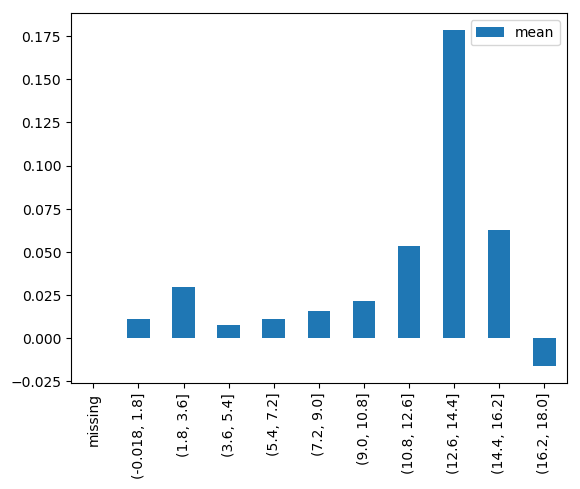

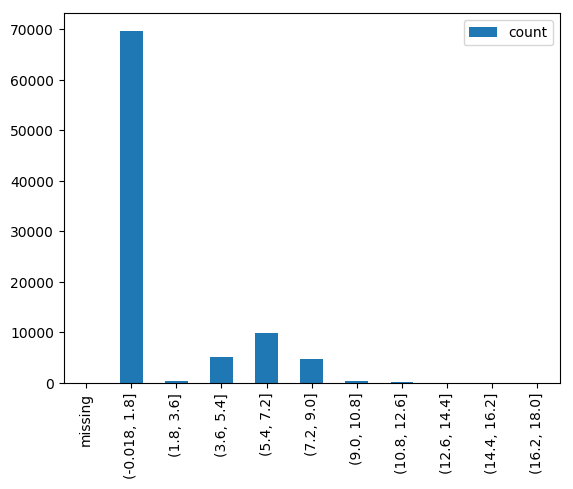

In [453]:
visualize_feature(df_train_2016, "roomcnt", "cts", 10 )

**58) 'assessmentyear'**     The year of the property tax assessment. All value is 2015. So delete the column

In [454]:
df_train_2016["assessmentyear"].describe() 

count    90275.0
mean      2015.0
std          0.0
min       2015.0
25%       2015.0
50%       2015.0
75%       2015.0
max       2015.0
Name: assessmentyear, dtype: float64

In [455]:

df_train_2016.drop(columns="assessmentyear",inplace=True)

Let's check which columns to drop, fill with 0 or fill with mean. I stored the name of each columns in a dictionary , dict_column.  

In [456]:
dict_column

{'Drop': ['buildingclasstypeid',
  'finishedsquarefeet13',
  'storytypeid',
  'architecturalstyletypeid',
  'typeconstructiontypeid',
  'finishedsquarefeet6',
  'decktypeid',
  'poolsizesum',
  'pooltypeid10',
  'pooltypeid2',
  'finishedsquarefeet15',
  'finishedfloor1squarefeet',
  'finishedsquarefeet50',
  'pooltypeid7',
  'numberofstories',
  'garagetotalsqft',
  'garagecarcnt',
  'regionidneighborhood'],
 'Fill_0': ['basementsqft',
  'yardbuildingsqft26',
  'taxdelinquencyyear',
  'yardbuildingsqft17',
  'fireplacecnt',
  'threequarterbathnbr',
  'poolcnt',
  'airconditioningtypeid',
  'heatingorsystemtypeid',
  'fullbathcnt'],
 'Fill_mean': ['buildingqualitytypeid',
  'lotsizesquarefeet',
  'finishedsquarefeet12',
  'yearbuilt',
  'calculatedfinishedsquarefeet',
  'structuretaxvaluedollarcnt',
  'taxamount',
  'taxvaluedollarcnt',
  'landtaxvaluedollarcnt']}

Let's delete or fill columns with 0 or mean . 

In [457]:
df_train_2016.drop(columns=dict_column["Drop"],inplace=True)


In [458]:
for value in dict_column["Fill_0"]:
    df_train_2016[value].fillna(0, inplace = True)
       

In [459]:
for value in dict_column["Fill_mean"]:
    df_train_2016[value].fillna(df_train_2016[value].mean(), inplace = True)
       

In [460]:
df_train_2016.drop(columns="parcelid",inplace=True)

In [461]:
df_train_2016.head().transpose()

0                    1  \
logerror                                   0.0276              -0.1684   
transactiondate               2016-01-01 00:00:00  2016-01-01 00:00:00   
airconditioningtypeid                           1                    0   
basementsqft                                    0                    0   
bathroomcnt                                     2                  3.5   
bedroomcnt                                      3                    4   
buildingqualitytypeid                           4              5.56541   
calculatedbathnbr                               2                  3.5   
calculatedfinishedsquarefeet                 1684                 2263   
finishedsquarefeet12                         1684                 2263   
fips                                         6037                 6059   
fireplacecnt                                    0                    0   
fullbathcnt                                     2                    3   
hashottuborspa                              False                False   
heatingorsystemtypeid                           2                    0   
latitude                               3.4281e+07          3.36681e+07   
longitude                            -1.18489e+08         -1.17678e+08   
lotsizesquarefeet                            7528                 3643   
poolcnt                                         0                    0   
propertycountylandusecode                    0100                    1   
propertylandusetypeid                         261                  261   
propertyzoningdesc                           LARS              Missing   
rawcensustractandblock                6.03711e+07          6.05905e+07   
regionidcity                                12447                32380   
regionidcounty                               3101                 1286   
regionidzip                                 96370                96962   
roomcnt                                         0                    0   
threequarterbathnbr                             0                    1   
unitcnt                                         1                    1   
yardbuildingsqft17                              0                    0   
yardbuildingsqft26                              0                    0   
yearbuilt                                    1959                 2014   
fireplaceflag                               False                False   
structuretaxvaluedollarcnt                 122754               346458   
taxvaluedollarcnt                          360170               585529   
landtaxvaluedollarcnt                      237416               239071   
taxamount                                 6735.88                10153   
taxdelinquencyflag                              N                    N   
taxdelinquencyyear                              0                    0   
censustractandblock                   6.03711e+13          6.11101e+13   

                                                2                    3  \
logerror                                   -0.004               0.0218   
transactiondate               2016-01-01 00:00:00  2016-01-02 00:00:00   
airconditioningtypeid                           1                    1   
basementsqft                                    0                    0   
bathroomcnt                                     3                    2   
bedroomcnt                                      2                    2   
buildingqualitytypeid                           4                    4   
calculatedbathnbr                               3                    2   
calculatedfinishedsquarefeet                 2217                  839   
finishedsquarefeet12                         2217                  839   
fips                                         6037                 6037   
fireplacecnt                                    0                    0   
fullbathcnt                                     3  

## Outliers

Let's draw a scatter plot on "logerror", then we can find that there are some outliers at the end of both sides. 

Our task in the project is to find where the zillow algorithm fails. These outliers mean where the zillow algorithm fails the most, it can have important information.  Thus, I will leave outliers just like that. 


In [462]:
range(df_train_2016.shape[0])

range(0, 90275)

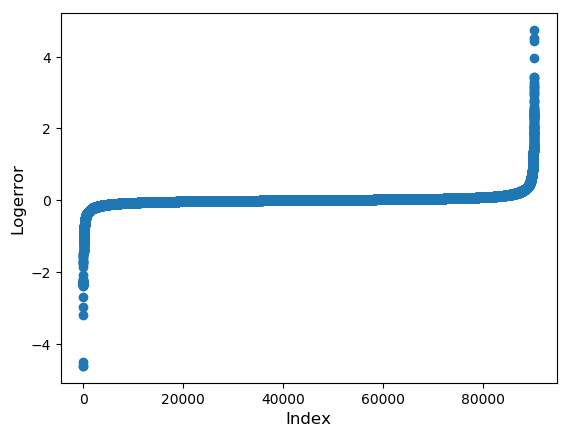

In [463]:
plt.scatter(range(df_train_2016.shape[0]), df_train_2016.sort_values(by='logerror')['logerror'])
plt.xlabel('Index', fontsize=12)
plt.ylabel('Logerror', fontsize=12)
plt.show()

In [464]:
df_train_2016.logerror.describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [465]:
freq_table = pd.DataFrame(0,index = range(-4,6),columns = range(1))



for i in range(df_train_2016.shape[0]):
    if df_train_2016.logerror[i] < -4 :
        freq_table[0][-4] += 1
    elif df_train_2016.logerror[i] < -3:
        freq_table[0][-3] += 1
    elif df_train_2016.logerror[i] < -2:
        freq_table[0][-2] += 1
    elif df_train_2016.logerror[i] < -1:
        freq_table[0][-1] += 1
    elif df_train_2016.logerror[i] < 0:
        freq_table[0][0] += 1
    elif df_train_2016.logerror[i] < 1:
        freq_table[0][1] += 1
    elif df_train_2016.logerror[i] < 2:
        freq_table[0][2] += 1
    elif df_train_2016.logerror[i] < 3:
        freq_table[0][3] += 1
    elif df_train_2016.logerror[i] < 4:
        freq_table[0][4] += 1
    else :
        freq_table[0][5] += 1
        
        

In [466]:
freq_table

0
-4      3
-3      1
-2     43
-1     69
 0  39551
 1  50382
 2    160
 3     52
 4     11
 5      3

# Data Storytelling

## Distribution of Logerror

We would check both logerror and absolute value of logerror. Logerror indicates wheather estimated house values has been underestimated or overestimated while absolute logerror tells us that how estimated house value is close to an actual house value. It seems like the distribution of logerror follows a normal distribution.

In [467]:
df_train_2016.shape

(90275, 40)

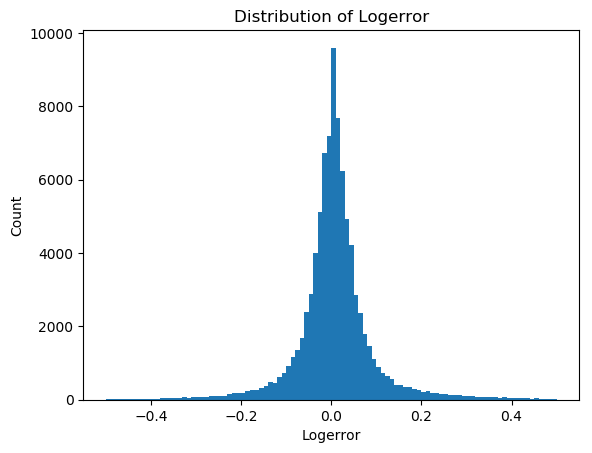

In [468]:
#Distribution of Logerror

plt.hist(df_train_2016.logerror,100, range=[-0.5, 0.5])
plt.title("Distribution of Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

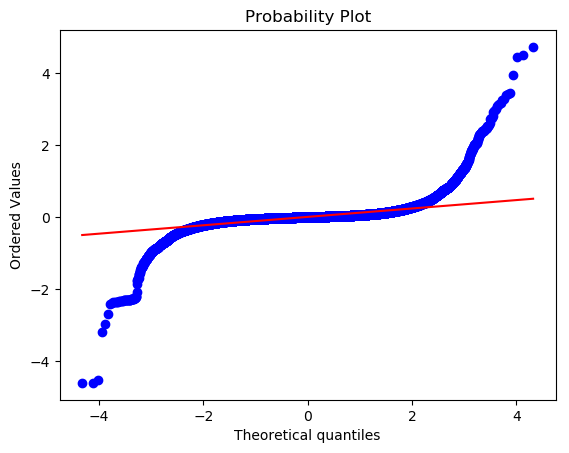

In [469]:
import pylab
import scipy.stats as stats

stats.probplot(df_train_2016.logerror, dist="norm", plot=pylab)
pylab.show()



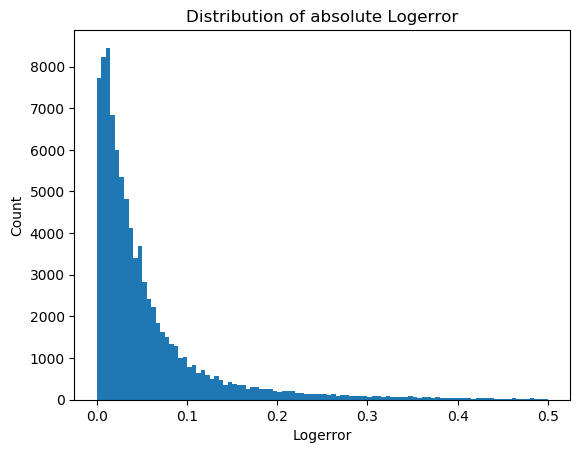

In [470]:
#Distribution of absolute Logerror

plt.hist(abs(df_train_2016.logerror),100,range=[0, 0.5])
plt.title("Distribution of absolute Logerror")
plt.xlabel("Logerror")
plt.ylabel("Count")
plt.show()

## Transaction dates

Let's check the distribution of transaction dates, there are fewer transactions after October

In [471]:
df_train_2016.shape

(90275, 40)

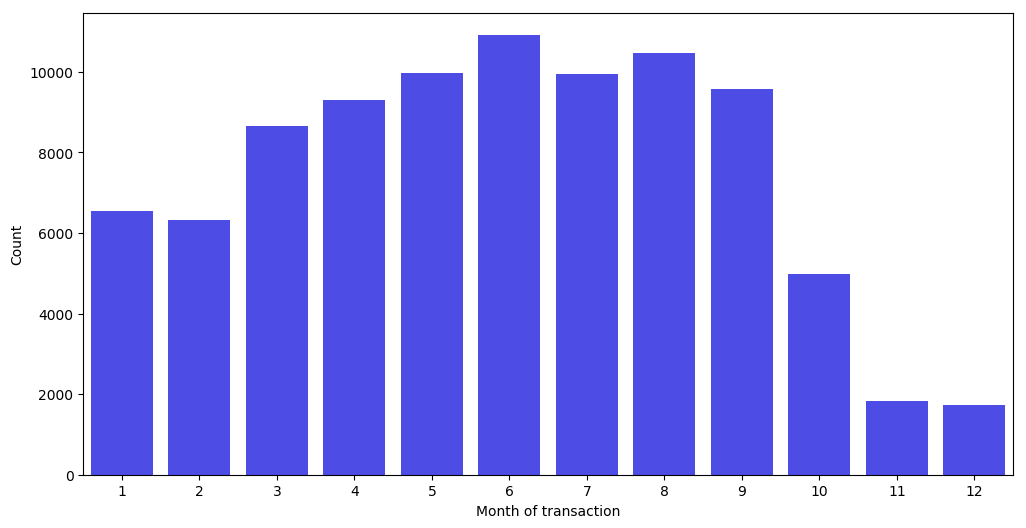

In [472]:
#Distribution of transaction dates for training dataset

trs_month = df_train_2016['transactiondate'].dt.month.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(trs_month.index, trs_month.values, alpha=0.8,color ='blue' )

plt.xlabel('Month of transaction')
plt.ylabel('Count')
plt.show()



Let's see how absolute logerror change over time. We can see that logerror is getting better over time. 

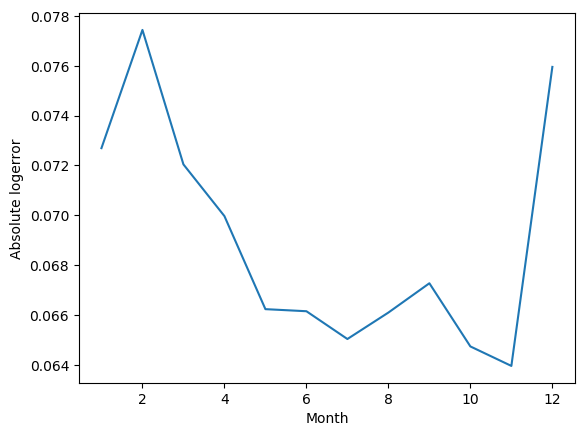

In [473]:
month_data = pd.DataFrame()
month_data['month']= df_train_2016['transactiondate'].dt.month

month_data['logerror'] = abs(df_train_2016['logerror'])

df_train_2016['abs_logerror']= abs(df_train_2016['logerror'])

plt.plot(month_data.groupby('month', axis=0).mean())
plt.ylabel('Absolute logerror')
plt.xlabel('Month')
plt.show()



## Inferential Statistics

Let's check correlations of each variables to "logerror" to see how variables are related.

Correlation between target variable, logerror, and dependent variables are all weak. They are between 0.237380 and -0.018009


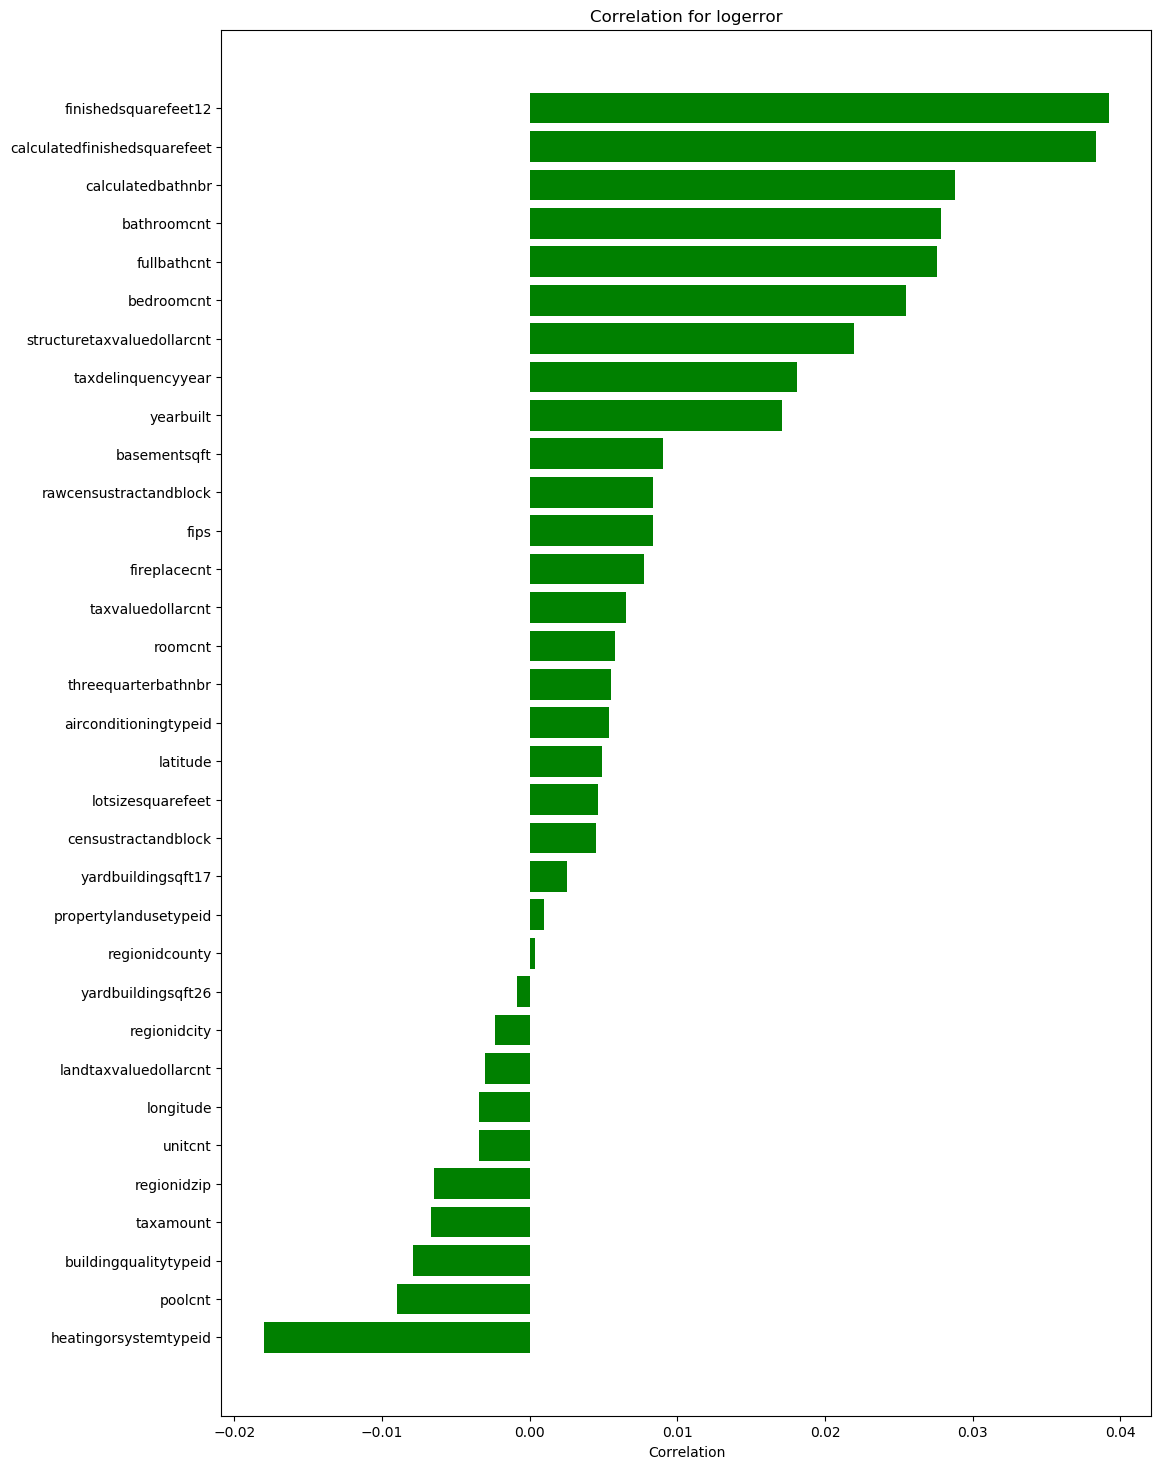

In [548]:
# Correlations for logerror 
df_train_2016.drop(columns="abs_logerror",inplace = True)
corr = df_train_2016.corr()


corr_logerror = corr.loc["logerror",:] [ corr.loc["logerror",:].notnull() ].reset_index()
corr_logerror.columns = ["index",'corr']
corr_logerror_sorted = corr_logerror.sort_values(by='corr', ascending=False )[1:]



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(12,18))

y_pos = np.arange(len(corr_logerror_sorted))


ax.barh(y_pos, corr_logerror_sorted['corr'],   color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(corr_logerror_sorted['index'].values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Correlation')
ax.set_title('Correlation for logerror')

plt.show()



In [550]:
#corr["logerror"].sort_values(by='ratio', ascending=False )

corr.sort_values(by='logerror', ascending=False )["logerror"]

logerror                        1.000000
abs_logerror                    0.237380
finishedsquarefeet12            0.039248
calculatedfinishedsquarefeet    0.038341
calculatedbathnbr               0.028788
bathroomcnt                     0.027889
fullbathcnt                     0.027571
bedroomcnt                      0.025467
structuretaxvaluedollarcnt      0.021935
taxdelinquencyyear              0.018107
yearbuilt                       0.017089
basementsqft                    0.009019
rawcensustractandblock          0.008376
fips                            0.008363
fireplacecnt                    0.007746
taxvaluedollarcnt               0.006508
roomcnt                         0.005760
threequarterbathnbr             0.005490
airconditioningtypeid           0.005404
latitude                        0.004915
lotsizesquarefeet               0.004612
censustractandblock             0.004495
yardbuildingsqft17              0.002497
propertylandusetypeid           0.001003
regionidcounty  

Let's check correlations between pairs of independent variables. We can find that there are 2 clusters on the heat map below. The first cluster on the top left shows that variables about sizes of houses such as bathroom size or bedroom size and total square feets are stronly related. The second cluster on the bottom right tells us that variables about taxes are related to each other. Alse, we can observe from the right top cluster that variables about sizes of houses are weakly related to variables about taxes. It is reasonable because the bigger a house is, the more expensive the property is resulting the more taxes. However, the price of house is not only resulted from the size of house. So correlation is not strong among them. 

There are not variables which can be particularly significant in terms of predicting logerror based on correlation. Also, there are strong multicollinearity between dependent variables. Therefore, a linear regression is not suitable for the model because of multicollinearity.    

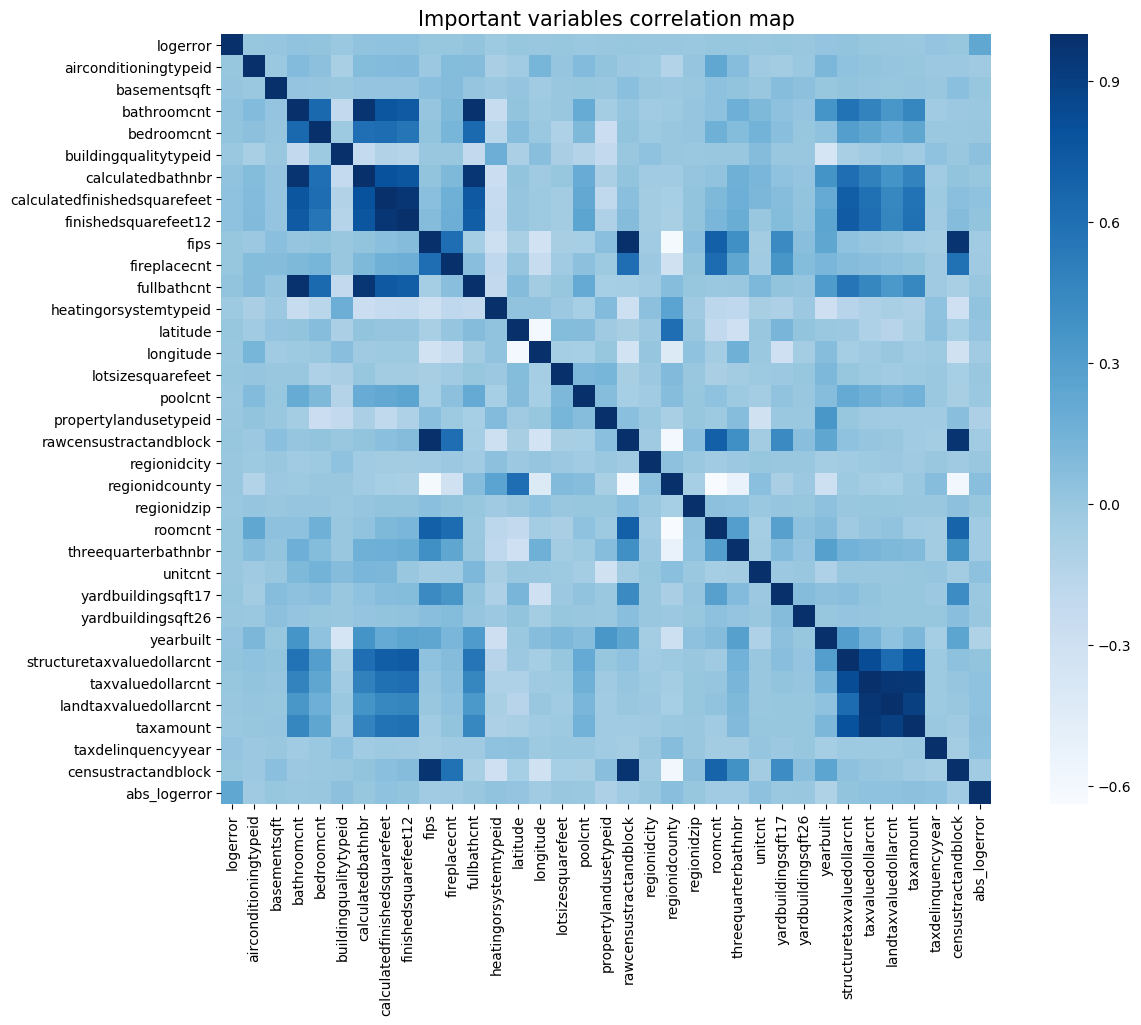

In [545]:
import seaborn as sns
color = sns.color_palette()

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, vmax=1.0, square=True, cmap="Blues")
plt.title("Important variables correlation map", fontsize=15)
plt.show()

# Analysis 

To apply machine learning, we need to convert categorical and object data for Sklearn package.  

In [552]:
from sklearn.linear_model import lasso_path, enet_path
from sklearn import ensemble
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import preprocessing
import sklearn.linear_model as linear_model

In [554]:
df_train_2016_tmp = df_train_2016.copy()



In [557]:
# Drop target variable, categorical data and object data to convert them for Scikit-Learn.
X = df_train_2016_tmp.drop(columns=['logerror', 'propertycountylandusecode','propertyzoningdesc','taxdelinquencyflag','transactiondate'])


In [558]:
#converting Pandas Categorical Data For Scikit-Learn
from sklearn import preprocessing

df_train_2016_tmp['propertycountylandusecode']= str(df_train_2016_tmp['propertycountylandusecode'])

le = preprocessing.LabelEncoder()

le.fit(df_train_2016_tmp.propertycountylandusecode)
num_propertycountylandusecode =le.transform(df_train_2016_tmp.propertycountylandusecode)
le.fit(df_train_2016_tmp.propertyzoningdesc)
num_propertyzoningdesc =le.transform(df_train_2016_tmp.propertyzoningdesc)

le.fit(df_train_2016_tmp.taxdelinquencyflag)
num_taxdelinquencyflag =le.transform(df_train_2016_tmp.taxdelinquencyflag)


le.fit(df_train_2016_tmp.transactiondate)
num_transactiondate =le.transform(df_train_2016_tmp.transactiondate)


In [559]:
# target variable is logerror
Y = df_train_2016['logerror']

In [560]:
# check whether it has column with missing value 
df_train_2016_tmp.isnull().sum()

logerror                        0
transactiondate                 0
airconditioningtypeid           0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fireplacecnt                    0
fullbathcnt                     0
hashottuborspa                  0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
poolcnt                         0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
threequarterbathnbr             0
unitcnt                         0
yardbuildingsq

In [562]:
df_train_2016.loc[:, df_train_2016.dtypes == np.object].columns

Index(['hashottuborspa', 'propertycountylandusecode', 'propertyzoningdesc',
       'fireplaceflag', 'taxdelinquencyflag'],
      dtype='object')

In [564]:
X_new =X.copy() 

In [565]:
X_new['num_propertycountylandusecode'] = num_propertycountylandusecode
X_new['num_propertyzoningdesc'] = num_propertyzoningdesc
X_new['num_taxdelinquencyflag'] = num_taxdelinquencyflag
X_new['num_transactiondate'] = num_transactiondate

In [566]:
X_new.columns

Index(['airconditioningtypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fireplacecnt', 'fullbathcnt', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'propertylandusetypeid', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17',
       'yardbuildingsqft26', 'yearbuilt', 'fireplaceflag',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyyear',
       'censustractandblock', 'abs_logerror', 'num_propertycountylandusecode',
       'num_propertyzoningdesc', 'num_taxdelinquencyflag',
       'num_transactiondate'],
      dtype='object')

In [568]:
X_new.shape

(90275, 40)

# Random Forest


As we see on the above, a linear regression is not a good choce for a model because of multicollinearity. I first tried a random forest as multicolinearity is not important factor for random forest. 

To find the best fitted randome forest model, grid search is used. possible combination of options were applied to find the better model. 

In [589]:


tuned_parameters = {'n_estimators': [10, 30, 50], 'max_depth': [None, 1, 2, 3,5,10], 'min_samples_split': [5,10,20]}


In [590]:
clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
clf.fit(train_X, train_Y)
print(clf.best_estimator_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 35.1min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 44.5min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=20,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [ ]:
From grid search, the model with max_depth of 5, min_samples_spli of 20 and n_estimators of 30 was selected. 

In [591]:
regr = RandomForestRegressor(max_depth=5, min_samples_split=20, n_estimators=30)
rf =regr.fit(train_X, train_Y)

In [599]:
print(regr.feature_importances_)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 4.05935618e-03
 0.00000000e+00 0.00000000e+00 4.13030442e-03 3.40997418e-04
 1.33439800e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.53399590e-03 1.43527957e-03 2.20249071e-02 3.29988905e-02
 0.00000000e+00 0.00000000e+00 1.59141276e-02 2.90732033e-02
 0.00000000e+00 7.00425852e-02 2.32763451e-03 2.94654210e-03
 0.00000000e+00 2.08940697e-03 0.00000000e+00 2.79212888e-02
 0.00000000e+00 3.50628939e-02 7.71561580e-03 1.51087109e-02
 1.80025657e-02 0.00000000e+00 8.33979553e-03 6.65693161e-01
 0.00000000e+00 1.64123969e-02 0.00000000e+00 1.44919431e-02
 0.00000000e+00]


In [634]:
test = pd.DataFrame({"name":X_new.columns[regr.feature_importances_ != 0],"coeff": regr.feature_importances_[regr.feature_importances_ != 0],})
test.sort_values(by='coeff', ascending=False )           

coeff                          name
20  0.665693                  abs_logerror
10  0.070043                   regionidzip
15  0.035063    structuretaxvaluedollarcnt
7   0.032999             lotsizesquarefeet
9   0.029073                  regionidcity
14  0.027921                     yearbuilt
6   0.022025                     longitude
18  0.018003                     taxamount
21  0.016412        num_propertyzoningdesc
8   0.015914        rawcensustractandblock
17  0.015109         landtaxvaluedollarcnt
22  0.014492           num_transactiondate
19  0.008340           censustractandblock
16  0.007716             taxvaluedollarcnt
1   0.004130  calculatedfinishedsquarefeet
0   0.004059                    bedroomcnt
12  0.002947           threequarterbathnbr
4   0.002534         heatingorsystemtypeid
11  0.002328                       roomcnt
13  0.002089            yardbuildingsqft17
5   0.001435                      latitude
3   0.001334                          fips
2   0.000341          finishedsquarefeet12

In [592]:
from sklearn.model_selection import KFold, cross_val_score
cross_val_score(regr, train_X, train_Y, cv=5, n_jobs=-1)

array([0.15967916, 0.13265984, 0.22503968, 0.19282503, 0.02944207])

In [593]:
pred_Y= rf.predict(test_X)

In [594]:
math.sqrt(sum((test_Y-pred_Y)**2))/len(test_Y)

0.0009439129874141149

# Lasso

Let's try Lasso. To find the alpha for Lasso try many possible variables for alpha, then choose the better one. 

In [602]:
from math import exp, expm1,log

par = [0,0.00001,0.001,0.01,0.1,0.5,1,2,3,4]

for i in par:
    clf = linear_model.Lasso(alpha=i,tol=0.00000001)
    clf.fit(X_new,Y)
    Y_pred = clf.predict(X_new)

    print("i : ", i, ", RMSE : ", np.mean((Y_pred-Y)**2), ", R Sqaured : ", clf.score(X_new,Y))




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  import sys
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


i :  0 , RMSE :  0.024266209099568996 , R Sqaured :  0.06474554724549064
i :  1e-05 , RMSE :  0.02426685671180827 , R Sqaured :  0.06472058734228825
i :  0.001 , RMSE :  0.024334861007917794 , R Sqaured :  0.062099604374503466
i :  0.01 , RMSE :  0.02582238609700084 , R Sqaured :  0.004768257008269772
i :  0.1 , RMSE :  0.025826145695951156 , R Sqaured :  0.0046233566802381665
i :  0.5 , RMSE :  0.025830273084385437 , R Sqaured :  0.004464281218710897
i :  1 , RMSE :  0.025833227735483574 , R Sqaured :  0.004350404733765467
i :  2 , RMSE :  0.02584307199516031 , R Sqaured :  0.003970992866860978
i :  3 , RMSE :  0.025858609369029017 , R Sqaured :  0.003372160225347365
i :  4 , RMSE :  0.025870291322592994 , R Sqaured :  0.0029219210040889454


11 variables were chosen for Lasso, but values for each chosen variables are low. Therefore Lasso is not right model to predict logerror. 

In [635]:
test = pd.DataFrame({"name":X_new.columns[clf.coef_ != 0],"coeff": clf.coef_[clf.coef_ != 0],})
test.sort_values(by='coeff', ascending=False )           

coeff                        name
7   7.125611e-08           taxvaluedollarcnt
3   4.434079e-08      rawcensustractandblock
2   4.461433e-09           lotsizesquarefeet
0   3.758590e-09                    latitude
1   1.294455e-09                   longitude
10 -4.123440e-14         censustractandblock
4  -4.782052e-09                regionidcity
5  -1.335977e-08                 regionidzip
6  -1.403435e-08  structuretaxvaluedollarcnt
8  -5.631999e-08       landtaxvaluedollarcnt
9  -2.224682e-06                   taxamount